# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [32]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

In [33]:
# Set random seed
np.random.seed(42)

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [34]:
# Load in the general demographics data.
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv",sep = ";")

# Load in the feature summary file.
feat_info =  pd.read_csv("AZDIAS_Feature_Summary.csv",sep = ";")

In [35]:
customers = pd.read_csv("Udacity_CUSTOMERS_Subset.csv",sep = ";")

In [36]:
customers.head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0         2                     4          1            5.0   
1        -1                     4          1            NaN   
2        -1                     4          2            2.0   
3         1                     4          1            2.0   
4        -1                     3          1            6.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  5              1                 5               1   
1                  5              1                 5               1   
2                  5              1                 5               1   
3                  5              1                 5               2   
4                  3              1                 4               4   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GEBURTSJAHR  \
0                      2                 2          2            0   
1                      3                 2          2            0   
2                      4                 4          2            0   
3                      1                 2          6            0   
4                      5                 2          2         1960   

   GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  \
0              4.0                 1           1                 20.0   
1              NaN                 0           1                  NaN   
2              3.0                 1           2                 13.0   
3             10.0                 0           2                  0.0   
4              2.0                 0           3                 31.0   

   LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  \
0                  5.0              2.0              2.0            10.0   
1                  NaN              NaN              NaN             NaN   
2                  3.0              1.0              1.0            10.0   
3                  0.0              0.0              0.0             9.0   
4                 10.0             10.0              5.0             1.0   

   LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  \
0             5.0                 1                      4             5.0   
1             NaN                 1                      0             NaN   
2             5.0                 1                      4             5.0   
3             4.0                 1                      1             3.0   
4             1.0                 1                      8             5.0   

   SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  \
0          6          5          2          6           6           7   
1          3          6          2          6           7           5   
2          2          2          1          3           3           7   
3          6          5          3          4           7           5   
4          4          5          4          6           5           6   

   SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  \
0          3           4          1           3          1           1   
1          3           4          1           3          3           2   
2          7           1          2           7          5           6   
3          3           4          3           3          3           3   
4          4           5          5           3          5           2   

   SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  \
0              2            1            3      0.0       0.0         1   
1              4            1            3      0.0       0.0         1   
2              4            1            1      0.0       0.0         2   
3              3            4            0      0.0       0.0         1   
4              5            4            1      0.0       0.0         2   

   ZABEOTYP  ALTER_HH  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCO

In [37]:
azdias.head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GEBURTSJAHR  \
0                      5                 3          4            0   
1                      4                 5          1         1996   
2                      3                 5          1         1979   
3                      1                 2          6         1957   
4                      3                 2          5         1963   

   GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  \
0             10.0                 0          -1                 15.0   
1             10.0                 0           3                 21.0   
2             10.0                 1           3                  3.0   
3              1.0                 0           2                  0.0   
4              5.0                 0           3                 32.0   

   LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  \
0                  4.0              2.0              2.0             1.0   
1                  6.0              5.0              3.0             2.0   
2                  1.0              1.0              1.0             3.0   
3                  0.0              0.0              0.0             9.0   
4                 10.0             10.0              5.0             3.0   

   LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  \
0             1.0                 0                      0             5.0   
1             1.0                 1                     14             1.0   
2             2.0                 1                     15             3.0   
3             4.0                 1                      8             2.0   
4             2.0                 1                      8             5.0   

   SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  \
0          2          6          7          5           1           5   
1          5          4          4          3           1           2   
2          4          1          3          3           4           4   
3          5          1          2          1           4           4   
4          6          4          4          2           7           4   

   SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  \
0          3           3          4           7          6           6   
1          2           3          6           4          7           4   
2          6           3          4           7          7           7   
3          7           4          3           4          4           5   
4          4           6          2           3          2           2   

   SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  \
0              5            3           -1      NaN       NaN        -1   
1              7            6            3      1.0       0.0         2   
2              3            3            2      0.0       0.0         1   
3              4            4            1      0.0       0.0         1   
4              4            2            2      0.0       0.0         2   

   ZABEOTYP  ALTER_HH  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCO

Check the structure of the data after it's loaded (e.g. print the number of
rows and columns, print the first few rows).


In [38]:
feat_info

attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numeric                [0]
12        GFK_URLAUBERTYP            person  categorical                 []
13       GREEN_AVANTGARDE            person  categorical                 []
14             HEALTH_TYP            person      ordinal             [-1,0]
15    LP_LEBENSPHASE_FEIN            person        mixed                [0]
16    LP_LEBENSPHASE_GROB            person        mixed                [0]
17        LP_FAMILIE_FEIN            person  categorical                [0]
18        LP_FAMILIE_GROB            person  categorical                [0]
19         LP_STATUS_FEIN            person  categorical                [0]
20         LP_STATUS_GROB            person  categorical                [0]
21       NATIONALITAET_KZ            person  categorical             [-1,0]
22  PRAEGENDE_JUGENDJAHRE            person        mixed             [-1,0]
23         RETOURTYP_BK_S            person      ordinal                [0]
24              SEMIO_SOZ            person      ordinal             [-1,9]
25              SEMIO_FAM            person      ordinal             [-1,9]
26              SEMIO_REL            person      ordinal             [-1,9]
27              SEMIO_MAT            person      ordinal             [-1,9]
28             SEMIO_VERT            person      ordinal             [-1,9]
29             SEMIO_LUST            person      ordinal             [-1,9]
30              SEMIO_ERL            person      ordinal             [-1,9]
31             SEMIO_KULT            person      ordinal             [-1,9]
32              SEMIO_RAT            person      ordinal             [-1,9]
33             SEMIO_KRIT            person      ordinal             [-1,9]
34              SEMIO_DOM            person      ordinal             [-1,9]
35             SEMIO_KAEM            person      ordinal             [-1,9]
36          SEMIO_PFLICHT            person      ordinal             [-1,9]
37            SEMIO_TRADV            person      ordinal             [-1,9]
38            SHOPPER_TYP            person  categorical               [-1]
39                SOHO_KZ            person  categorical               [-1]
40               TITEL_KZ            person  categorical             [-1,0]
41               VERS_TYP            person  categorical               [-1]
42               ZABEOTYP            person  categorical             [-1,9]
43               ALTER_HH         household     interval                [0]
44           ANZ_PERSONEN         household      numeric                 []
45              ANZ_TITEL         household      numeric                 []
46     HH_EINKOMMEN_SCORE         household      ordinal             [-1,0]
47           KK_KUNDENTYP         household  categorical               [-1]
48         W_KEIT_KIND_HH         household      ordinal             [-1,0]
49         WOHNDAUER_2008         household      ordinal             [-1,0]
50    ANZ_HAUSHALTE_AKTIV          building      numeric                [0]
51           ANZ_HH_TITEL          building      numeric        

In [39]:
print(f'Number of features : {len(feat_info)}')

Number of features : 85


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.


**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [40]:
azdias.head(20)

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0         -1                     2          1            2.0   
1         -1                     1          2            5.0   
2         -1                     3          2            3.0   
3          2                     4          2            2.0   
4         -1                     3          1            5.0   
5          3                     1          2            2.0   
6         -1                     2          2            5.0   
7         -1                     1          1            3.0   
8         -1                     3          1            3.0   
9         -1                     3          2            4.0   
10         0                     3          2            1.0   
11        -1                     2          1            6.0   
12        -1                     3          1            6.0   
13        -1                     1          2            5.0   
14        -1                     3          1            6.0   
15         1                     4          2            4.0   
16        -1                     1          2            1.0   
17        -1                     2          1            6.0   
18        -1                     2          2            6.0   
19        -1                     3          1            3.0   

    FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                   3              4                 3               5   
1                   1              5                 2               5   
2                   1              4                 1               2   
3                   4              2                 5               2   
4                   4              3                 4               1   
5                   3              1                 5               2   
6                   1              5                 1               5   
7                   3              3                 4               1   
8                   4              4                 2               4   
9                   2              4                 2               3   
10                  2              2                 5               3   
11                  3              4                 3               5   
12                  5              3                 4               2   
13                  1              4                 3               5   
14                  3              4                 3               5   
15                  4              1                 5               1   
16                  4              3                 1               4   
17                  3              4                 3               5   
18                  2              4                 1               5   
19                  5              2                 3               1   

    FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GEBURTSJAHR  \
0                       5                 3          4            0   
1                       4                 5          1         1996   
2                       3                 5          1         1979   
3                       1                 2          6         1957   
4                       3                 2          5         1963   
5                       2                 5          2         1943   
6                       4                 3          4            0   
7                       3                 2          5         1964   
8                       2                 2          6         1974   
9                       5                 4          1         1975   
10                      1                 5          6         1941   
11                      5                 3          4            0   
12                      4                 1          3            0   
13                      5                 2          1         1993   
14                      5              

In [41]:
num_rows_azdias = len(azdias)
print(f'There are {num_rows_azdias} rows in the azdias dataset')

There are 891221 rows in the azdias dataset


In [42]:
# Natural nulls
azdias_natural_nulls = azdias[azdias.isnull().any(axis = 1)]
azdias_natural_nulls.head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
6        -1                     2          2            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
6                  1              5                 1               5   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GEBURTSJAHR  \
0                      5                 3          4            0   
1                      4                 5          1         1996   
2                      3                 5          1         1979   
3                      1                 2          6         1957   
6                      4                 3          4            0   

   GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  \
0             10.0                 0          -1                 15.0   
1             10.0                 0           3                 21.0   
2             10.0                 1           3                  3.0   
3              1.0                 0           2                  0.0   
6             12.0                 0           2                  2.0   

   LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  \
0                  4.0              2.0              2.0             1.0   
1                  6.0              5.0              3.0             2.0   
2                  1.0              1.0              1.0             3.0   
3                  0.0              0.0              0.0             9.0   
6                  1.0              1.0              1.0             2.0   

   LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  \
0             1.0                 0                      0             5.0   
1             1.0                 1                     14             1.0   
2             2.0                 1                     15             3.0   
3             4.0                 1                      8             2.0   
6             1.0                 1                     10             4.0   

   SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  \
0          2          6          7          5           1           5   
1          5          4          4          3           1           2   
2          4          1          3          3           4           4   
3          5          1          2          1           4           4   
6          2          5          5          7           2           6   

   SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  \
0          3           3          4           7          6           6   
1          2           3          6           4          7           4   
2          6           3          4           7          7           7   
3          7           4          3           4          4           5   
6          5           5          7           7          4           7   

   SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  \
0              5            3           -1      NaN       NaN        -1   
1              7            6            3      1.0       0.0         2   
2              3            3            2      0.0       0.0         1   
3              4            4            1      0.0       0.0         1   
6              7            7            1      0.0       0.0         1   

   ZABEOTYP  ALTER_HH  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCO

In [43]:
# Percentage of nulls in each row
(100*round(azdias.isnull().sum()/len(azdias),1)).astype(str) + "%"

AGER_TYP                  0.0%
ALTERSKATEGORIE_GROB      0.0%
ANREDE_KZ                 0.0%
CJT_GESAMTTYP             0.0%
FINANZ_MINIMALIST         0.0%
FINANZ_SPARER             0.0%
FINANZ_VORSORGER          0.0%
FINANZ_ANLEGER            0.0%
FINANZ_UNAUFFAELLIGER     0.0%
FINANZ_HAUSBAUER          0.0%
FINANZTYP                 0.0%
GEBURTSJAHR               0.0%
GFK_URLAUBERTYP           0.0%
GREEN_AVANTGARDE          0.0%
HEALTH_TYP                0.0%
LP_LEBENSPHASE_FEIN       0.0%
LP_LEBENSPHASE_GROB       0.0%
LP_FAMILIE_FEIN           0.0%
LP_FAMILIE_GROB           0.0%
LP_STATUS_FEIN            0.0%
LP_STATUS_GROB            0.0%
NATIONALITAET_KZ          0.0%
PRAEGENDE_JUGENDJAHRE     0.0%
RETOURTYP_BK_S            0.0%
SEMIO_SOZ                 0.0%
SEMIO_FAM                 0.0%
SEMIO_REL                 0.0%
SEMIO_MAT                 0.0%
SEMIO_VERT                0.0%
SEMIO_LUST                0.0%
SEMIO_ERL                 0.0%
SEMIO_KULT                0.0%
SEMIO_RA

In [44]:
# Percentage of rows with nulls
print(f"Percentage of rows with nulls : {100*round(len(azdias[azdias.isnull().any(axis = 1)])/num_rows_azdias,3)}%")

Percentage of rows with nulls : 70.5%


In [45]:
# Identify missing or unknown data values and convert them to NaNs.
#=>First attempt, I found "apply" so inefficient, so I decied to the code it from scratch.
#=> DEPRECATED!!!
def fill_missing_unknown(row):
    for col_name in feat_info["attribute"]:
        #print(f'col name: {col_name}')
        unknown_missing_codes = feat_info[feat_info["attribute"] == col_name]["missing_or_unknown"].values[0].lstrip("[").rstrip("]").split(",")
        if (len(unknown_missing_codes) == 1) and  (unknown_missing_codes[0] == ''):
            return row
        #print(unknown_missing_codes)
        #print(f'value: {row[col_name]}, codes: {unknown_missing_codes}')
        if unknown_missing_codes.count(str(row[col_name])) > 0:
            row[col_name] = "NaN"
    return row

In [46]:
# azdias_unknown_missing_to_nan = azdias.apply(fill_missing_unknown,axis = 1)

In [47]:
# Identify missing or unknown data values and convert them to NaNs.
#=> Second attempt:
#=> DEPRECATED!!!
def fill_missing_unknown_2(size):
        
        for col_name in feat_info["attribute"]:
            print(f'col name: {col_name}')
            unknown_missing_codes = feat_info[feat_info["attribute"] == col_name]["missing_or_unknown"].values[0].lstrip("[").rstrip("]").split(",")
            if (len(unknown_missing_codes) == 1) and  (unknown_missing_codes[0] == ''):
                continue
            print(unknown_missing_codes)
            for i in range(0,size):
                if i%10000 == 0:
                    print(f'perecentage finished: {round(i/size,2)}')
                if unknown_missing_codes.count(str(azdias.at[i,col_name])) > 0:
                    azdias.loc[i,col_name] = "NaN"
            print(f'perecentage finished: 1')
   

In [48]:
#=> I thought the first 40k row will be more than enough, Pandas cannot just easily handle 900k rows in the memory. Please give your advice on this point: How can I handle Big Data efficiently in pandas? Should I have used SQL? Thanks
# fill_missing_unknown_2(40000)

In [49]:
azdias.head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GEBURTSJAHR  \
0                      5                 3          4            0   
1                      4                 5          1         1996   
2                      3                 5          1         1979   
3                      1                 2          6         1957   
4                      3                 2          5         1963   

   GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  \
0             10.0                 0          -1                 15.0   
1             10.0                 0           3                 21.0   
2             10.0                 1           3                  3.0   
3              1.0                 0           2                  0.0   
4              5.0                 0           3                 32.0   

   LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  \
0                  4.0              2.0              2.0             1.0   
1                  6.0              5.0              3.0             2.0   
2                  1.0              1.0              1.0             3.0   
3                  0.0              0.0              0.0             9.0   
4                 10.0             10.0              5.0             3.0   

   LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  \
0             1.0                 0                      0             5.0   
1             1.0                 1                     14             1.0   
2             2.0                 1                     15             3.0   
3             4.0                 1                      8             2.0   
4             2.0                 1                      8             5.0   

   SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  \
0          2          6          7          5           1           5   
1          5          4          4          3           1           2   
2          4          1          3          3           4           4   
3          5          1          2          1           4           4   
4          6          4          4          2           7           4   

   SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  \
0          3           3          4           7          6           6   
1          2           3          6           4          7           4   
2          6           3          4           7          7           7   
3          7           4          3           4          4           5   
4          4           6          2           3          2           2   

   SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  \
0              5            3           -1      NaN       NaN        -1   
1              7            6            3      1.0       0.0         2   
2              3            3            2      0.0       0.0         1   
3              4            4            1      0.0       0.0         1   
4              4            2            2      0.0       0.0         2   

   ZABEOTYP  ALTER_HH  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCO

In [50]:
# azdias.iloc[0:40000].to_csv("Udacity_AZDIAS_Subset_First_40k_rows.csv",sep = ";")

In [51]:
# Identify missing or unknown data values and convert them to NaNs.
#=> Third attempt: Using Victorization provided by pandas

def fill_missing_unknown_3(data):
        
        for col_name in feat_info["attribute"]:
            
            unknown_missing_codes = feat_info[feat_info["attribute"] == col_name]["missing_or_unknown"].values[0].lstrip("[").rstrip("]").split(",")
            if (len(unknown_missing_codes) == 1) and  (unknown_missing_codes[0] == ''):
                continue
            #print(unknown_missing_codes)
            data.loc[data[col_name].astype(str).isin(unknown_missing_codes),col_name] = np.NaN
            print(f'Column {col_name} finished')
            
   

In [52]:
#=> Cooool,it's way faster now, Vectroization saved the day.
fill_missing_unknown_3(azdias)

Column AGER_TYP finished
Column ALTERSKATEGORIE_GROB finished
Column ANREDE_KZ finished
Column CJT_GESAMTTYP finished
Column FINANZ_MINIMALIST finished
Column FINANZ_SPARER finished
Column FINANZ_VORSORGER finished
Column FINANZ_ANLEGER finished
Column FINANZ_UNAUFFAELLIGER finished
Column FINANZ_HAUSBAUER finished
Column FINANZTYP finished
Column GEBURTSJAHR finished
Column HEALTH_TYP finished
Column LP_LEBENSPHASE_FEIN finished
Column LP_LEBENSPHASE_GROB finished
Column LP_FAMILIE_FEIN finished
Column LP_FAMILIE_GROB finished
Column LP_STATUS_FEIN finished
Column LP_STATUS_GROB finished
Column NATIONALITAET_KZ finished
Column PRAEGENDE_JUGENDJAHRE finished
Column RETOURTYP_BK_S finished
Column SEMIO_SOZ finished
Column SEMIO_FAM finished
Column SEMIO_REL finished
Column SEMIO_MAT finished
Column SEMIO_VERT finished
Column SEMIO_LUST finished
Column SEMIO_ERL finished
Column SEMIO_KULT finished
Column SEMIO_RAT finished
Column SEMIO_KRIT finished
Column SEMIO_DOM finished
Column SEMIO

In [53]:
azdias.head(20)

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        NaN                   2.0        1.0            2.0   
1        NaN                   1.0        2.0            5.0   
2        NaN                   3.0        2.0            3.0   
3        2.0                   4.0        2.0            2.0   
4        NaN                   3.0        1.0            5.0   
5        3.0                   1.0        2.0            2.0   
6        NaN                   2.0        2.0            5.0   
7        NaN                   1.0        1.0            3.0   
8        NaN                   3.0        1.0            3.0   
9        NaN                   3.0        2.0            4.0   
10       NaN                   3.0        2.0            1.0   
11       NaN                   2.0        1.0            6.0   
12       NaN                   3.0        1.0            6.0   
13       NaN                   1.0        2.0            5.0   
14       NaN                   3.0        1.0            6.0   
15       1.0                   4.0        2.0            4.0   
16       NaN                   1.0        2.0            1.0   
17       NaN                   2.0        1.0            6.0   
18       NaN                   2.0        2.0            6.0   
19       NaN                   3.0        1.0            3.0   

    FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                 3.0            4.0               3.0             5.0   
1                 1.0            5.0               2.0             5.0   
2                 1.0            4.0               1.0             2.0   
3                 4.0            2.0               5.0             2.0   
4                 4.0            3.0               4.0             1.0   
5                 3.0            1.0               5.0             2.0   
6                 1.0            5.0               1.0             5.0   
7                 3.0            3.0               4.0             1.0   
8                 4.0            4.0               2.0             4.0   
9                 2.0            4.0               2.0             3.0   
10                2.0            2.0               5.0             3.0   
11                3.0            4.0               3.0             5.0   
12                5.0            3.0               4.0             2.0   
13                1.0            4.0               3.0             5.0   
14                3.0            4.0               3.0             5.0   
15                4.0            1.0               5.0             1.0   
16                4.0            3.0               1.0             4.0   
17                3.0            4.0               3.0             5.0   
18                2.0            4.0               1.0             5.0   
19                5.0            2.0               3.0             1.0   

    FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GEBURTSJAHR  \
0                     5.0               3.0        4.0          NaN   
1                     4.0               5.0        1.0       1996.0   
2                     3.0               5.0        1.0       1979.0   
3                     1.0               2.0        6.0       1957.0   
4                     3.0               2.0        5.0       1963.0   
5                     2.0               5.0        2.0       1943.0   
6                     4.0               3.0        4.0          NaN   
7                     3.0               2.0        5.0       1964.0   
8                     2.0               2.0        6.0       1974.0   
9                     5.0               4.0        1.0       1975.0   
10                    1.0               5.0        6.0       1941.0   
11                    5.0               3.0        4.0          NaN   
12                    4.0               1.0        3.0          NaN   
13                    5.0               2.0        1.0       1993.0   
14                    5.0              

In [54]:
azdias[azdias.isnull().any(axis = 1)].head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0       NaN                   2.0        1.0            2.0   
1       NaN                   1.0        2.0            5.0   
2       NaN                   3.0        2.0            3.0   
3       2.0                   4.0        2.0            2.0   
4       NaN                   3.0        1.0            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                3.0            4.0               3.0             5.0   
1                1.0            5.0               2.0             5.0   
2                1.0            4.0               1.0             2.0   
3                4.0            2.0               5.0             2.0   
4                4.0            3.0               4.0             1.0   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GEBURTSJAHR  \
0                    5.0               3.0        4.0          NaN   
1                    4.0               5.0        1.0       1996.0   
2                    3.0               5.0        1.0       1979.0   
3                    1.0               2.0        6.0       1957.0   
4                    3.0               2.0        5.0       1963.0   

   GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  \
0             10.0                 0         NaN                 15.0   
1             10.0                 0         3.0                 21.0   
2             10.0                 1         3.0                  3.0   
3              1.0                 0         2.0                  0.0   
4              5.0                 0         3.0                 32.0   

   LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  \
0                  4.0              2.0              2.0             1.0   
1                  6.0              5.0              3.0             2.0   
2                  1.0              1.0              1.0             3.0   
3                  0.0              0.0              0.0             9.0   
4                 10.0             10.0              5.0             3.0   

   LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  \
0             1.0               NaN                    NaN             5.0   
1             1.0               1.0                   14.0             1.0   
2             2.0               1.0                   15.0             3.0   
3             4.0               1.0                    8.0             2.0   
4             2.0               1.0                    8.0             5.0   

   SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  \
0        2.0        6.0        7.0        5.0         1.0         5.0   
1        5.0        4.0        4.0        3.0         1.0         2.0   
2        4.0        1.0        3.0        3.0         4.0         4.0   
3        5.0        1.0        2.0        1.0         4.0         4.0   
4        6.0        4.0        4.0        2.0         7.0         4.0   

   SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  \
0        3.0         3.0        4.0         7.0        6.0         6.0   
1        2.0         3.0        6.0         4.0        7.0         4.0   
2        6.0         3.0        4.0         7.0        7.0         7.0   
3        7.0         4.0        3.0         4.0        4.0         5.0   
4        4.0         6.0        2.0         3.0        2.0         2.0   

   SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  \
0            5.0          3.0          NaN      NaN       NaN       NaN   
1            7.0          6.0          3.0      1.0       0.0       2.0   
2            3.0          3.0          2.0      0.0       0.0       1.0   
3            4.0          4.0          1.0      0.0       0.0       1.0   
4            4.0          2.0          2.0      0.0       0.0       2.0   

   ZABEOTYP  ALTER_HH  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCO

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [55]:
def get_null_dists(data,bins = 25):
    fig, axes = plt.subplots(nrows = len(data.columns), ncols = 1,figsize=(15,2*len(data.columns)), dpi=100)
    for i, col in enumerate(data.columns):
        null_indices = azdias[azdias[col].isnull()].index.values
        hist = axes[i].hist(null_indices,label=col,bins = bins, density = True, stacked = True)
        axes[i].set_title(col)
        #axes[i].axvline(x = data[col].mean(), color = 'g')
        #axes[i].set_xlabel(f'Mean : {round(data[col].mean(),3)} \n st.d : {round(data[col].std(),3)} \n  Skewness : {round(data[col].skew(),3)}')
        #axes[i].set_xlim([null_indices.min(), null_indices.max()*1.2])
        #axes[i].set_ylim([hist[0].min(), hist[0].max()*1.2])
        
    #plt.suptitle('Probability Distributions', size=16)
    plt.tight_layout()

In [56]:
# Columns with nulls
columns_with_nulls = azdias.isnull().sum().index[~(azdias.isnull().sum() == 0)]
columns_with_nulls

Index(['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'CJT_GESAMTTYP', 'GEBURTSJAHR',
       'GFK_URLAUBERTYP', 'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN',
       'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB',
       'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ',
       'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S', 'SHOPPER_TYP', 'SOHO_KZ',
       'TITEL_KZ', 'VERS_TYP', 'ALTER_HH', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'HH_EINKOMMEN_SCORE', 'KK_KUNDENTYP', 'W_KEIT_KIND_HH',
       'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP',
       'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE',
       'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CAMEO_INTL_2015', 'KBA05_ANTG1',
       'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_BAUMAX',
       'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER',
       'KKK', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP',
       'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3',
       'PLZ8_ANT

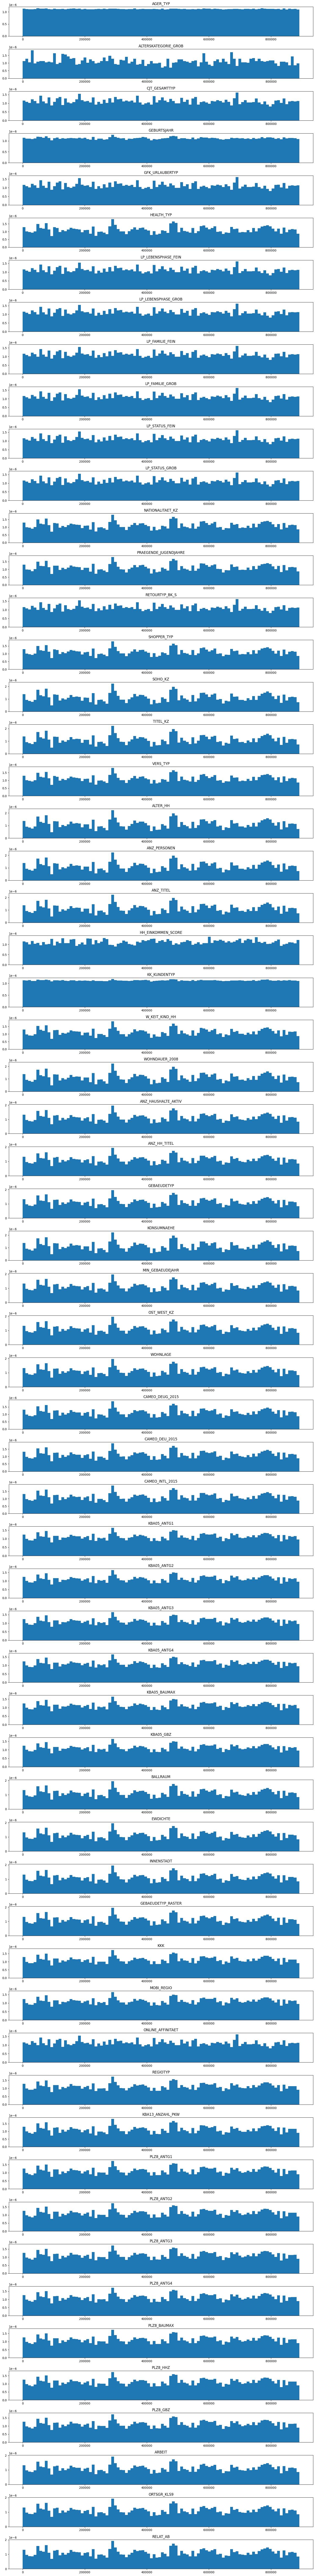

In [57]:
get_null_dists(azdias.loc[:,columns_with_nulls],bins = 100)

In [58]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

# Percentage of nulls in each column
(100*round(azdias.isnull().sum()/len(azdias),1)).sort_values(axis = 0,ascending = False).astype(str) + "%"


AGER_TYP                 80.0%
KK_KUNDENTYP             70.0%
GEBURTSJAHR              40.0%
KBA05_ANTG3              10.0%
KBA05_ANTG2              10.0%
KBA05_ANTG1              10.0%
CAMEO_INTL_2015          10.0%
CAMEO_DEU_2015           10.0%
CAMEO_DEUG_2015          10.0%
WOHNLAGE                 10.0%
OST_WEST_KZ              10.0%
MIN_GEBAEUDEJAHR         10.0%
KBA05_BAUMAX             10.0%
KONSUMNAEHE              10.0%
GEBAEUDETYP              10.0%
ANZ_HH_TITEL             10.0%
ANZ_HAUSHALTE_AKTIV      10.0%
WOHNDAUER_2008           10.0%
W_KEIT_KIND_HH           10.0%
ANZ_TITEL                10.0%
KBA05_ANTG4              10.0%
KBA05_GBZ                10.0%
ALTER_HH                 10.0%
PLZ8_ANTG2               10.0%
ORTSGR_KLS9              10.0%
ARBEIT                   10.0%
PLZ8_GBZ                 10.0%
PLZ8_HHZ                 10.0%
PLZ8_BAUMAX              10.0%
PLZ8_ANTG4               10.0%
PLZ8_ANTG3               10.0%
PLZ8_ANTG1               10.0%
BALLRAUM

In [59]:
# Percentage of rows with nulls
print(f"Percentage of rows with nulls : {100*round(len(azdias[azdias.isnull().any(axis = 1)])/num_rows_azdias,2)}%")

Percentage of rows with nulls : 93.0%


In [60]:
# Investigate patterns in the amount of missing data in each column.

#=> Already did that in the previous viz!.

In [61]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# Dropping the top 3 columns with nulls (Which take the form of very dense null uniform distrupution)
columns_to_drop = ["AGER_TYP", "KK_KUNDENTYP", "GEBURTSJAHR"]
azdias = azdias.drop(columns_to_drop, axis = 1)


In [62]:
azdias.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP',
       'ALTER_HH', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR',
       'OST_WEST_KZ', 'WOHNLAGE', '

#### Discussion 1.1.2: Assess Missing Data in Each Column

I noticed that most null distriputions are "mostly" uniform which means our nulls are spread all over the columns except those with very dense uniform distriputions (with very high percentages of nulls) which we dropped ("AGER_TYP", "KK_KUNDENTYP", "GEBURTSJAHR") since they were found useless.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [63]:
# How much data is missing in each row of the dataset?

# Percentage of nulls in each row
((100*round(azdias.isnull().sum(axis = 1)/len(azdias.columns),1)).sort_values(axis = 0,ascending = False).astype(str) + "%").head(10)


0         60.0%
301743    60.0%
824926    60.0%
81644     60.0%
824927    60.0%
301127    60.0%
301144    60.0%
301148    60.0%
81634     60.0%
301174    60.0%
dtype: object

In [250]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

# 1 for "above thershold", 0 for "below thershold"
azdias["ABOVE_NULL_THRESHOLD_50%"] = (azdias.isnull().sum(axis = 1)/len(azdias.columns)).map(lambda x: 1 if x>0.5 else 0)
azdias.head(10)

ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
0                   2.0        1.0            2.0                3.0   
1                   1.0        2.0            5.0                1.0   
2                   3.0        2.0            3.0                1.0   
3                   4.0        2.0            2.0                4.0   
4                   3.0        1.0            5.0                4.0   
5                   1.0        2.0            2.0                3.0   
6                   2.0        2.0            5.0                1.0   
7                   1.0        1.0            3.0                3.0   
8                   3.0        1.0            3.0                4.0   
9                   3.0        2.0            4.0                2.0   

   FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
0            4.0               3.0             5.0                    5.0   
1            5.0               2.0             5.0                    4.0   
2            4.0               1.0             2.0                    3.0   
3            2.0               5.0             2.0                    1.0   
4            3.0               4.0             1.0                    3.0   
5            1.0               5.0             2.0                    2.0   
6            5.0               1.0             5.0                    4.0   
7            3.0               4.0             1.0                    3.0   
8            4.0               2.0             4.0                    2.0   
9            4.0               2.0             3.0                    5.0   

   FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  \
0               3.0        4.0             10.0                 0         NaN   
1               5.0        1.0             10.0                 0         3.0   
2               5.0        1.0             10.0                 1         3.0   
3               2.0        6.0              1.0                 0         2.0   
4               2.0        5.0              5.0                 0         3.0   
5               5.0        2.0              1.0                 0         3.0   
6               3.0        4.0             12.0                 0         2.0   
7               2.0        5.0              9.0                 0         1.0   
8               2.0        6.0              3.0                 1         3.0   
9               4.0        1.0             12.0                 1         2.0   

   LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  \
0                 15.0                  4.0              2.0              2.0   
1                 21.0                  6.0              5.0              3.0   
2                  3.0                  1.0              1.0              1.0   
3                  0.0                  0.0              0.0              0.0   
4                 32.0                 10.0             10.0              5.0   
5                  8.0                  2.0              1.0              1.0   
6                  2.0                  1.0              1.0              1.0   
7                  5.0                  2.0              1.0              1.0   
8                 10.0                  3.0              1.0              1.0   
9                  4.0                  1.0              1.0              1.0   

   LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  \
0             1.0             1.0               NaN                    NaN   
1             2.0             1.0               1.0                   14.0   
2             3.0             2.0               1.0                   15.0   
3             9.0             4.0               1.0                    8.0   
4             3.0             2.0               1.0                    8.0   
5             4.0             2.0               1.0                    3.0   
6             2.0             1.

<AxesSubplot:xlabel='ABOVE_NULL_THRESHOLD_50%', ylabel='count'>

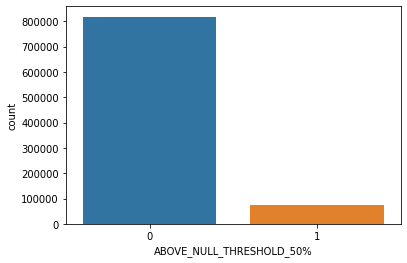

In [251]:
sns.countplot(x = azdias["ABOVE_NULL_THRESHOLD_50%"])

In [252]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

# 1 for "above thershold", 0 for "below thershold"
azdias["ABOVE_NULL_THRESHOLD_30%"] = (azdias.isnull().sum(axis = 1)/len(azdias.columns)).map(lambda x: 1 if x>0.3 else 0)
azdias.head(10)

ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
0                   2.0        1.0            2.0                3.0   
1                   1.0        2.0            5.0                1.0   
2                   3.0        2.0            3.0                1.0   
3                   4.0        2.0            2.0                4.0   
4                   3.0        1.0            5.0                4.0   
5                   1.0        2.0            2.0                3.0   
6                   2.0        2.0            5.0                1.0   
7                   1.0        1.0            3.0                3.0   
8                   3.0        1.0            3.0                4.0   
9                   3.0        2.0            4.0                2.0   

   FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
0            4.0               3.0             5.0                    5.0   
1            5.0               2.0             5.0                    4.0   
2            4.0               1.0             2.0                    3.0   
3            2.0               5.0             2.0                    1.0   
4            3.0               4.0             1.0                    3.0   
5            1.0               5.0             2.0                    2.0   
6            5.0               1.0             5.0                    4.0   
7            3.0               4.0             1.0                    3.0   
8            4.0               2.0             4.0                    2.0   
9            4.0               2.0             3.0                    5.0   

   FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  \
0               3.0        4.0             10.0                 0         NaN   
1               5.0        1.0             10.0                 0         3.0   
2               5.0        1.0             10.0                 1         3.0   
3               2.0        6.0              1.0                 0         2.0   
4               2.0        5.0              5.0                 0         3.0   
5               5.0        2.0              1.0                 0         3.0   
6               3.0        4.0             12.0                 0         2.0   
7               2.0        5.0              9.0                 0         1.0   
8               2.0        6.0              3.0                 1         3.0   
9               4.0        1.0             12.0                 1         2.0   

   LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  \
0                 15.0                  4.0              2.0              2.0   
1                 21.0                  6.0              5.0              3.0   
2                  3.0                  1.0              1.0              1.0   
3                  0.0                  0.0              0.0              0.0   
4                 32.0                 10.0             10.0              5.0   
5                  8.0                  2.0              1.0              1.0   
6                  2.0                  1.0              1.0              1.0   
7                  5.0                  2.0              1.0              1.0   
8                 10.0                  3.0              1.0              1.0   
9                  4.0                  1.0              1.0              1.0   

   LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  \
0             1.0             1.0               NaN                    NaN   
1             2.0             1.0               1.0                   14.0   
2             3.0             2.0               1.0                   15.0   
3             9.0             4.0               1.0                    8.0   
4             3.0             2.0               1.0                    8.0   
5             4.0             2.0               1.0                    3.0   
6             2.0             1.

<AxesSubplot:xlabel='ABOVE_NULL_THRESHOLD_30%', ylabel='count'>

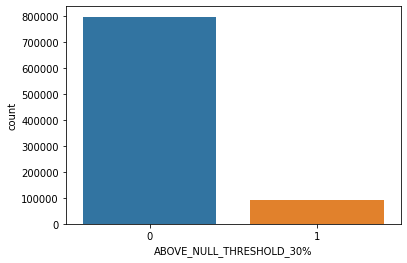

In [253]:
sns.countplot(x = azdias["ABOVE_NULL_THRESHOLD_30%"])

It's not that big of a difference compared to the previous threshold so let's go for the safer threshold.

In [254]:
def compare_dists(data):
    fig, axes = plt.subplots(nrows = len(data.columns), ncols = 2,figsize=(15,2.5*len(data.columns)), dpi=100)
    for i, col in enumerate(data.columns):
        sns.countplot(x = azdias[azdias["ABOVE_NULL_THRESHOLD_30%"] == 0][col], ax = axes[i,0],dodge = 0.2)
        sns.countplot(x = azdias[azdias["ABOVE_NULL_THRESHOLD_30%"] == 1][col], ax = axes[i,1],dodge = 0.2)
        #axes[i].set_title(col)

    #plt.suptitle('Probability Distributions', size=16)
    plt.tight_layout()

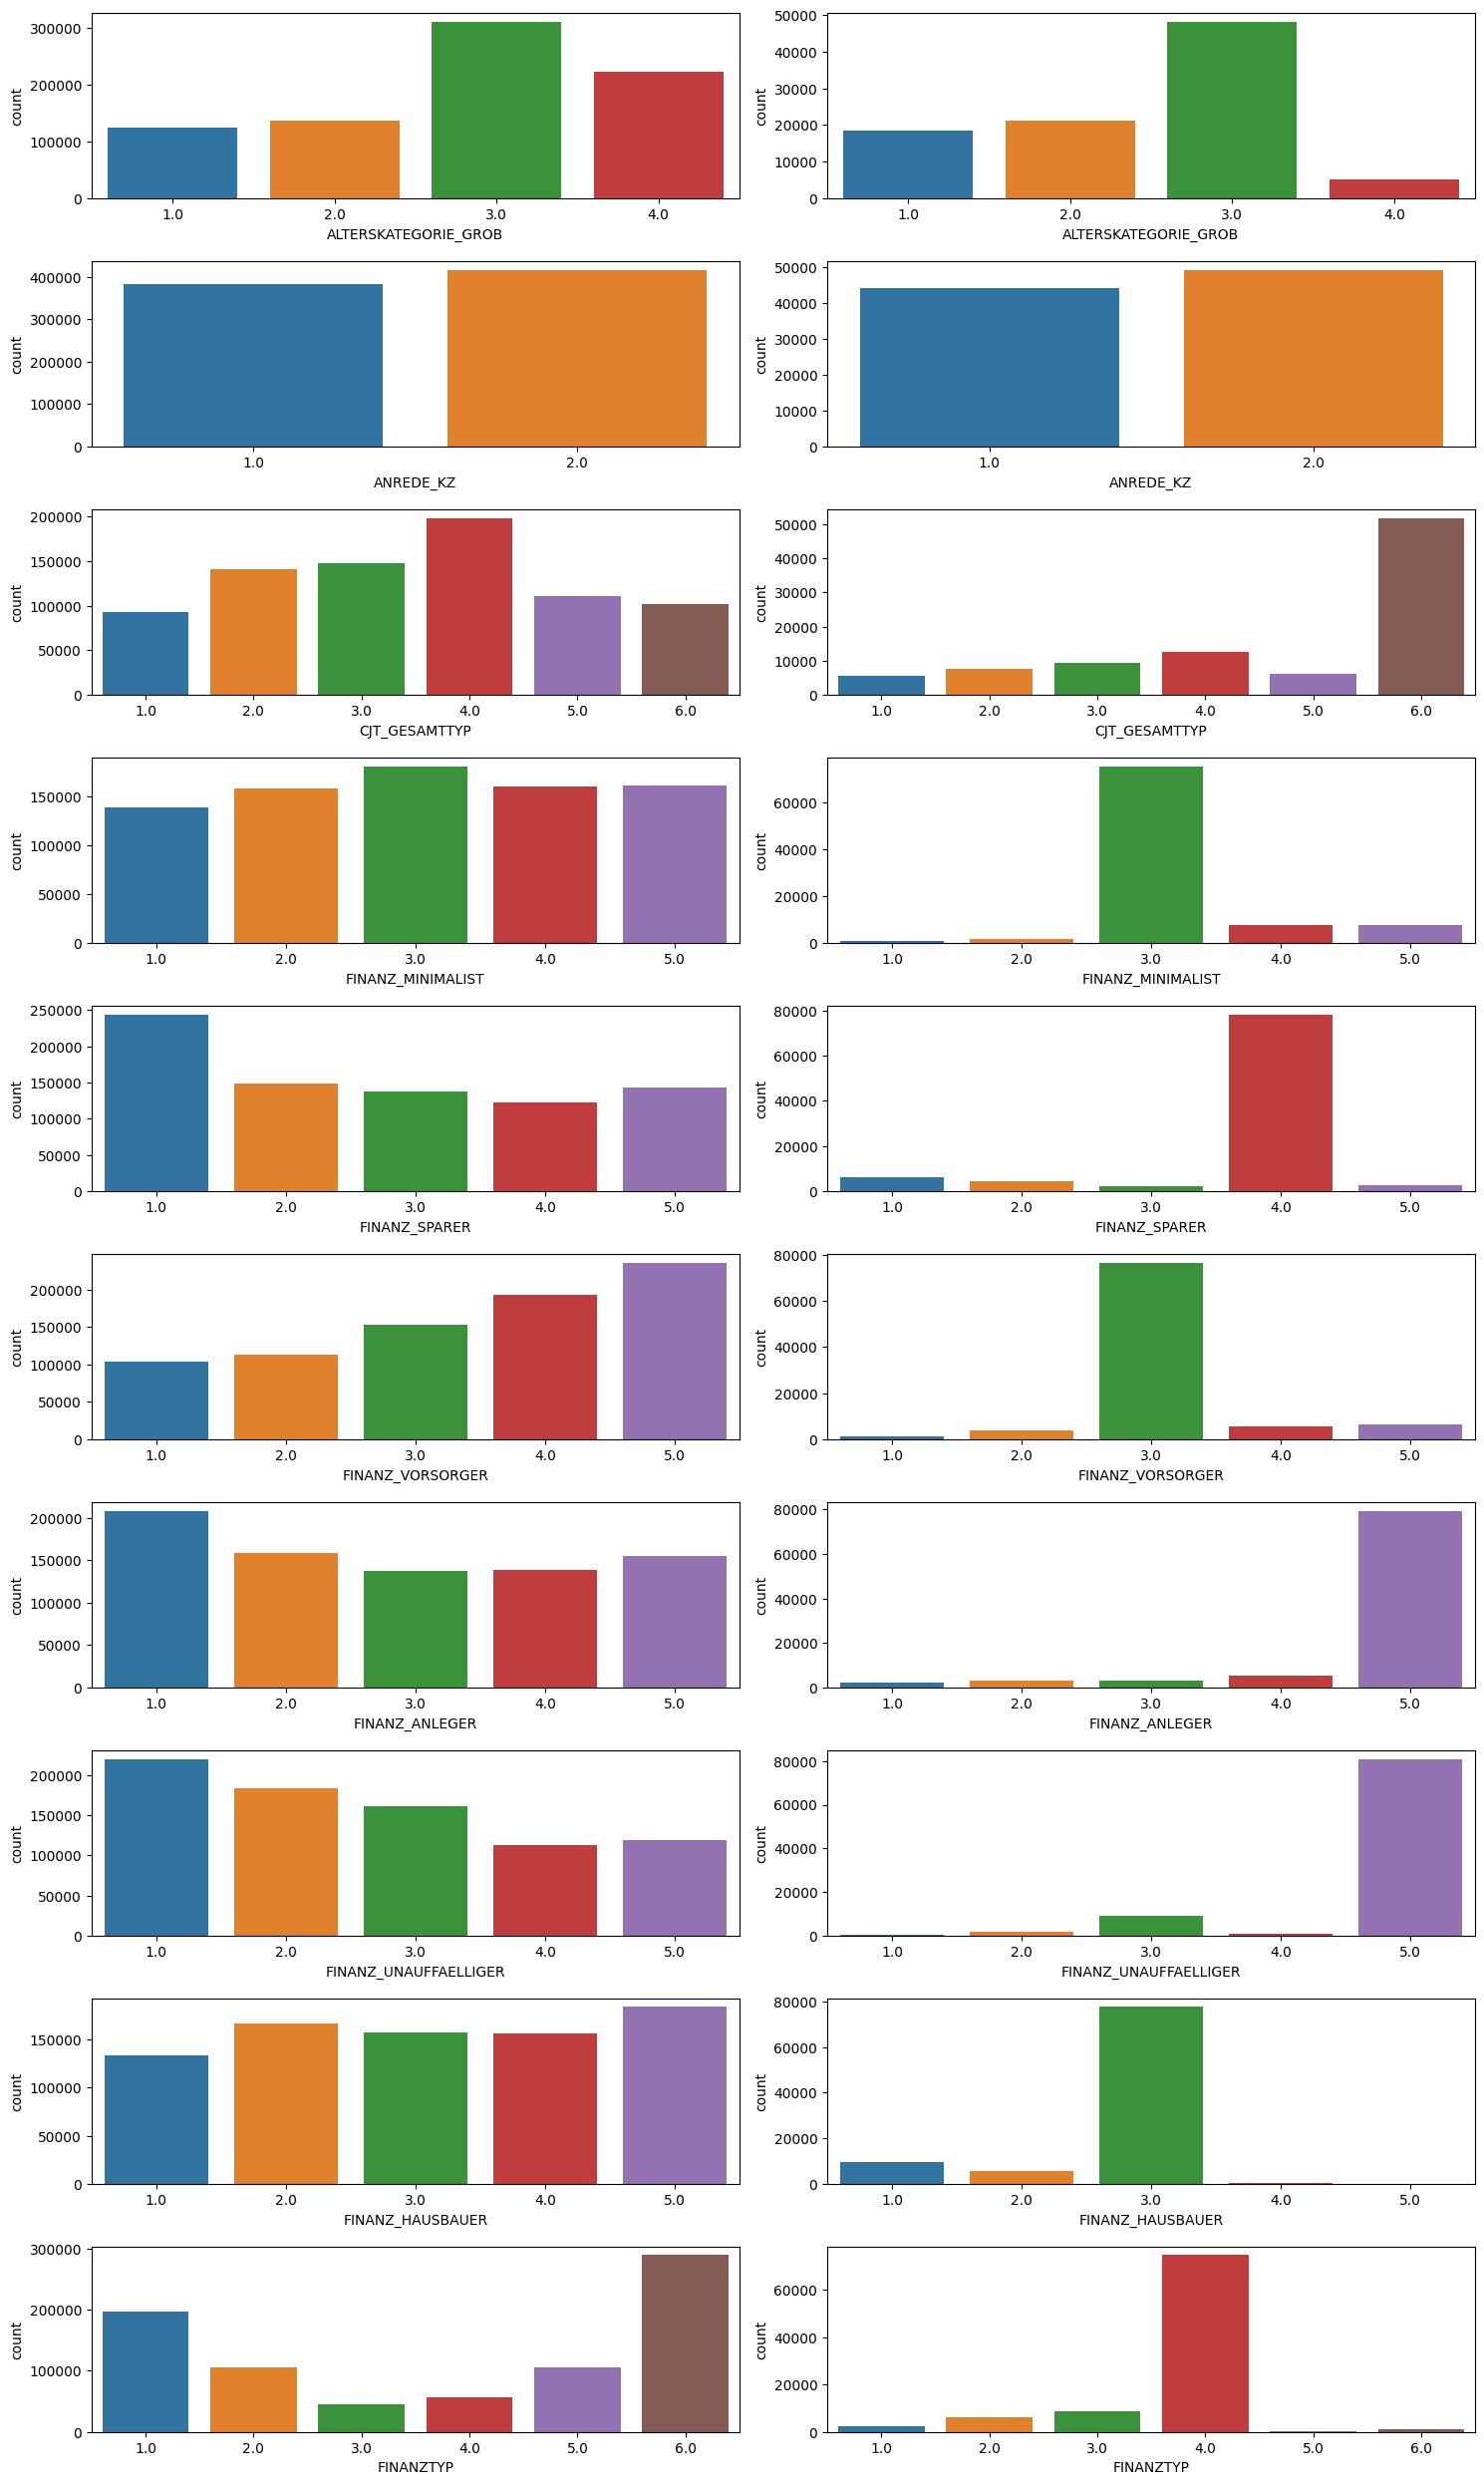

In [255]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

compare_dists(azdias.iloc[:,0:10])


#### Discussion 1.1.3: Assess Missing Data in Each Row

Yep it does diifer "signifcantly", hence we should keep the rows with alot of missing values.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [256]:
# How many features are there of each data type?
feat_info.groupby("type").count()["attribute"]

type
categorical    21
interval        1
mixed           7
numeric         7
ordinal        49
Name: attribute, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [257]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
all_categorical_columns = feat_info[(feat_info["type"] == "categorical") & (~feat_info["attribute"].isin(columns_to_drop))].attribute.values
azdias[all_categorical_columns].head(10)


ANREDE_KZ  CJT_GESAMTTYP  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  \
0        1.0            2.0        4.0             10.0                 0   
1        2.0            5.0        1.0             10.0                 0   
2        2.0            3.0        1.0             10.0                 1   
3        2.0            2.0        6.0              1.0                 0   
4        1.0            5.0        5.0              5.0                 0   
5        2.0            2.0        2.0              1.0                 0   
6        2.0            5.0        4.0             12.0                 0   
7        1.0            3.0        5.0              9.0                 0   
8        1.0            3.0        6.0              3.0                 1   
9        2.0            4.0        1.0             12.0                 1   

   LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  \
0              2.0              2.0             1.0             1.0   
1              5.0              3.0             2.0             1.0   
2              1.0              1.0             3.0             2.0   
3              0.0              0.0             9.0             4.0   
4             10.0              5.0             3.0             2.0   
5              1.0              1.0             4.0             2.0   
6              1.0              1.0             2.0             1.0   
7              1.0              1.0             1.0             1.0   
8              1.0              1.0            10.0             5.0   
9              1.0              1.0             3.0             2.0   

   NATIONALITAET_KZ  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  ZABEOTYP  \
0               NaN          NaN      NaN       NaN       NaN       3.0   
1               1.0          3.0      1.0       0.0       2.0       5.0   
2               1.0          2.0      0.0       0.0       1.0       5.0   
3               1.0          1.0      0.0       0.0       1.0       3.0   
4               1.0          2.0      0.0       0.0       2.0       4.0   
5               1.0          0.0      0.0       0.0       2.0       4.0   
6               1.0          1.0      0.0       0.0       1.0       4.0   
7               1.0          0.0      0.0       0.0       1.0       1.0   
8               1.0          3.0      0.0       0.0       2.0       6.0   
9               1.0          3.0      0.0       0.0       2.0       4.0   

   GEBAEUDETYP OST_WEST_KZ CAMEO_DEUG_2015 CAMEO_DEU_2015  
0          NaN         NaN             NaN            NaN  
1          8.0           W               8             8A  
2          1.0           W               4             4C  
3          1.0           W               2             2A  
4          1.0           W               6             6B  
5          1.0           W               8             8C  
6          1.0           W               4             4A  
7          8.0           W               2             2D  
8          3.0           W               1             1A  
9          3.0           W               1             1E

In [258]:
for col_name in all_categorical_columns:
    print(f'Column "{col_name}" unique values: {azdias[col_name].unique()}')


Column "ANREDE_KZ" unique values: [1. 2.]
Column "CJT_GESAMTTYP" unique values: [ 2.  5.  3.  4.  1.  6. nan]
Column "FINANZTYP" unique values: [4. 1. 6. 5. 2. 3.]
Column "GFK_URLAUBERTYP" unique values: [10.  1.  5. 12.  9.  3.  8. 11.  4.  2.  7.  6. nan]
Column "GREEN_AVANTGARDE" unique values: [0 1]
Column "LP_FAMILIE_FEIN" unique values: [ 2.  5.  1.  0. 10.  7. 11.  3.  8.  4.  6. nan  9.]
Column "LP_FAMILIE_GROB" unique values: [ 2.  3.  1.  0.  5.  4. nan]
Column "LP_STATUS_FEIN" unique values: [ 1.  2.  3.  9.  4. 10.  5.  8.  6.  7. nan]
Column "LP_STATUS_GROB" unique values: [ 1.  2.  4.  5.  3. nan]
Column "NATIONALITAET_KZ" unique values: [nan  1.  3.  2.]
Column "SHOPPER_TYP" unique values: [nan  3.  2.  1.  0.]
Column "SOHO_KZ" unique values: [nan  1.  0.]
Column "TITEL_KZ" unique values: [nan  0.  4.  1.  3.  5.  2.]
Column "VERS_TYP" unique values: [nan  2.  1.]
Column "ZABEOTYP" unique values: [3. 5. 4. 1. 6. 2.]
Column "GEBAEUDETYP" unique values: [nan  8.  1.  3.  2

In [259]:
binary_features = ["OST_WEST_KZ"] #=> Will be encoded with sklearn OrdinalEncoder
multi_level_categorical_features =  ["CAMEO_DEU_2015"]  #=> Will be encoded with sklearn OneHotEncoder

In [260]:
azdias[binary_features].head(10)

OST_WEST_KZ
0         NaN
1           W
2           W
3           W
4           W
5           W
6           W
7           W
8           W
9           W

In [261]:
# Re-encode categorical variable(s) to be kept in the analysis.
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
# Encoding binary features
binary_encoder = OneHotEncoder(handle_unknown='ignore', dtype=np.int8) #=> I used OneHotEncoder instead of OrdinalEncoder cuz of the 'handle_unknown' bug.
binary_encoded = np.array(binary_encoder.fit_transform(azdias[binary_features]).toarray())

In [262]:
sum(binary_encoded[:,0])

168545

In [263]:
azdias[binary_features].shape

(891221, 1)

In [264]:
azdias[binary_features[0]] = binary_encoded[:,1]
azdias[binary_features[0] + "_NULL"] = binary_encoded[:,0]

In [265]:
azdias[[binary_features[0],binary_features[0] + "_NULL"]].head()

OST_WEST_KZ  OST_WEST_KZ_NULL
0            0                 0
1            1                 0
2            1                 0
3            1                 0
4            1                 0

In [266]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore',dtype = np.int16)
one_hot_encoded = np.array(one_hot_encoder.fit_transform(azdias[multi_level_categorical_features]).toarray())

In [267]:
# Adding one-hot-encoded columns
for i in range(0,one_hot_encoded.shape[1]):
    azdias[multi_level_categorical_features[0] + "_" + str(i + 1)] = one_hot_encoded[:,i]

In [268]:
# Drop old column
azdias = azdias.drop(multi_level_categorical_features, axis = 1)

In [269]:
azdias.filter(regex=(multi_level_categorical_features[0] + "_[0-9]+[0-9]*")).head()

CAMEO_DEU_2015_1  CAMEO_DEU_2015_2  CAMEO_DEU_2015_3  CAMEO_DEU_2015_4  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   CAMEO_DEU_2015_5  CAMEO_DEU_2015_6  CAMEO_DEU_2015_7  CAMEO_DEU_2015_8  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 1                 0                 0   
4                 0                 0                 0                 0   

   CAMEO_DEU_2015_9  CAMEO_DEU_2015_10  CAMEO_DEU_2015_11  CAMEO_DEU_2015_12  \
0                 0                  0                  0                  0   
1                 0                  0                  0                  0   
2                 0                  0                  0                  0   
3                 0                  0                  0                  0   
4                 0                  0                  0                  0   

   CAMEO_DEU_2015_13  CAMEO_DEU_2015_14  CAMEO_DEU_2015_15  CAMEO_DEU_2015_16  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  1   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   CAMEO_DEU_2015_17  CAMEO_DEU_2015_18  CAMEO_DEU_2015_19  CAMEO_DEU_2015_20  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   CAMEO_DEU_2015_21  CAMEO_DEU_2015_22  CAMEO_DEU_2015_23  CAMEO_DEU_2015_24  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   CAMEO_DEU_2015_25  CAMEO_DEU_2015_26  CAMEO_DEU_2015_27  CAMEO_DEU_2015_28  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  1                  0                  0   

   CAMEO_DEU_2015_29  CAMEO_DEU_2015_30  CAMEO_DEU_2015_31  CAMEO_DEU_2015_32  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   CAMEO_DEU_2015_33  CAMEO_DEU_2015_34  CAMEO_DEU_2015_35  CAMEO_DEU_2015_36  \
0                  0                  0                  0                  0   

#### Discussion 1.2.1: Re-Encode Categorical Features

I decided to keep the nulls as a seperate category since we found out that removing null rows affects the distribution of columns.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [270]:
# Get list of mixed features
feat_info[feat_info["type"] == "mixed"]

attribute information_level   type missing_or_unknown
15    LP_LEBENSPHASE_FEIN            person  mixed                [0]
16    LP_LEBENSPHASE_GROB            person  mixed                [0]
22  PRAEGENDE_JUGENDJAHRE            person  mixed             [-1,0]
56               WOHNLAGE          building  mixed               [-1]
59        CAMEO_INTL_2015     microcell_rr4  mixed            [-1,XX]
64           KBA05_BAUMAX     microcell_rr3  mixed             [-1,0]
79            PLZ8_BAUMAX    macrocell_plz8  mixed             [-1,0]

In [271]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
mainstream_vals = [1,3,5,8,10,12,14]
#=> 1 for 'Mainstream', 0 for 'Avantgarde'.
azdias["PRAEGENDE_JUGENDJAHRE_MOVEMENT"] = azdias["PRAEGENDE_JUGENDJAHRE"]
azdias.loc[azdias["PRAEGENDE_JUGENDJAHRE"].isin(mainstream_vals),"PRAEGENDE_JUGENDJAHRE_MOVEMENT"] = 1
azdias.loc[~azdias["PRAEGENDE_JUGENDJAHRE"].isin(mainstream_vals),"PRAEGENDE_JUGENDJAHRE_MOVEMENT"] = 0
#=> Using int with least size (8-bit int)
azdias["PRAEGENDE_JUGENDJAHRE_MOVEMENT"] = azdias["PRAEGENDE_JUGENDJAHRE_MOVEMENT"].astype(np.int8)

In [272]:
azdias["PRAEGENDE_JUGENDJAHRE_MOVEMENT"].head(10)

0    0
1    1
2    0
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: PRAEGENDE_JUGENDJAHRE_MOVEMENT, dtype: int8

In [273]:
#=> Encode generation values
def get_decade(x):
    if int(x) in [1,2]:
        return 40
    elif int(x) in [3,4]:
        return 50
    elif int(x) in [5,6,7]:
        return 60
    elif int(x) in [8,9]:
        return 70
    elif int(x) in [10,11,12,13]:
        return 80
    elif int(x) in [14,15]:
        return 90
    
azdias["PRAEGENDE_JUGENDJAHRE_GEN"] = azdias["PRAEGENDE_JUGENDJAHRE"].map(get_decade, na_action="ignore")

In [274]:
azdias["PRAEGENDE_JUGENDJAHRE_GEN"].head()

0     NaN
1    90.0
2    90.0
3    70.0
4    70.0
Name: PRAEGENDE_JUGENDJAHRE_GEN, dtype: float64

In [275]:
def ord_1(x):
    if x not in ['-1','XX']:
        return int(x[0])
    else: x

def ord_2(x):
    if x not in ['-1','XX']:
        return int(x[1])
    else: x
    
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
azdias["CAMEO_INTL_2015_WEALTH"] = azdias["CAMEO_INTL_2015"].map(ord_1, na_action="ignore")
azdias["CAMEO_INTL_2015_TYPOLOGY"] = azdias["CAMEO_INTL_2015"].map(ord_2, na_action="ignore")

In [276]:
azdias["CAMEO_INTL_2015_WEALTH"].head()

0    NaN
1    5.0
2    2.0
3    1.0
4    4.0
Name: CAMEO_INTL_2015_WEALTH, dtype: float64

In [277]:
azdias["CAMEO_INTL_2015_TYPOLOGY"].head()

0    NaN
1    1.0
2    4.0
3    2.0
4    3.0
Name: CAMEO_INTL_2015_TYPOLOGY, dtype: float64

In [278]:
azdias["CAMEO_INTL_2015"].head()

0    NaN
1     51
2     24
3     12
4     43
Name: CAMEO_INTL_2015, dtype: object

#### Discussion 1.2.2: Engineer Mixed-Type Features
I did engineer some addtional features and left the so complicated ones that would take so much time.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [279]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

# Engineering WOHNLAGE:

# Neigbourhood Quality
azdias["WOHNLAGE_QUALITY"] = azdias["WOHNLAGE"].map(lambda value: np.nan if value in [7,8] else value).astype(np.float16)

# Is in Rural Neigbourhood?
# 0 => Not in rural neigbourhood, 1 => In rural neighbourhood, 2 => New building in rural neighbourhood
azdias["WOHNLAGE_RURAL"] = azdias["WOHNLAGE"].map(lambda value: 1 if value == 7 else 2 if value == 8 else 0 if value in [0,1,2,3,4,5] else np.nan).astype(np.float16)


In [280]:
azdias[["WOHNLAGE_QUALITY","WOHNLAGE_RURAL"]].head(10)

WOHNLAGE_QUALITY  WOHNLAGE_RURAL
0               NaN             NaN
1               4.0             0.0
2               2.0             0.0
3               NaN             1.0
4               3.0             0.0
5               NaN             1.0
6               5.0             0.0
7               1.0             0.0
8               1.0             0.0
9               NaN             1.0

In [281]:
# Engineering KBA05_BAUMAX, PLZ8_BAUMAX:

# ---- KBA05_BAUMAX ---- 
# Number of homes/buildings (ordinal)
azdias["KBA05_BAUMAX_NO_BUILDINGS"] = azdias["KBA05_BAUMAX"].map(lambda value: value if value in [1,2,3,4] else np.nan).astype(np.float16)
# Are business buildings? (homes => 0, business buildings => 1)
azdias["KBA05_BAUMAX_BIZ"] = azdias["KBA05_BAUMAX"].map(lambda value: 0 if value in [1,2,3,4] else 1 if value == 5 else np.nan).astype(np.float16)

# ---- PLZ8_BAUMAX ---- 
# Number of homes/buildings (ordinal)
azdias["PLZ8_BAUMAX_NO_BUILDINGS"] = azdias["PLZ8_BAUMAX"].map(lambda value: value if value in [1,2,3,4] else np.nan).astype(np.float16)
# Are business buildings? (homes => 0, business buildings => 1)
azdias["PLZ8_BAUMAX_BIZ"] = azdias["PLZ8_BAUMAX"].map(lambda value: 0 if value in [1,2,3,4] else 1 if value == 5 else np.nan).astype(np.float16)

In [282]:
azdias[["KBA05_BAUMAX_NO_BUILDINGS", "KBA05_BAUMAX_BIZ","PLZ8_BAUMAX_NO_BUILDINGS", "PLZ8_BAUMAX_BIZ"]].head(15)

KBA05_BAUMAX_NO_BUILDINGS  KBA05_BAUMAX_BIZ  PLZ8_BAUMAX_NO_BUILDINGS  \
0                         NaN               NaN                       NaN   
1                         NaN               1.0                       1.0   
2                         NaN               NaN                       1.0   
3                         1.0               0.0                       1.0   
4                         NaN               NaN                       2.0   
5                         NaN               NaN                       1.0   
6                         1.0               0.0                       1.0   
7                         NaN               NaN                       1.0   
8                         NaN               NaN                       1.0   
9                         NaN               NaN                       1.0   
10                        2.0               0.0                       2.0   
11                        NaN               NaN                       NaN   
12                        NaN               NaN                       1.0   
13                        NaN               NaN                       1.0   
14                        NaN               NaN                       NaN   

    PLZ8_BAUMAX_BIZ  
0               NaN  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
5               0.0  
6               0.0  
7               0.0  
8               0.0  
9               0.0  
10              0.0  
11              NaN  
12              0.0  
13              0.0  
14              NaN

In [283]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.
mixed_features_to_drop = feat_info[(feat_info["type"] == "mixed")]["attribute"].values
mixed_features_to_drop
# Dropping non-engineered and old columns features
azdias = azdias.drop(mixed_features_to_drop, axis = 1)

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [284]:
def clean_df(df):

    """
    Perform feature trimming, re-encoding, and engineering for demographics
    df
    
    INPUT: Demographics dfFrame
    OUTPUT: Trimmed and cleaned demographics dfFrame
    """

    binary_encoder = OneHotEncoder(handle_unknown='ignore', dtype=np.int8) #=> I used OneHotEncoder instead of OrdinalEncoder cuz of the 'handle_unknown' bug.
    binary_encoded = np.array(binary_encoder.fit_transform(df[binary_features]).toarray())

# Put in code here to execute all main cleaning steps:
# convert missing value codes into NaNs, ...
    for col_name in feat_info["attribute"]:      
        unknown_missing_codes = feat_info[feat_info["attribute"] == col_name]["missing_or_unknown"].values[0].lstrip("[").rstrip("]").split(",")
        if (len(unknown_missing_codes) == 1) and  (unknown_missing_codes[0] == ''):
                continue
        #print(unknown_missing_codes)
        df.loc[df[col_name].astype(str).isin(unknown_missing_codes),col_name] = np.NaN
        print(f'Column {col_name} finished')
        
    columns_to_drop = ["AGER_TYP", "KK_KUNDENTYP", "GEBURTSJAHR"]
    df = df.drop(columns_to_drop, axis = 1)
    df["ABOVE_NULL_THRESHOLD_30%"] = (df.isnull().sum(axis = 1)/len(df.columns)).map(lambda x: 1 if x>0.3 else 0)    
    
# remove selected columns and rows, ...
# select, re-encode, and engineer column values.
    df[binary_features[0]] = binary_encoded[:,1]
    df[binary_features[0] + "_NULL"] = binary_encoded[:,0]
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore',dtype = np.int16)
    one_hot_encoded = np.array(one_hot_encoder.fit_transform(df[multi_level_categorical_features]).toarray())
    # Adding one-hot-encoded columns
    for i in range(0,one_hot_encoded.shape[1]):
        df[multi_level_categorical_features[0] + "_" + str(i + 1)] = one_hot_encoded[:,i]
    # Drop old column
    df = df.drop(multi_level_categorical_features, axis = 1)
    # Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
    mainstream_vals = [1,3,5,8,10,12,14]
    #=> 1 for 'Mainstream', 0 for 'Avantgarde'.
    df["PRAEGENDE_JUGENDJAHRE_MOVEMENT"] = df["PRAEGENDE_JUGENDJAHRE"]
    df.loc[df["PRAEGENDE_JUGENDJAHRE"].isin(mainstream_vals),"PRAEGENDE_JUGENDJAHRE_MOVEMENT"] = 1
    df.loc[~df["PRAEGENDE_JUGENDJAHRE"].isin(mainstream_vals),"PRAEGENDE_JUGENDJAHRE_MOVEMENT"] = 0
    #=> Using int with least size (8-bit int)
    df["PRAEGENDE_JUGENDJAHRE_MOVEMENT"] = df["PRAEGENDE_JUGENDJAHRE_MOVEMENT"].astype(np.int8)
    df["PRAEGENDE_JUGENDJAHRE_GEN"] = df["PRAEGENDE_JUGENDJAHRE"].map(get_decade, na_action="ignore")
    df["CAMEO_INTL_2015_WEALTH"] = df["CAMEO_INTL_2015"].map(ord_1, na_action="ignore")
    df["CAMEO_INTL_2015_TYPOLOGY"] = df["CAMEO_INTL_2015"].map(ord_2, na_action="ignore")
    
    # Engineering WOHNLAGE:

    # Neigbourhood Quality
    df["WOHNLAGE_QUALITY"] = df["WOHNLAGE"].map(lambda value: np.nan if value in [7,8] else value).astype(np.float16)

    # Is in Rural Neigbourhood?
    # 0 => Not in rural neigbourhood, 1 => In rural neighbourhood, 2 => New building in rural neighbourhood
    df["WOHNLAGE_RURAL"] = df["WOHNLAGE"].map(lambda value: 1 if value == 7 else 2 if value == 8 else 0 if value in [0,1,2,3,4,5] else np.nan).astype(np.float16)
    
    # Engineering KBA05_BAUMAX, PLZ8_BAUMAX:

    # ---- KBA05_BAUMAX ---- 
    # Number of homes/buildings (ordinal)
    df["KBA05_BAUMAX_NO_BUILDINGS"] = df["KBA05_BAUMAX"].map(lambda value: value if value in [1,2,3,4] else np.nan).astype(np.float16)
    # Are business buildings? (homes => 0, business buildings => 1)
    df["KBA05_BAUMAX_BIZ"] = df["KBA05_BAUMAX"].map(lambda value: 0 if value in [1,2,3,4] else 1 if value == 5 else np.nan).astype(np.float16)

    # ---- PLZ8_BAUMAX ---- 
    # Number of homes/buildings (ordinal)
    df["PLZ8_BAUMAX_NO_BUILDINGS"] = df["PLZ8_BAUMAX"].map(lambda value: value if value in [1,2,3,4] else np.nan).astype(np.float16)
    # Are business buildings? (homes => 0, business buildings => 1)
    df["PLZ8_BAUMAX_BIZ"] = df["PLZ8_BAUMAX"].map(lambda value: 0 if value in [1,2,3,4] else 1 if value == 5 else np.nan).astype(np.float16)
    
    mixed_features_to_drop = feat_info[(feat_info["type"] == "mixed")]["attribute"].values
    mixed_features_to_drop
    # Dropping non-engineered and old columns features
    df = df.drop(mixed_features_to_drop, axis = 1)
    
    # Return the cleaned dataframe.
    return df

In [285]:
customers = clean_df(customers)

Column AGER_TYP finished
Column ALTERSKATEGORIE_GROB finished
Column ANREDE_KZ finished
Column CJT_GESAMTTYP finished
Column FINANZ_MINIMALIST finished
Column FINANZ_SPARER finished
Column FINANZ_VORSORGER finished
Column FINANZ_ANLEGER finished
Column FINANZ_UNAUFFAELLIGER finished
Column FINANZ_HAUSBAUER finished
Column FINANZTYP finished
Column GEBURTSJAHR finished
Column HEALTH_TYP finished
Column LP_LEBENSPHASE_FEIN finished
Column LP_LEBENSPHASE_GROB finished
Column LP_FAMILIE_FEIN finished
Column LP_FAMILIE_GROB finished
Column LP_STATUS_FEIN finished
Column LP_STATUS_GROB finished
Column NATIONALITAET_KZ finished
Column PRAEGENDE_JUGENDJAHRE finished
Column RETOURTYP_BK_S finished
Column SEMIO_SOZ finished
Column SEMIO_FAM finished
Column SEMIO_REL finished
Column SEMIO_MAT finished
Column SEMIO_VERT finished
Column SEMIO_LUST finished
Column SEMIO_ERL finished
Column SEMIO_KULT finished
Column SEMIO_RAT finished
Column SEMIO_KRIT finished
Column SEMIO_DOM finished
Column SEMIO

In [286]:
customers.head()

ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
0                   4.0        1.0            5.0                5.0   
1                   4.0        1.0            NaN                5.0   
2                   4.0        2.0            2.0                5.0   
3                   4.0        1.0            2.0                5.0   
4                   3.0        1.0            6.0                3.0   

   FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
0            1.0               5.0             1.0                    2.0   
1            1.0               5.0             1.0                    3.0   
2            1.0               5.0             1.0                    4.0   
3            1.0               5.0             2.0                    1.0   
4            1.0               4.0             4.0                    5.0   

   FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  \
0               2.0        2.0              4.0                 1         1.0   
1               2.0        2.0              NaN                 0         1.0   
2               4.0        2.0              3.0                 1         2.0   
3               2.0        6.0             10.0                 0         2.0   
4               2.0        2.0              2.0                 0         3.0   

   LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  \
0              2.0              2.0            10.0             5.0   
1              NaN              NaN             NaN             NaN   
2              1.0              1.0            10.0             5.0   
3              0.0              0.0             9.0             4.0   
4             10.0              5.0             1.0             1.0   

   NATIONALITAET_KZ  RETOURTYP_BK_S  SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  \
0               1.0             5.0        6.0        5.0        2.0   
1               1.0             NaN        3.0        6.0        2.0   
2               1.0             5.0        2.0        2.0        1.0   
3               1.0             3.0        6.0        5.0        3.0   
4               1.0             5.0        4.0        5.0        4.0   

   SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  \
0        6.0         6.0         7.0        3.0         4.0        1.0   
1        6.0         7.0         5.0        3.0         4.0        1.0   
2        3.0         3.0         7.0        7.0         1.0        2.0   
3        4.0         7.0         5.0        3.0         4.0        3.0   
4        6.0         5.0         6.0        4.0         5.0        5.0   

   SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  \
0         3.0        1.0         1.0            2.0          1.0          3.0   
1         3.0        3.0         2.0            4.0          1.0          3.0   
2         7.0        5.0         6.0            4.0          1.0          1.0   
3         3.0        3.0         3.0            3.0          4.0          0.0   
4         3.0        5.0         2.0            5.0          4.0          1.0   

   SOHO_KZ  TITEL_KZ  VERS_TYP  ZABEOTYP  ALTER_HH  ANZ_PERSONEN  ANZ_TITEL  \
0      0.0       0.0       1.0       3.0      10.0           2.0        0.0   
1      0.0       0.0       1.0       3.0      11.0           3.0        0.0   
2      0.0       0.0       2.0       3.0       6.0           1.0        0.0   
3      0.0       0.0       1.0       1.0       8.0           0.0        0.0   
4      0.0       0.0       2.0       1.0      20.0           4.0        0.0   

   HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  \
0                 1.0             6.0             9.0                  1.0   
1                 NaN             0.0             9.0                  NaN   
2                 1.0             6.0             9.0                  1.0   
3                 4.0             NaN    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [210]:
feat_info.type.unique()

array(['categorical', 'ordinal', 'numeric', 'mixed', 'interval'],
      dtype=object)

In [ ]:
azdias_few_nulls = azdias[azdias["ABOVE_NULL_THRESHOLD_30%"] == 0]
azdias_many_nulls = azdias[azdias["ABOVE_NULL_THRESHOLD_30%"] == 1]
customers_few_nulls = customers[customers["ABOVE_NULL_THRESHOLD_30%"] == 0]
customers_many_nulls = customers[customers["ABOVE_NULL_THRESHOLD_30%"] == 1]

In [21]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
def clean_nulls(data):
    binary_features = ["OST_WEST_KZ"] #=> Will be encoded with sklearn OrdinalEncoder
    multi_level_categorical_features =  ["CAMEO_DEU_2015"]  #=> Will be encoded with sklearn OneHotEncoder
    multi_level_categorical_features = data.filter(regex=(multi_level_categorical_features[0] + "_[0-9]+[0-9]*")).columns.tolist()
    mixed_cols_to_check = data.filter(regex=("PRAEGENDE_JUGENDJAHRE(_.+)+")).columns.tolist()
    #print(mixed_cols_to_check)
    mixed_cols_to_check = mixed_cols_to_check + data.filter(regex=("KBA05_BAUMAX(_.+)+")).columns.tolist()
    mixed_cols_to_check = mixed_cols_to_check + data.filter(regex=("PLZ8_BAUMAX(_.+)+")).columns.tolist()
    mixed_cols_to_check = mixed_cols_to_check + data.filter(regex=("WOHNLAGE(_.+)+")).columns.tolist()
    print(mixed_cols_to_check)
    for col_name in data.columns:
        try:
            is_cat = (feat_info[feat_info["attribute"] == col_name]["type"].values[0] == "categorical")
        except:
            is_cat = False
        if (col_name in mixed_cols_to_check) or (col_name in multi_level_categorical_features) or is_cat:
            try:
                data[col_name] = data[col_name].fillna(data[col_name].mode().values[0], axis = 0)
                print(f'Column {col_name} Finished, Number of nulls: {data[col_name].isnull().sum(axis = 0)}')
            except:
                print(f'Column {col_name} not found')
        else:
            try:
                data[col_name] = data[col_name].fillna(data[col_name].mean(), axis = 0)
                print(f'Column {col_name} Finished, Number of nulls: {data[col_name].isnull().sum(axis = 0)}')
            except:
                print(f'Column {col_name} not found')
            

In [22]:
#=> Clean General Population data with few nulls
clean_nulls(azdias_few_nulls)

['PRAEGENDE_JUGENDJAHRE_MOVEMENT', 'PRAEGENDE_JUGENDJAHRE_GEN', 'KBA05_BAUMAX_NO_BUILDINGS', 'KBA05_BAUMAX_BIZ', 'PLZ8_BAUMAX_NO_BUILDINGS', 'PLZ8_BAUMAX_BIZ', 'WOHNLAGE_QUALITY', 'WOHNLAGE_RURAL']
Column Unnamed: 0 Finished, Number of nulls: 0
Column ALTERSKATEGORIE_GROB Finished, Number of nulls: 0
Column ANREDE_KZ Finished, Number of nulls: 0
Column CJT_GESAMTTYP Finished, Number of nulls: 0
Column FINANZ_MINIMALIST Finished, Number of nulls: 0
Column FINANZ_SPARER Finished, Number of nulls: 0
Column FINANZ_VORSORGER Finished, Number of nulls: 0
Column FINANZ_ANLEGER Finished, Number of nulls: 0
Column FINANZ_UNAUFFAELLIGER Finished, Number of nulls: 0
Column FINANZ_HAUSBAUER Finished, Number of nulls: 0
Column FINANZTYP Finished, Number of nulls: 0
Column GFK_URLAUBERTYP Finished, Number of nulls: 0
Column GREEN_AVANTGARDE Finished, Number of nulls: 0
Column HEALTH_TYP Finished, Number of nulls: 0
Column LP_FAMILIE_FEIN Finished, Number of nulls: 0
Column LP_FAMILIE_GROB Finished, 

In [23]:
#=> Clean General Population data with many nulls
clean_nulls(azdias_many_nulls)

['PRAEGENDE_JUGENDJAHRE_MOVEMENT', 'PRAEGENDE_JUGENDJAHRE_GEN', 'KBA05_BAUMAX_NO_BUILDINGS', 'KBA05_BAUMAX_BIZ', 'PLZ8_BAUMAX_NO_BUILDINGS', 'PLZ8_BAUMAX_BIZ', 'WOHNLAGE_QUALITY', 'WOHNLAGE_RURAL']
Column Unnamed: 0 Finished, Number of nulls: 0
Column ALTERSKATEGORIE_GROB Finished, Number of nulls: 0
Column ANREDE_KZ Finished, Number of nulls: 0
Column CJT_GESAMTTYP Finished, Number of nulls: 0
Column FINANZ_MINIMALIST Finished, Number of nulls: 0
Column FINANZ_SPARER Finished, Number of nulls: 0
Column FINANZ_VORSORGER Finished, Number of nulls: 0
Column FINANZ_ANLEGER Finished, Number of nulls: 0
Column FINANZ_UNAUFFAELLIGER Finished, Number of nulls: 0
Column FINANZ_HAUSBAUER Finished, Number of nulls: 0
Column FINANZTYP Finished, Number of nulls: 0
Column GFK_URLAUBERTYP Finished, Number of nulls: 0
Column GREEN_AVANTGARDE Finished, Number of nulls: 0
Column HEALTH_TYP Finished, Number of nulls: 0
Column LP_FAMILIE_FEIN Finished, Number of nulls: 0
Column LP_FAMILIE_GROB Finished, 

In [24]:
#=> Clean Customers data with few nulls
clean_nulls(customers_few_nulls)

['PRAEGENDE_JUGENDJAHRE_MOVEMENT', 'PRAEGENDE_JUGENDJAHRE_GEN', 'KBA05_BAUMAX_NO_BUILDINGS', 'KBA05_BAUMAX_BIZ', 'PLZ8_BAUMAX_NO_BUILDINGS', 'PLZ8_BAUMAX_BIZ', 'WOHNLAGE_QUALITY', 'WOHNLAGE_RURAL']
Column Unnamed: 0 Finished, Number of nulls: 0
Column ALTERSKATEGORIE_GROB Finished, Number of nulls: 0
Column ANREDE_KZ Finished, Number of nulls: 0
Column CJT_GESAMTTYP Finished, Number of nulls: 0
Column FINANZ_MINIMALIST Finished, Number of nulls: 0
Column FINANZ_SPARER Finished, Number of nulls: 0
Column FINANZ_VORSORGER Finished, Number of nulls: 0
Column FINANZ_ANLEGER Finished, Number of nulls: 0
Column FINANZ_UNAUFFAELLIGER Finished, Number of nulls: 0
Column FINANZ_HAUSBAUER Finished, Number of nulls: 0
Column FINANZTYP Finished, Number of nulls: 0
Column GFK_URLAUBERTYP Finished, Number of nulls: 0
Column GREEN_AVANTGARDE Finished, Number of nulls: 0
Column HEALTH_TYP Finished, Number of nulls: 0
Column LP_FAMILIE_FEIN Finished, Number of nulls: 0
Column LP_FAMILIE_GROB Finished, 

In [25]:
#=> Clean Customers data with many nulls
clean_nulls(customers_many_nulls)

['PRAEGENDE_JUGENDJAHRE_MOVEMENT', 'PRAEGENDE_JUGENDJAHRE_GEN', 'KBA05_BAUMAX_NO_BUILDINGS', 'KBA05_BAUMAX_BIZ', 'PLZ8_BAUMAX_NO_BUILDINGS', 'PLZ8_BAUMAX_BIZ', 'WOHNLAGE_QUALITY', 'WOHNLAGE_RURAL']
Column Unnamed: 0 Finished, Number of nulls: 0
Column ALTERSKATEGORIE_GROB Finished, Number of nulls: 0
Column ANREDE_KZ Finished, Number of nulls: 0
Column CJT_GESAMTTYP Finished, Number of nulls: 0
Column FINANZ_MINIMALIST Finished, Number of nulls: 0
Column FINANZ_SPARER Finished, Number of nulls: 0
Column FINANZ_VORSORGER Finished, Number of nulls: 0
Column FINANZ_ANLEGER Finished, Number of nulls: 0
Column FINANZ_UNAUFFAELLIGER Finished, Number of nulls: 0
Column FINANZ_HAUSBAUER Finished, Number of nulls: 0
Column FINANZTYP Finished, Number of nulls: 0
Column GFK_URLAUBERTYP Finished, Number of nulls: 0
Column GREEN_AVANTGARDE Finished, Number of nulls: 0
Column HEALTH_TYP Finished, Number of nulls: 0
Column LP_FAMILIE_FEIN Finished, Number of nulls: 0
Column LP_FAMILIE_GROB Finished, 

In [26]:
# Some columns are completly full (or almost full) of nulls so imputing them is by no means usefull.
def drop_almost_null_columns(data):
    null_percent = (data.isnull().sum(axis = 0)/data.shape[0])
    completely_or_almost_null_columns = null_percent[null_percent >= 0.9].index
    print
    print(null_percent[completely_or_almost_null_columns])
    data = data.drop(completely_or_almost_null_columns, axis = 1)
    return data

In [27]:
azdias_few_nulls = drop_almost_null_columns(azdias_few_nulls)

Series([], dtype: float64)


In [28]:
azdias_many_nulls = drop_almost_null_columns(azdias_many_nulls)

KBA05_ANTG1                  1.0
KBA05_ANTG2                  1.0
KBA05_ANTG3                  1.0
KBA05_ANTG4                  1.0
KBA05_GBZ                    1.0
MOBI_REGIO                   1.0
PLZ8_ANTG1                   1.0
PLZ8_ANTG2                   1.0
PLZ8_ANTG3                   1.0
PLZ8_ANTG4                   1.0
PLZ8_HHZ                     1.0
PLZ8_GBZ                     1.0
KBA05_BAUMAX_NO_BUILDINGS    1.0
KBA05_BAUMAX_BIZ             1.0
PLZ8_BAUMAX_NO_BUILDINGS     1.0
PLZ8_BAUMAX_BIZ              1.0
dtype: float64


In [29]:
customers_few_nulls = drop_almost_null_columns(customers_few_nulls)

Series([], dtype: float64)


In [30]:
customers_many_nulls = drop_almost_null_columns(customers_many_nulls)

KBA05_ANTG1                  1.0
KBA05_ANTG2                  1.0
KBA05_ANTG3                  1.0
KBA05_ANTG4                  1.0
KBA05_GBZ                    1.0
MOBI_REGIO                   1.0
PLZ8_ANTG1                   1.0
PLZ8_ANTG2                   1.0
PLZ8_ANTG3                   1.0
PLZ8_ANTG4                   1.0
PLZ8_HHZ                     1.0
PLZ8_GBZ                     1.0
KBA05_BAUMAX_NO_BUILDINGS    1.0
KBA05_BAUMAX_BIZ             1.0
PLZ8_BAUMAX_NO_BUILDINGS     1.0
PLZ8_BAUMAX_BIZ              1.0
dtype: float64


In [31]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
azdias_few_nulls[azdias_few_nulls.columns] = scaler.fit_transform(azdias_few_nulls[azdias_few_nulls.columns])
azdias_few_nulls.head()

Unnamed: 0  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0    0.000000              0.000000        1.0            0.8   
1    0.000001              0.666667        1.0            0.4   
2    0.000002              1.000000        1.0            0.2   
3    0.000003              0.666667        0.0            0.8   
4    0.000004              0.000000        1.0            0.2   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0               0.00           1.00              0.25            1.00   
1               0.00           0.75              0.00            0.25   
2               0.75           0.25              1.00            0.25   
3               0.75           0.50              0.75            0.00   
4               0.50           0.00              1.00            0.25   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  \
0                   0.75              1.00        0.0         0.818182   
1                   0.50              1.00        0.0         0.818182   
2                   0.00              0.25        1.0         0.000000   
3                   0.50              0.25        0.8         0.363636   
4                   0.25              1.00        0.2         0.000000   

   GREEN_AVANTGARDE  HEALTH_TYP  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  \
0               0.0         1.0         0.454545              0.6   
1               1.0         1.0         0.090909              0.2   
2               0.0         0.5         0.000000              0.0   
3               0.0         1.0         0.909091              1.0   
4               0.0         1.0         0.090909              0.2   

   LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  RETOURTYP_BK_S  \
0        0.111111            0.00               0.0            0.00   
1        0.222222            0.25               0.0            0.50   
2        0.888889            0.75               0.0            0.25   
3        0.222222            0.25               0.0            1.00   
4        0.333333            0.25               0.0            0.50   

   SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  \
0   0.666667        0.5   0.500000   0.333333    0.000000    0.166667   
1   0.500000        0.0   0.333333   0.333333    0.500000    0.500000   
2   0.666667        0.0   0.166667   0.000000    0.500000    0.500000   
3   0.833333        0.5   0.500000   0.166667    1.000000    0.500000   
4   0.166667        0.5   1.000000   0.500000    0.166667    0.166667   

   SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  \
0   0.166667    0.333333   0.833333    0.500000   1.000000    0.500000   
1   0.833333    0.333333   0.500000    1.000000   1.000000    1.000000   
2   1.000000    0.500000   0.333333    0.500000   0.500000    0.666667   
3   0.500000    0.833333   0.166667    0.333333   0.166667    0.166667   
4   0.166667    0.666667   1.000000    0.500000   0.500000    0.500000   

   SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  \
0       1.000000     0.833333     1.000000      1.0       0.0       1.0   
1       0.333333     0.333333     0.666667      0.0       0.0       0.0   
2       0.500000     0.500000     0.333333      0.0       0.0       0.0   
3       0.500000     0.166667     0.666667      0.0       0.0       1.0   
4       1.000000     0.833333     0.000000      0.0       0.0       1.0   

   ZABEOTYP  ALTER_HH  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  \
0       0.8  0.000000      0.044444        0.0                 1.0   
1       0.8  0.809524      0.022222        0.0                 0.6   
2       0.4  0.619048      0.000000        0.0                 0.0   
3       0.6  0.952381      0.088889        0.0                 0.8   
4       0.6  0.476190      0.022222        0.0                 0.8   

   W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
0        0.500000             1.0             0.018487    

In [32]:
azdias_many_nulls[azdias_many_nulls.columns] = scaler.fit_transform(azdias_many_nulls[azdias_many_nulls.columns])
azdias_many_nulls.head()

Unnamed: 0  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0    0.000000              0.333333        0.0            0.2   
1    0.000012              0.333333        0.0            1.0   
2    0.000016              0.666667        0.0            1.0   
3    0.000019              0.333333        0.0            1.0   
4    0.000027              0.666667        1.0            1.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                0.5           0.75               0.5             1.0   
1                0.5           0.75               0.5             1.0   
2                0.5           0.75               0.5             1.0   
3                0.5           0.75               0.5             1.0   
4                0.5           0.75               0.5             1.0   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  \
0                    1.0               0.5        0.6         0.818182   
1                    1.0               0.5        0.6         0.363636   
2                    1.0               0.5        0.6         0.363636   
3                    1.0               0.5        0.6         0.363636   
4                    1.0               0.5        0.6         0.363636   

   GREEN_AVANTGARDE  HEALTH_TYP  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  \
0               0.0    0.414148         0.181818              0.4   
1               0.0    0.414148         0.000000              0.0   
2               0.0    0.414148         0.000000              0.0   
3               0.0    0.414148         0.000000              0.0   
4               0.0    0.414148         0.000000              0.0   

   LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  RETOURTYP_BK_S  \
0        0.000000            0.00          0.091703             1.0   
1        0.444444            0.25          0.091703             0.5   
2        0.444444            0.25          0.091703             0.5   
3        0.444444            0.25          0.091703             0.5   
4        0.444444            0.25          0.091703             0.5   

   SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  \
0        0.0   0.833333        1.0   0.666667         0.0    0.666667   
1        0.0   0.833333        1.0   0.666667         0.0    0.666667   
2        0.0   0.833333        1.0   0.666667         0.0    0.666667   
3        0.0   0.833333        1.0   0.666667         0.0    0.666667   
4        0.0   0.833333        1.0   0.666667         0.0    0.666667   

   SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  \
0   0.333333    0.333333        0.5         1.0   0.833333    0.833333   
1   0.333333    0.333333        0.5         1.0   0.833333    0.833333   
2   0.333333    0.333333        0.5         1.0   0.833333    0.833333   
3   0.333333    0.333333        0.5         1.0   0.833333    0.833333   
4   0.333333    0.333333        0.5         1.0   0.833333    0.833333   

   SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP   SOHO_KZ  TITEL_KZ  VERS_TYP  \
0            1.0     0.333333        0.686  0.008699  0.000738  0.239991   
1            1.0     0.333333        0.686  0.008699  0.000738  0.239991   
2            1.0     0.333333        0.686  0.008699  0.000738  0.239991   
3            1.0     0.333333        0.686  0.008699  0.000738  0.239991   
4            1.0     0.333333        0.686  0.008699  0.000738  0.239991   

   ZABEOTYP  ALTER_HH  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  \
0       0.4  0.495441      0.057872   0.002124                0.25   
1       0.4  0.495441      0.057872   0.002124                0.25   
2       0.4  0.495441      0.057872   0.002124                0.25   
3       0.4  0.495441      0.057872   0.002124                0.25   
4       0.4  0.495441      0.057872   0.002124                0.25   

   W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
0        0.070729        0.860693             0.0631

In [33]:
customers_few_nulls[customers_few_nulls.columns] = scaler.fit_transform(customers_few_nulls[customers_few_nulls.columns])
customers_few_nulls.head()

Unnamed: 0  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0    0.000000              1.000000        0.0            0.8   
1    0.000010              1.000000        1.0            0.2   
2    0.000016              1.000000        0.0            0.2   
3    0.000021              0.666667        0.0            1.0   
4    0.000026              0.666667        0.0            0.6   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                1.0            0.0              1.00            0.00   
1                1.0            0.0              1.00            0.00   
2                1.0            0.0              1.00            0.25   
3                0.5            0.0              0.75            0.75   
4                1.0            0.0              1.00            0.00   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  \
0                   0.25              0.25        0.2         0.272727   
1                   0.75              0.75        0.2         0.181818   
2                   0.00              0.25        1.0         0.818182   
3                   1.00              0.25        0.2         0.090909   
4                   0.25              0.50        0.8         0.909091   

   GREEN_AVANTGARDE  HEALTH_TYP  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  \
0               1.0         0.0         0.181818              0.4   
1               1.0         0.5         0.090909              0.2   
2               0.0         0.5         0.000000              0.0   
3               0.0         1.0         0.909091              1.0   
4               1.0         1.0         0.181818              0.4   

   LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  RETOURTYP_BK_S  \
0        1.000000            1.00               0.0             1.0   
1        1.000000            1.00               0.0             1.0   
2        0.888889            0.75               0.0             0.5   
3        0.000000            0.00               0.0             1.0   
4        0.666667            0.50               0.0             0.5   

   SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  \
0   0.833333   0.666667   0.166667   0.833333    0.833333    1.000000   
1   0.166667   0.166667   0.000000   0.333333    0.333333    1.000000   
2   0.833333   0.666667   0.333333   0.500000    1.000000    0.666667   
3   0.500000   0.666667   0.500000   0.833333    0.666667    0.833333   
4   0.833333   0.500000   0.500000   0.000000    1.000000    0.833333   

   SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  \
0   0.333333    0.500000   0.000000    0.333333   0.000000    0.000000   
1   1.000000    0.000000   0.166667    1.000000   0.666667    0.833333   
2   0.333333    0.500000   0.333333    0.333333   0.333333    0.333333   
3   0.500000    0.666667   0.666667    0.333333   0.666667    0.166667   
4   0.500000    0.833333   0.166667    0.666667   0.666667    0.333333   

   SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  \
0       0.166667          0.0     1.000000      0.0       0.0       0.0   
1       0.500000          0.0     0.333333      0.0       0.0       1.0   
2       0.333333          0.5     0.000000      0.0       0.0       0.0   
3       0.666667          0.5     0.333333      0.0       0.0       1.0   
4       0.333333          0.5     0.333333      0.0       0.0       1.0   

   ZABEOTYP  ALTER_HH  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  \
0       0.4  0.476190      0.095238        0.0                 0.0   
1       0.4  0.285714      0.047619        0.0                 0.0   
2       0.0  0.380952      0.000000        0.0                 0.6   
3       0.0  0.952381      0.190476        0.0                 1.0   
4       0.2  0.523810      0.095238        0.0                 0.0   

   W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
0        1.000000             1.0             0.001912    

In [34]:
customers_many_nulls[customers_many_nulls.columns] = scaler.fit_transform(customers_many_nulls[customers_many_nulls.columns])
customers_many_nulls.head()

Unnamed: 0  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0    0.000000              1.000000        0.0       0.896069   
1    0.000047              0.666667        1.0       0.800000   
2    0.000183              0.000000        1.0       1.000000   
3    0.000188              0.666667        1.0       1.000000   
4    0.000193              0.333333        1.0       1.000000   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0               1.00           0.00              1.00            0.00   
1               0.75           0.25              0.75            0.75   
2               0.50           0.75              0.50            1.00   
3               0.50           0.75              0.50            1.00   
4               0.50           0.75              0.50            1.00   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  \
0                    0.5          0.333333        0.2         0.391776   
1                    0.5          0.000000        1.0         0.909091   
2                    1.0          0.666667        0.6         0.363636   
3                    1.0          0.666667        0.6         0.363636   
4                    1.0          0.666667        0.6         0.363636   

   GREEN_AVANTGARDE  HEALTH_TYP  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  \
0               0.0    0.000000         0.099533         0.118634   
1               0.0    0.500000         0.090909         0.200000   
2               0.0    0.288339         0.000000         0.000000   
3               0.0    0.288339         0.000000         0.000000   
4               0.0    0.288339         0.000000         0.000000   

   LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  RETOURTYP_BK_S  \
0        0.478655        0.311037          0.000000        0.539241   
1        0.000000        0.000000          0.000000        0.750000   
2        0.444444        0.250000          0.022727        0.500000   
3        0.444444        0.250000          0.022727        0.500000   
4        0.444444        0.250000          0.022727        0.500000   

   SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  \
0        0.2   0.833333   0.166667   0.833333         1.0         0.8   
1        0.4   0.000000   0.000000   0.166667         0.5         0.6   
2        0.0   0.833333   1.000000   0.666667         0.0         0.8   
3        0.0   0.833333   1.000000   0.666667         0.0         0.8   
4        0.0   0.833333   1.000000   0.666667         0.0         0.8   

   SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  \
0   0.333333    0.500000        0.0    0.333333        0.4         0.0   
1   0.833333    0.000000        0.6    1.000000        1.0         1.0   
2   0.333333    0.333333        0.6    1.000000        1.0         0.8   
3   0.333333    0.333333        0.6    1.000000        1.0         0.8   
4   0.333333    0.333333        0.6    1.000000        1.0         0.8   

   SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP   SOHO_KZ  TITEL_KZ  VERS_TYP  \
0            0.5     0.000000     1.000000  0.000000  0.000000  0.000000   
1            0.5     0.333333     1.000000  0.000000  0.000000  0.000000   
2            1.0     0.333333     0.734892  0.010749  0.003703  0.090799   
3            1.0     0.333333     0.734892  0.010749  0.003703  0.090799   
4            1.0     0.333333     0.734892  0.010749  0.003703  0.090799   

   ZABEOTYP  ALTER_HH  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  \
0       0.4  0.523810      0.333333   0.000000            0.250426   
1       0.4  0.666667      0.111111   0.000000            0.250426   
2       0.4  0.534417      0.246044   0.010899            0.250000   
3       0.4  0.534417      0.246044   0.010899            0.250000   
4       0.4  0.534417      0.246044   0.010899            0.250000   

   W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
0        0.000000        1.000000             0.1643

### Discussion 2.1: Apply Feature Scaling

I intented/prefered to use MinMaxScaler because most of our data is categorical with known range of discrete values so it was the best choice to go for.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [35]:
from sklearn.decomposition import PCA
import math
def do_pca_and_plot(n, data):
    pca = PCA(n, svd_solver = "randomized")
    pca_x = pca.fit_transform(data)
    fig = plt.figure(figsize = (15,7))
    ax = fig.add_axes((1,1,1,1))
    ax.bar(np.arange(1,n + 1,1),pca.explained_variance_/sum(pca.explained_variance_)*100,width=0.5)
    ax.plot(np.arange(1,n + 1,1),np.cumsum(pca.explained_variance_/sum(pca.explained_variance_))*100,marker="o",color = "red")
    plt.xticks(np.arange(1,n + 1,1),[str(x) for x in np.arange(1,n + 1,1)]);

    for x,y in zip(np.arange(1,n + 1,1),np.cumsum(pca.explained_variance_/sum(pca.explained_variance_))*100):
        ax.annotate(str(round(y,0)) + "%", (x - 1/4 ,y*1.015),**{"fontsize" : 10})
    
    plt.xlabel("PCA",fontsize = 20)
    plt.ylabel("Percentage/Cumulative Percentage of Variance",fontsize = 20)
    plt.tight_layout()
    return pca,pca_x

In [39]:
azdias.isnull().sum(axis = 0)

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KU

In [40]:
azdias_few_nulls.isnull().sum(axis = 0)/len(azdias_few_nulls)

Unnamed: 0                        0.0
ALTERSKATEGORIE_GROB              0.0
ANREDE_KZ                         0.0
CJT_GESAMTTYP                     0.0
FINANZ_MINIMALIST                 0.0
FINANZ_SPARER                     0.0
FINANZ_VORSORGER                  0.0
FINANZ_ANLEGER                    0.0
FINANZ_UNAUFFAELLIGER             0.0
FINANZ_HAUSBAUER                  0.0
FINANZTYP                         0.0
GFK_URLAUBERTYP                   0.0
GREEN_AVANTGARDE                  0.0
HEALTH_TYP                        0.0
LP_FAMILIE_FEIN                   0.0
LP_FAMILIE_GROB                   0.0
LP_STATUS_FEIN                    0.0
LP_STATUS_GROB                    0.0
NATIONALITAET_KZ                  0.0
RETOURTYP_BK_S                    0.0
SEMIO_SOZ                         0.0
SEMIO_FAM                         0.0
SEMIO_REL                         0.0
SEMIO_MAT                         0.0
SEMIO_VERT                        0.0
SEMIO_LUST                        0.0
SEMIO_ERL   

C:\Users\AmirWG\AppData\Local\Temp\ipykernel_6232\1148210629.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


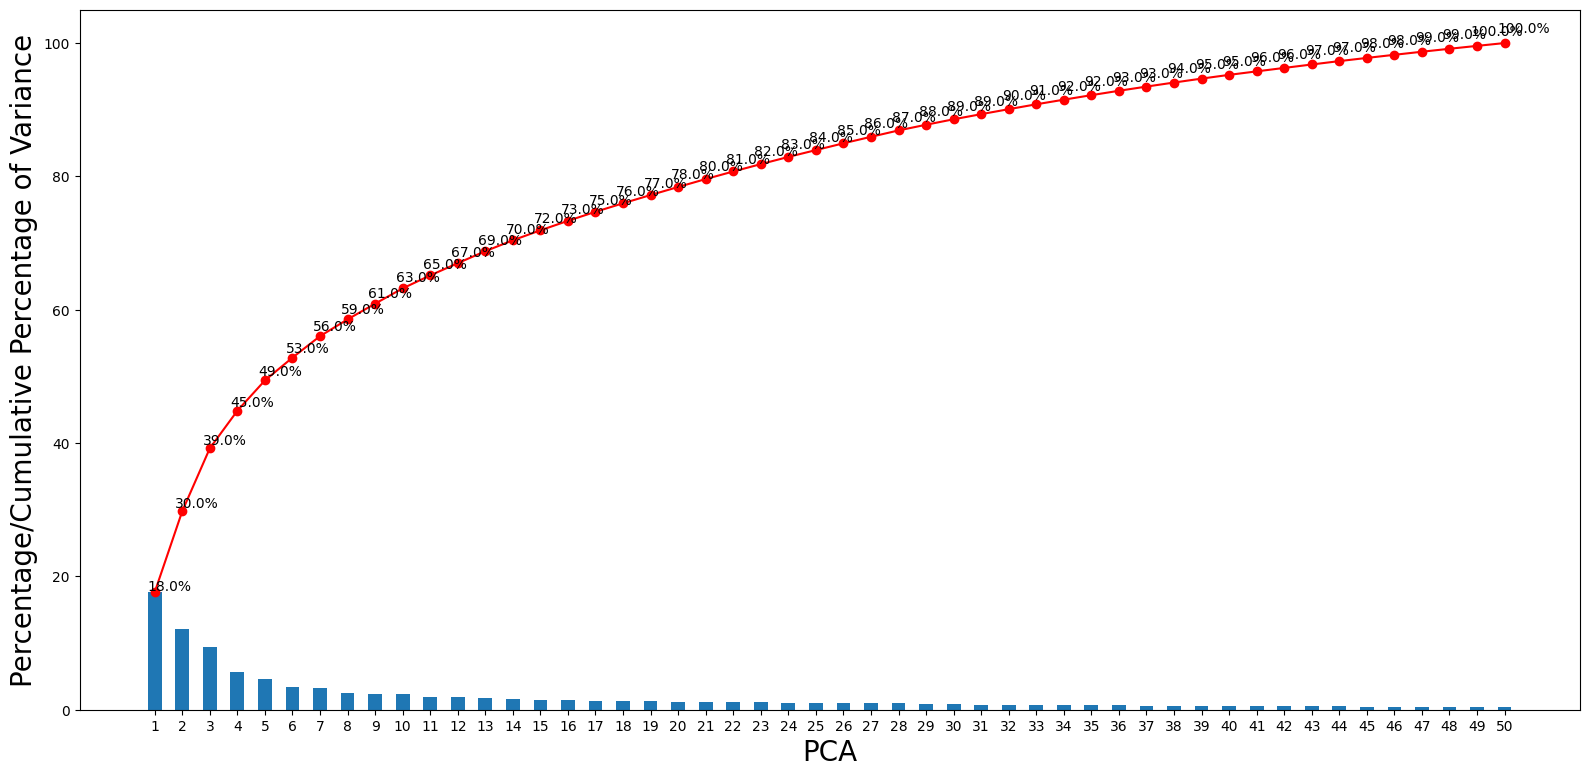

In [41]:
# Apply PCA to the data.
azdias_few_nulls_pca, azdias_few_nulls_pca_x = do_pca_and_plot(50, azdias_few_nulls)

**Comment:** Please ignore the messy text coliding with each other however my pca viz generator function works just fine with lower number of n_components (look at the upcoming vizs)

In [42]:
# Investigate the variance accounted for by each principal component.
#=> Already done in previous viz.

C:\Users\AmirWG\AppData\Local\Temp\ipykernel_6232\1148210629.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


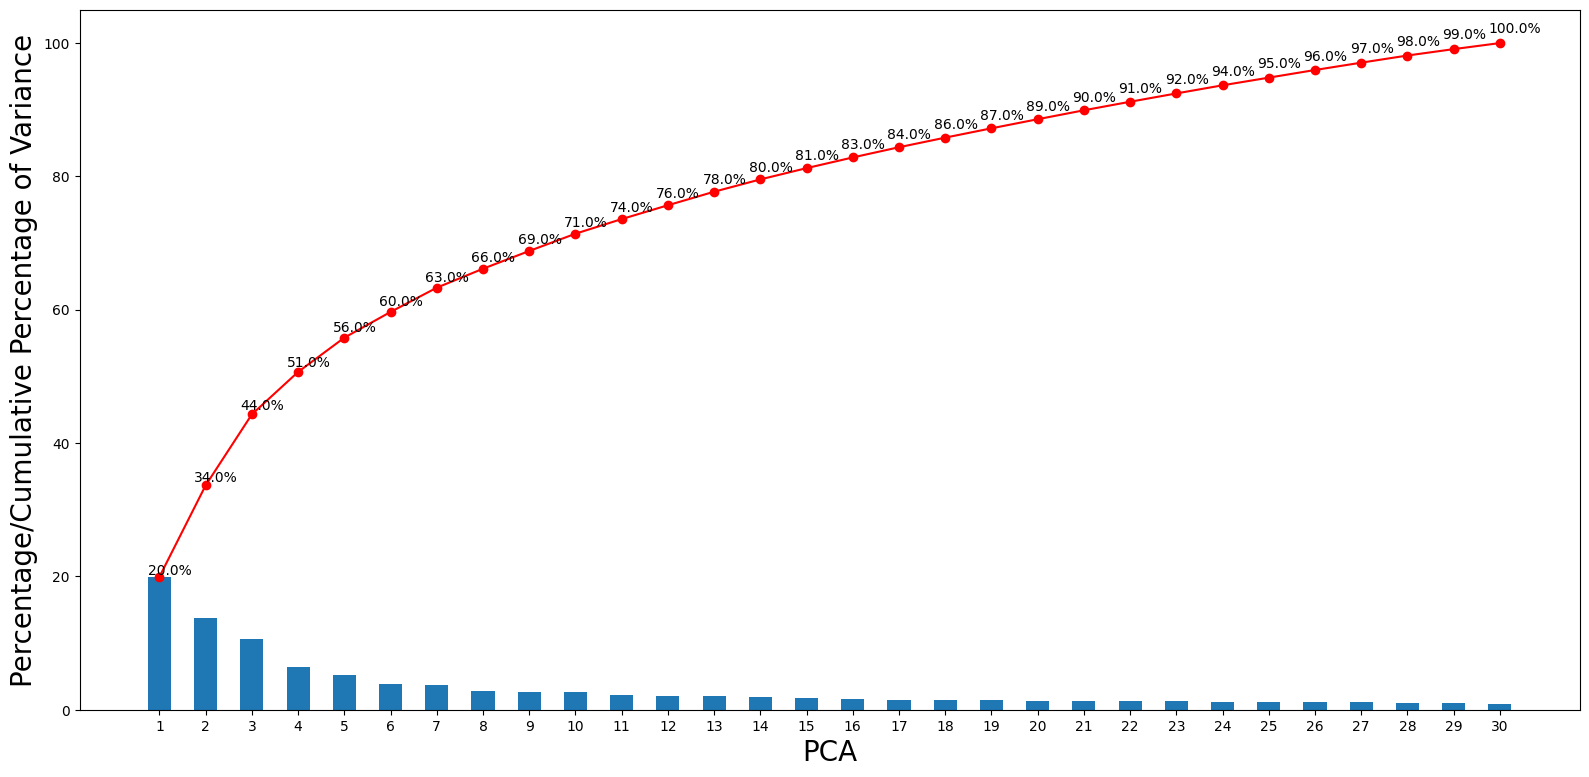

In [43]:
# Re-apply PCA to the data while selecting for number of components to retain.
azdias_few_nulls_pca, azdias_few_nulls_pca_x = do_pca_and_plot(30, azdias_few_nulls)

### Discussion 2.2: Perform Dimensionality Reduction

30 features/components will be more than enough based on the scree plot since the slope is becoming very steep so the increase in variability is very small and less signifcant.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [44]:
import random
# Generate n colors
def color_gen(n):
    step = math.floor(255/n)

    return [f'#{random.randint(0,255):02x}{random.randint(0,255):02x}{random.randint(0,255):02x}' for z in range(0,n)]
    #return [f'#{c:02x}0000' for c in range(255,0,-step)]

# Generaing random hex colours
rand_colors = color_gen(len(azdias_few_nulls.columns))
# Mapping each feature to a specific color
rand_colors_dict = dict(zip(azdias_few_nulls.columns, rand_colors))

In [45]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def get_sorted_weights(n_pca,first_n, order):
    weights_dict = dict(zip(azdias_few_nulls.columns,azdias_few_nulls_pca.components_[n_pca - 1]))
    weights_dict_sorted = sorted(weights_dict.items(), key = lambda x: x[1], reverse=order)
    fig = plt.figure(figsize = (50,20))
    labels = list(map(lambda x: x[0], weights_dict_sorted))[0:first_n]
    plt.bar(x = range(1,first_n + 1),height = list(map(lambda x: x[1], weights_dict_sorted))[0:first_n], tick_label = labels, color = [rand_colors_dict.get(label) for label in labels])
    #sns.plot(x = list(map(lambda x: x[0], weights_dict_sorted))[0:first_n], y = list(map(lambda x: x[1], weights_dict_sorted))[0:first_n])
    plt.xticks(rotation=45, ha='right', size = 35)
    plt.yticks(size = 35)
    if order:
        plt.xlabel(f'PCA {n_pca} (Largest {first_n} Weights)', size = 50)
    else:
        plt.xlabel(f'PCA {n_pca} (Smallest {first_n} Weights)', size = 50)     
    #return weights_dict_sorted

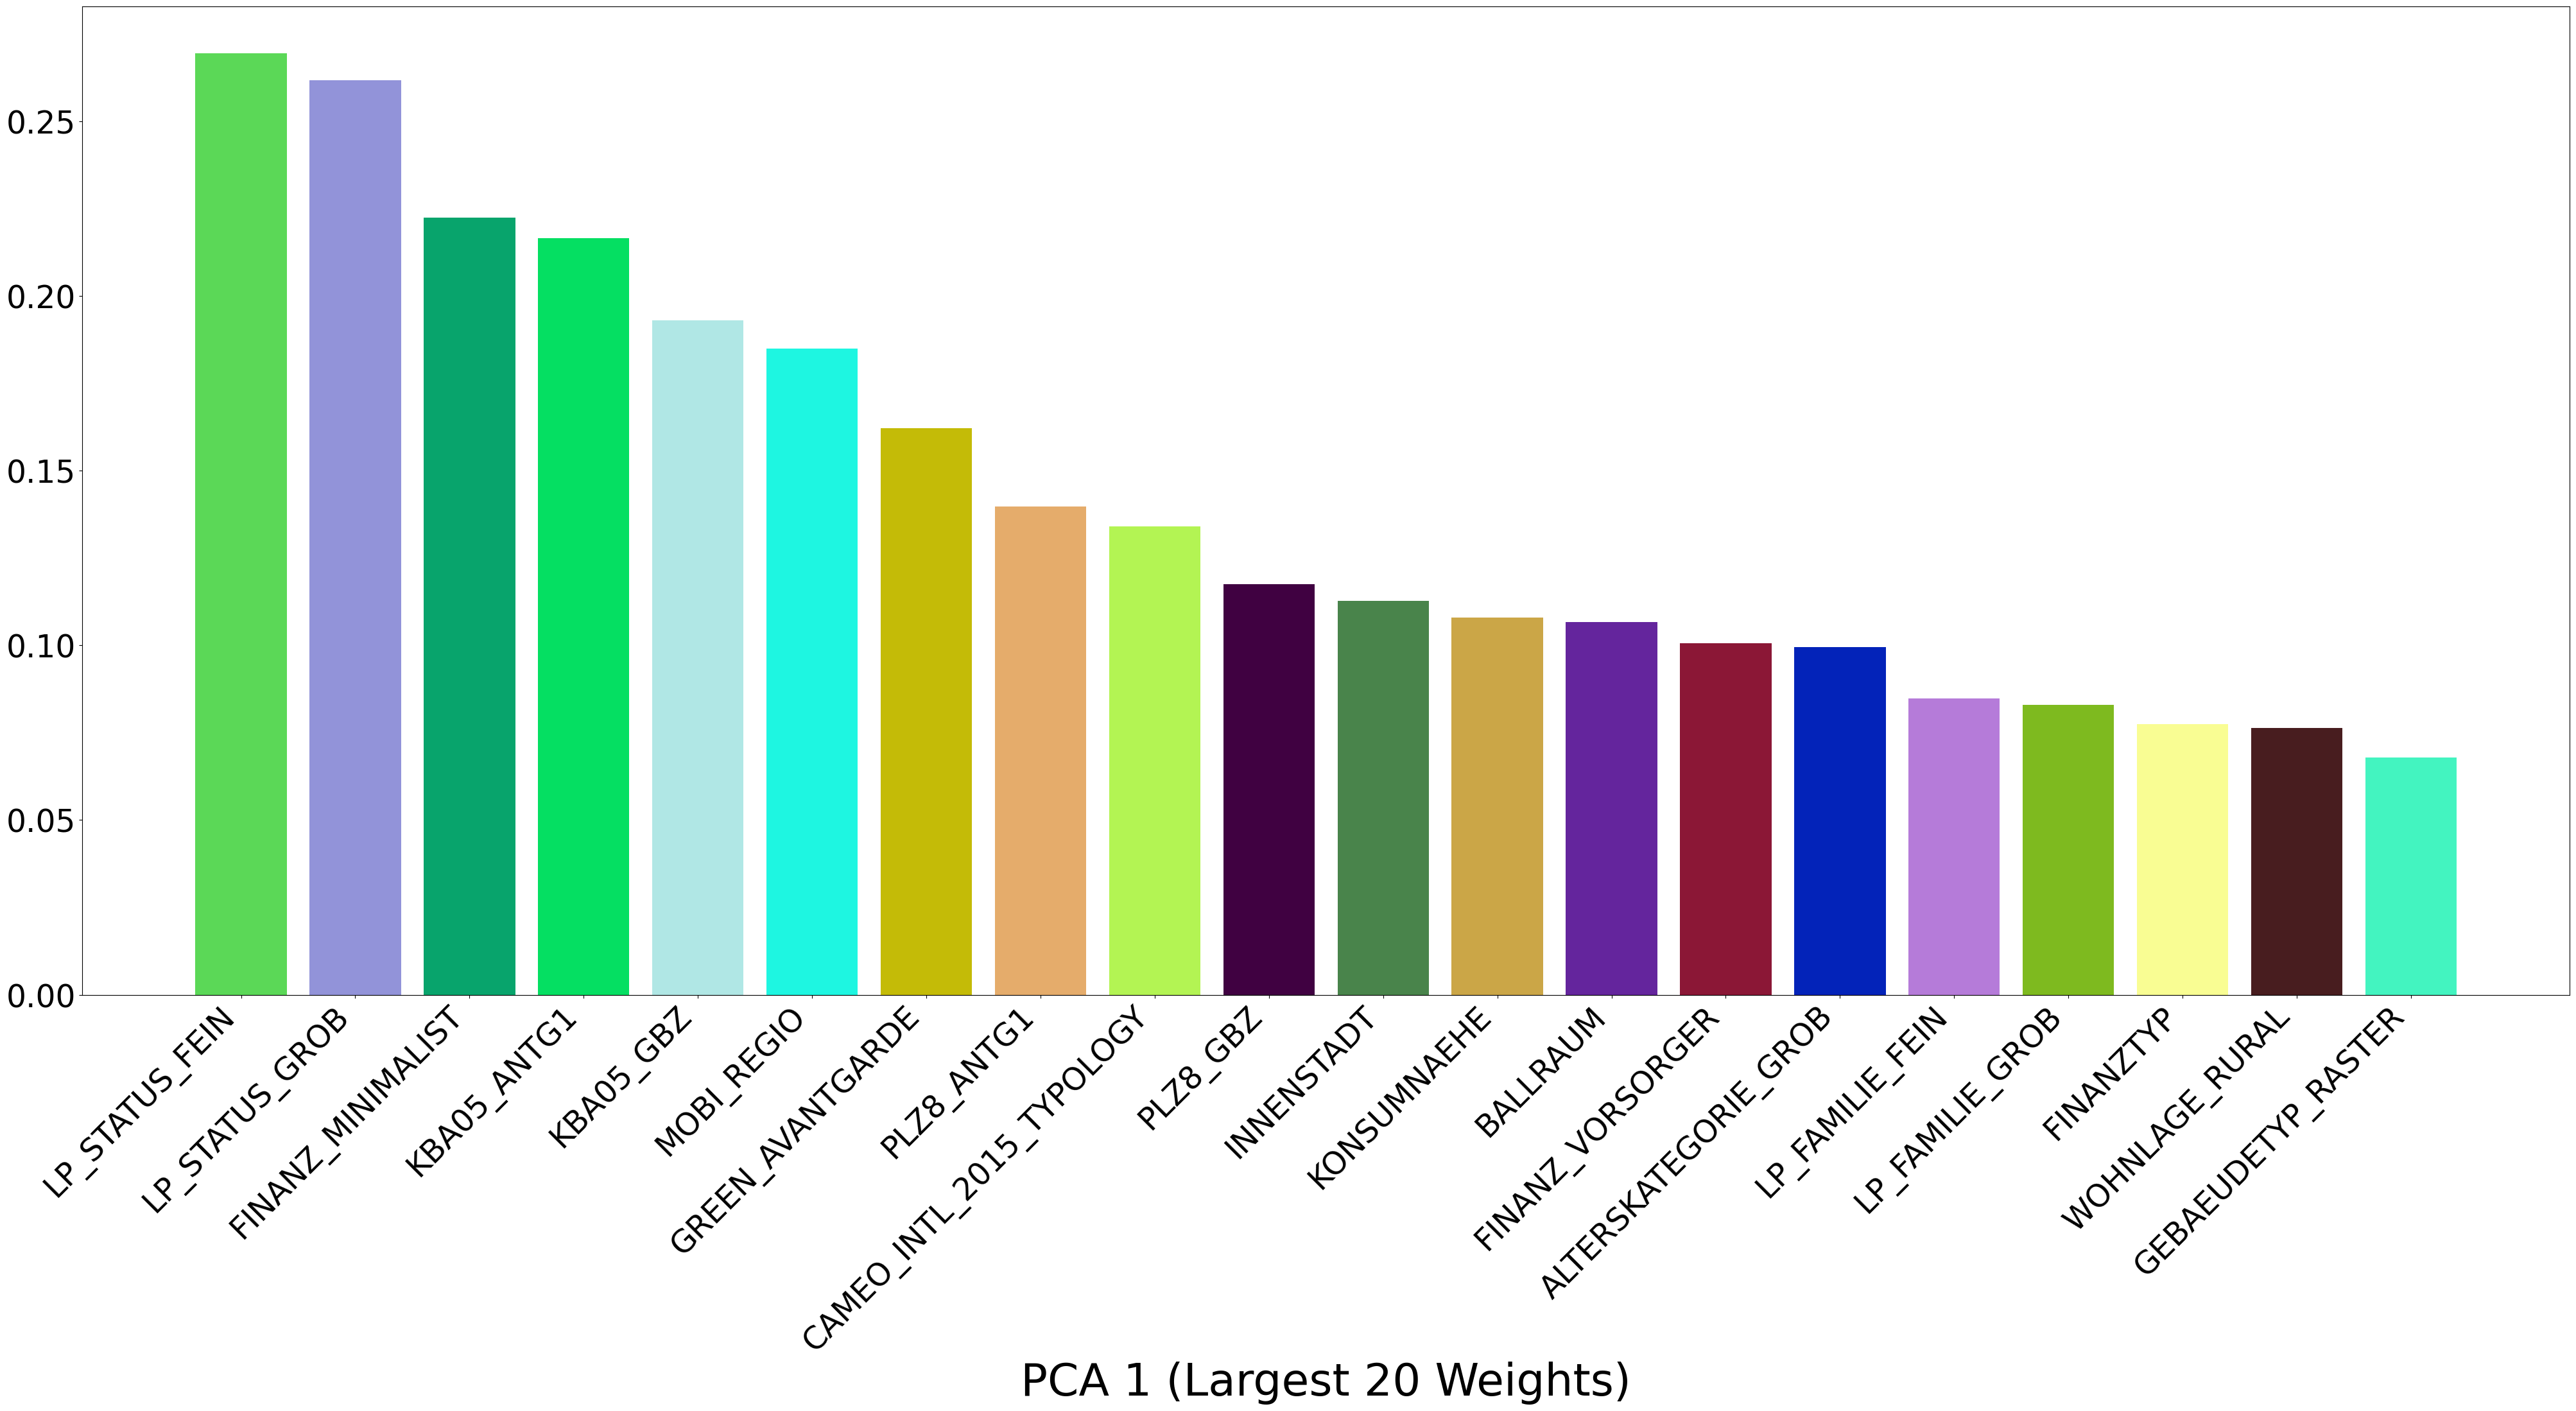

In [46]:
#=> Largest 20 Weights for PCA 1
get_sorted_weights(1,20,True)

**Comment:** PCA 1 mostly targets social status/wealth of indivisuals, their shares in households/homes, their financial interest and how prepaed they are to take risk.

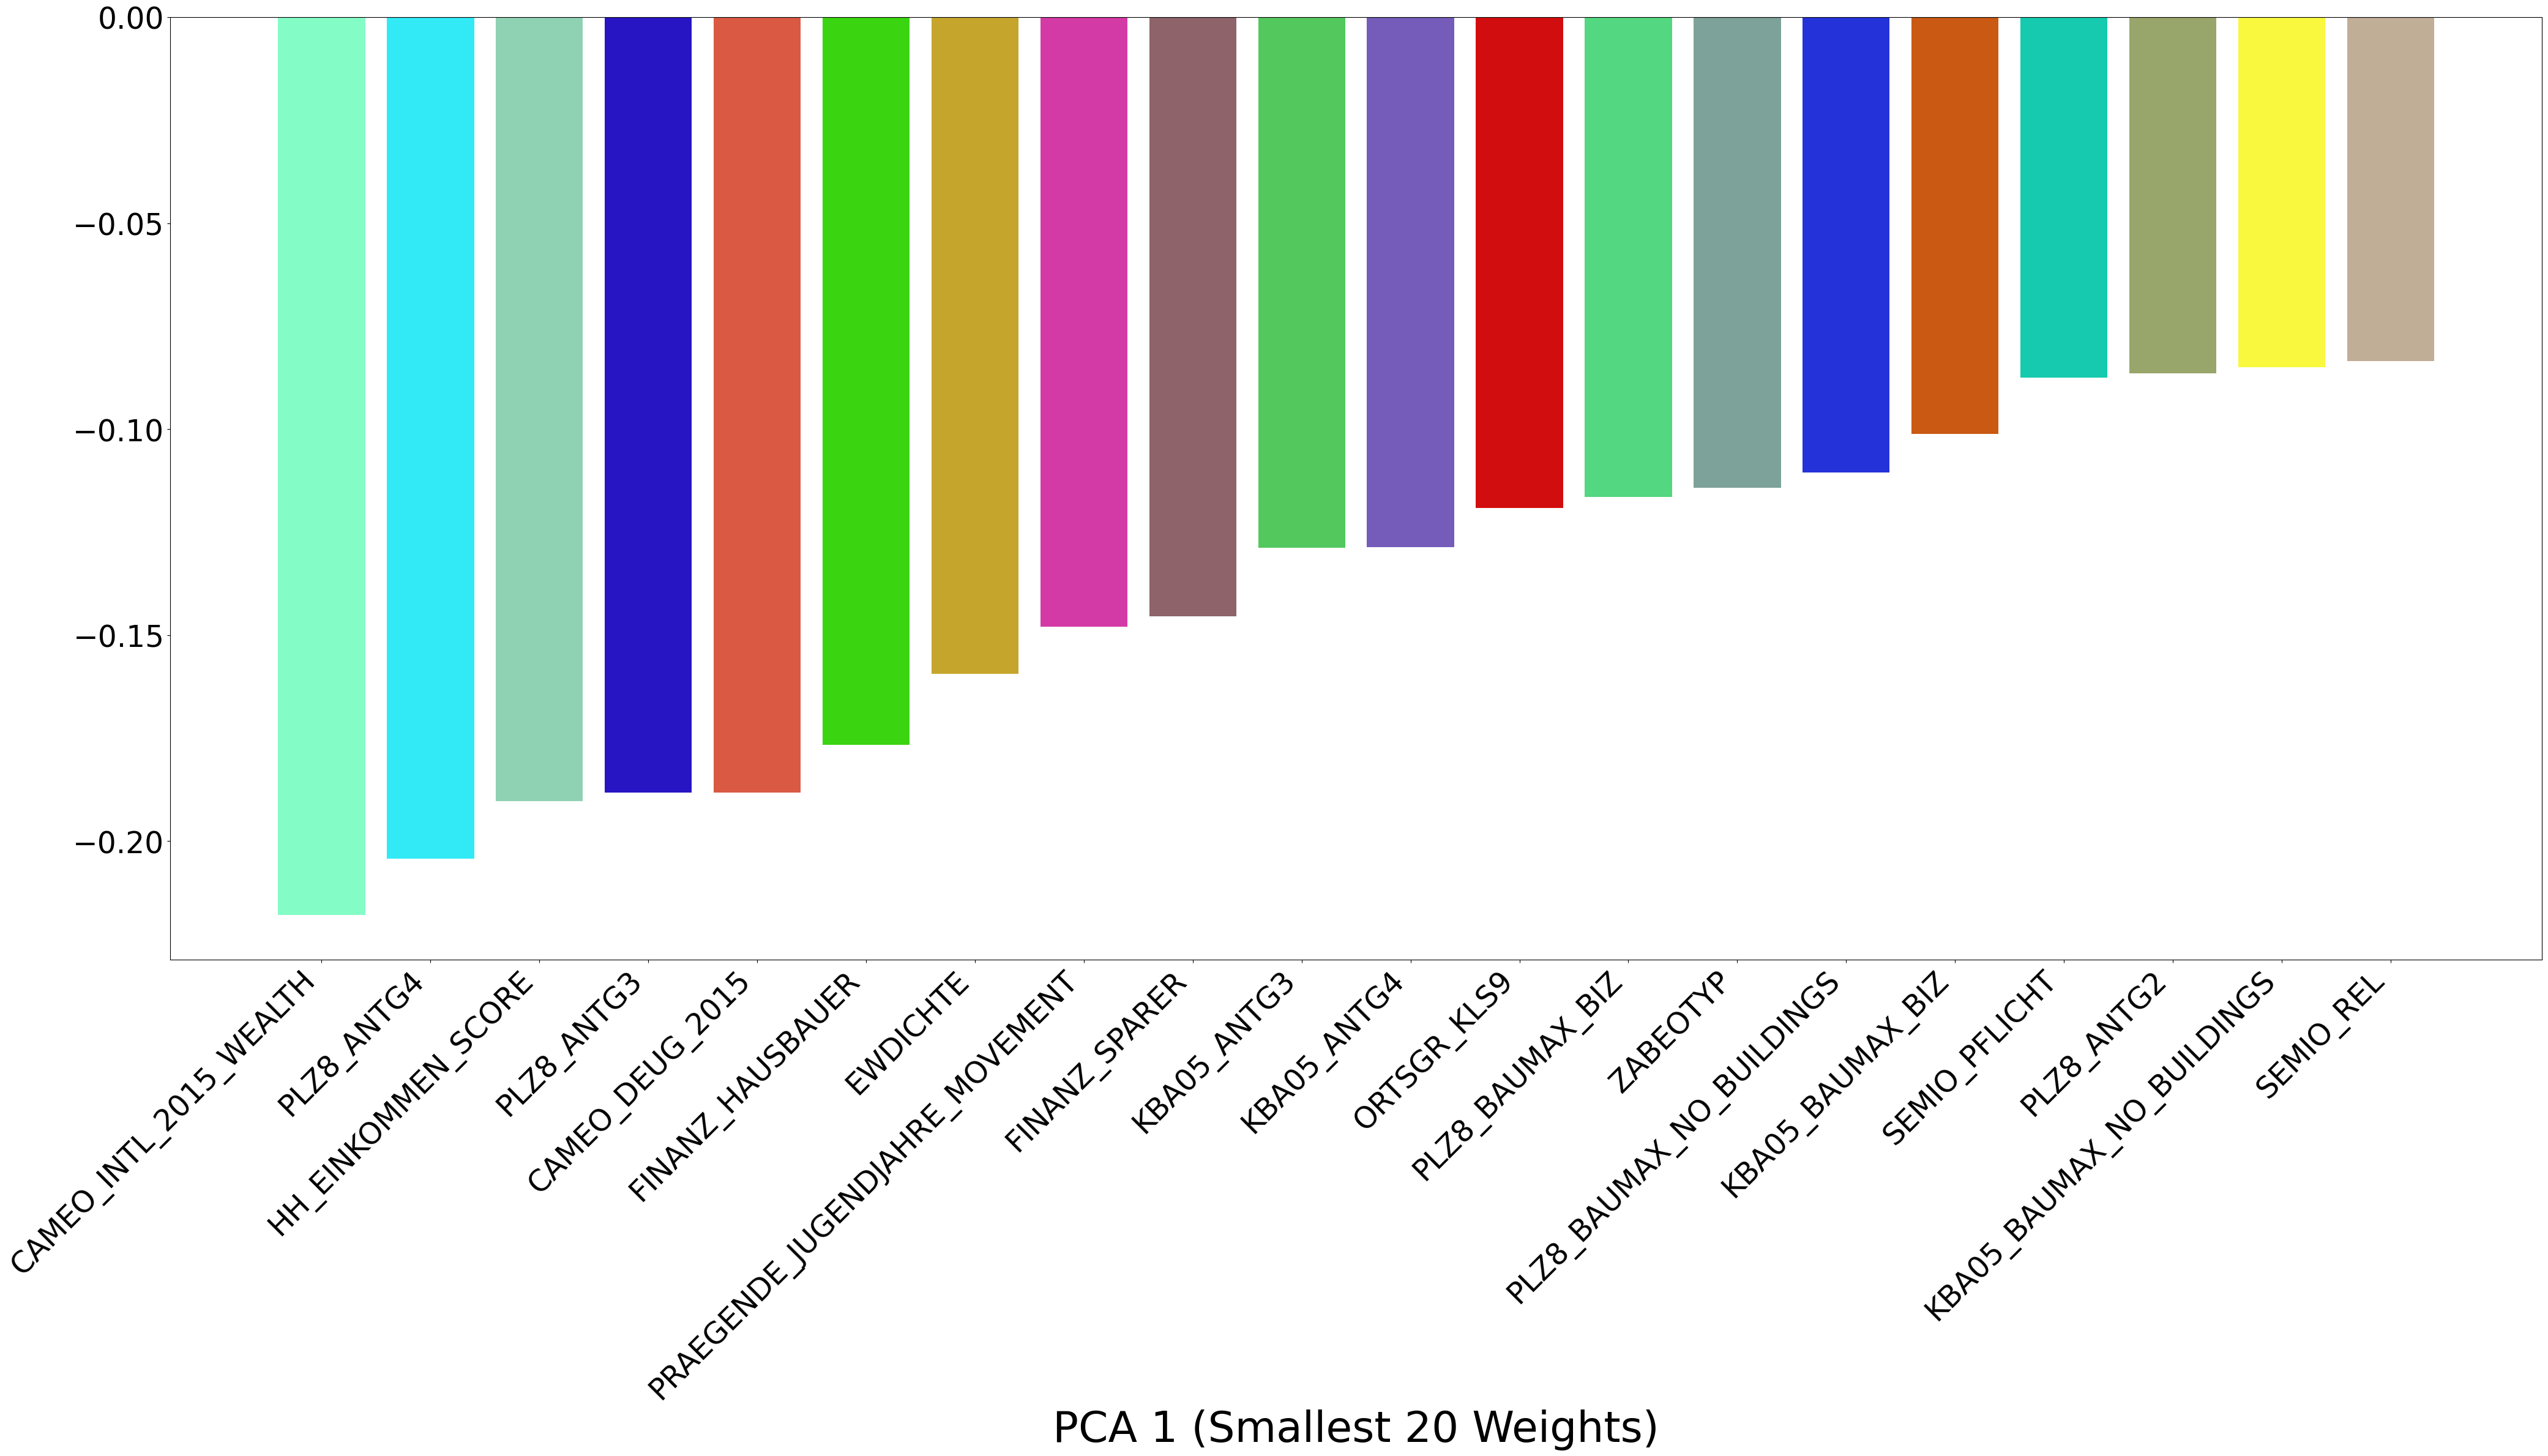

In [47]:
#=> Smallest 20 Weights for PCA 1
get_sorted_weights(1,20,False)

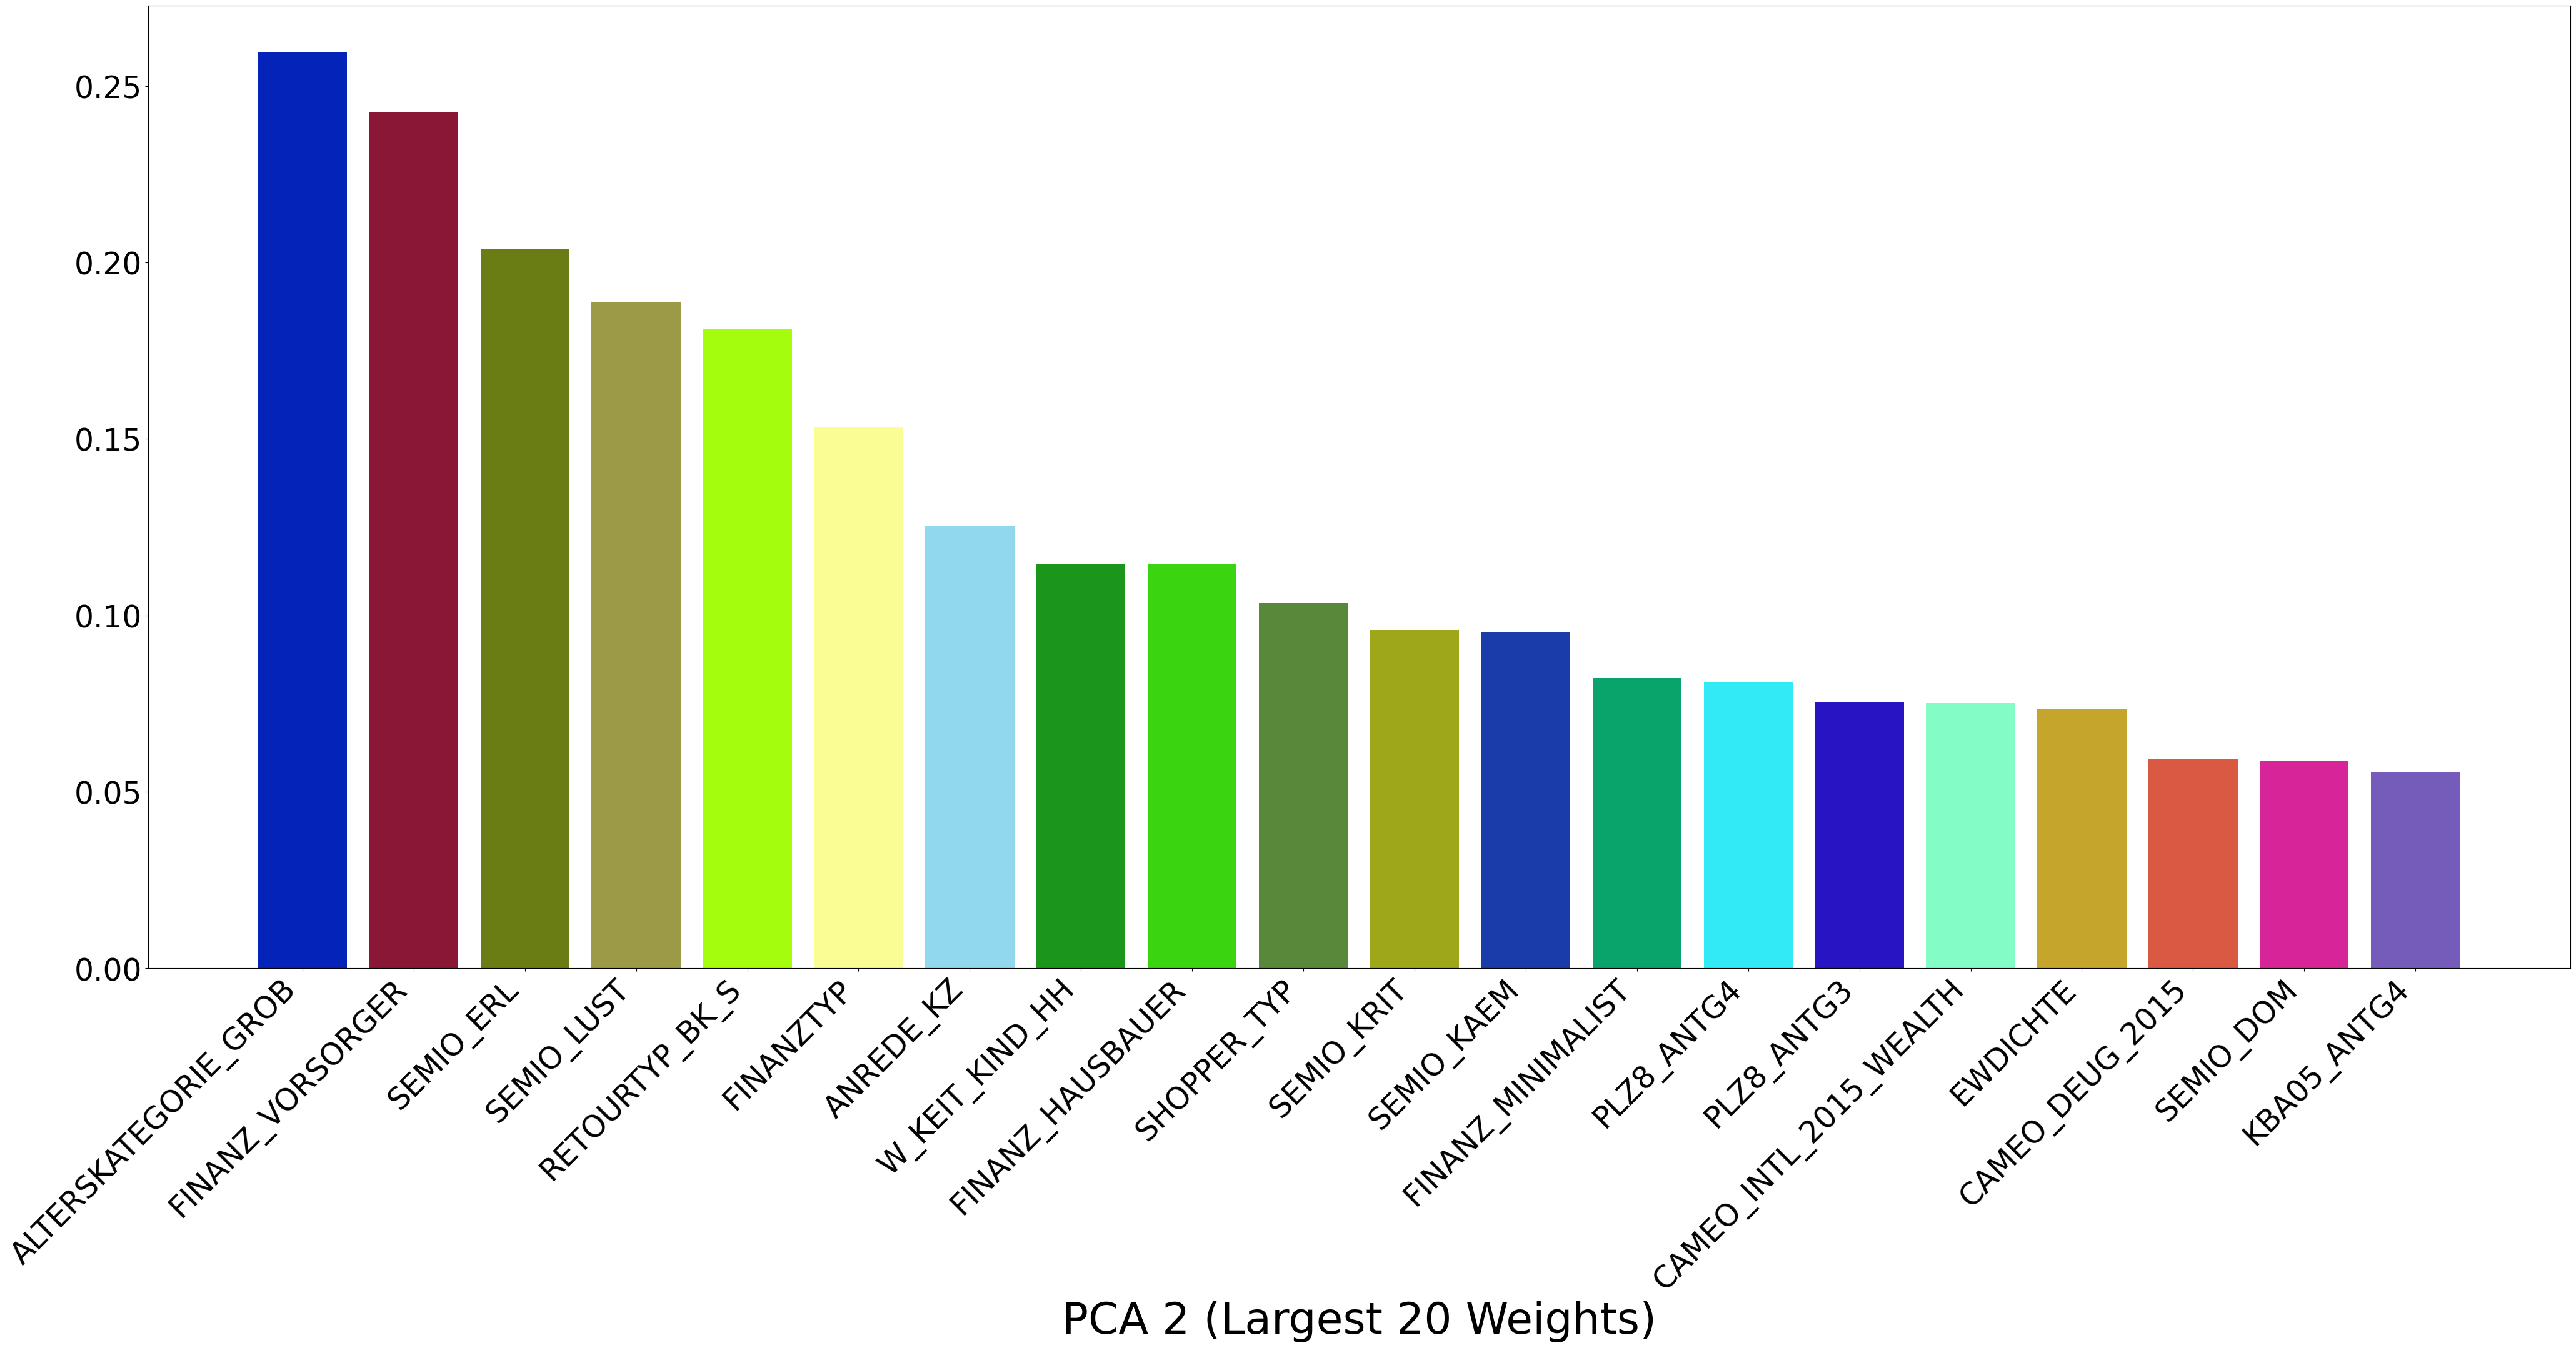

In [48]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
#=> Largest 20 Weights for PCA 2
get_sorted_weights(2,20,True)

**Comment:** PCA 2 targets age and their attitudes/behaviour (like whether they are critical or if they are sensual-minded) and some of their finacial happits like if they prepared to take risk

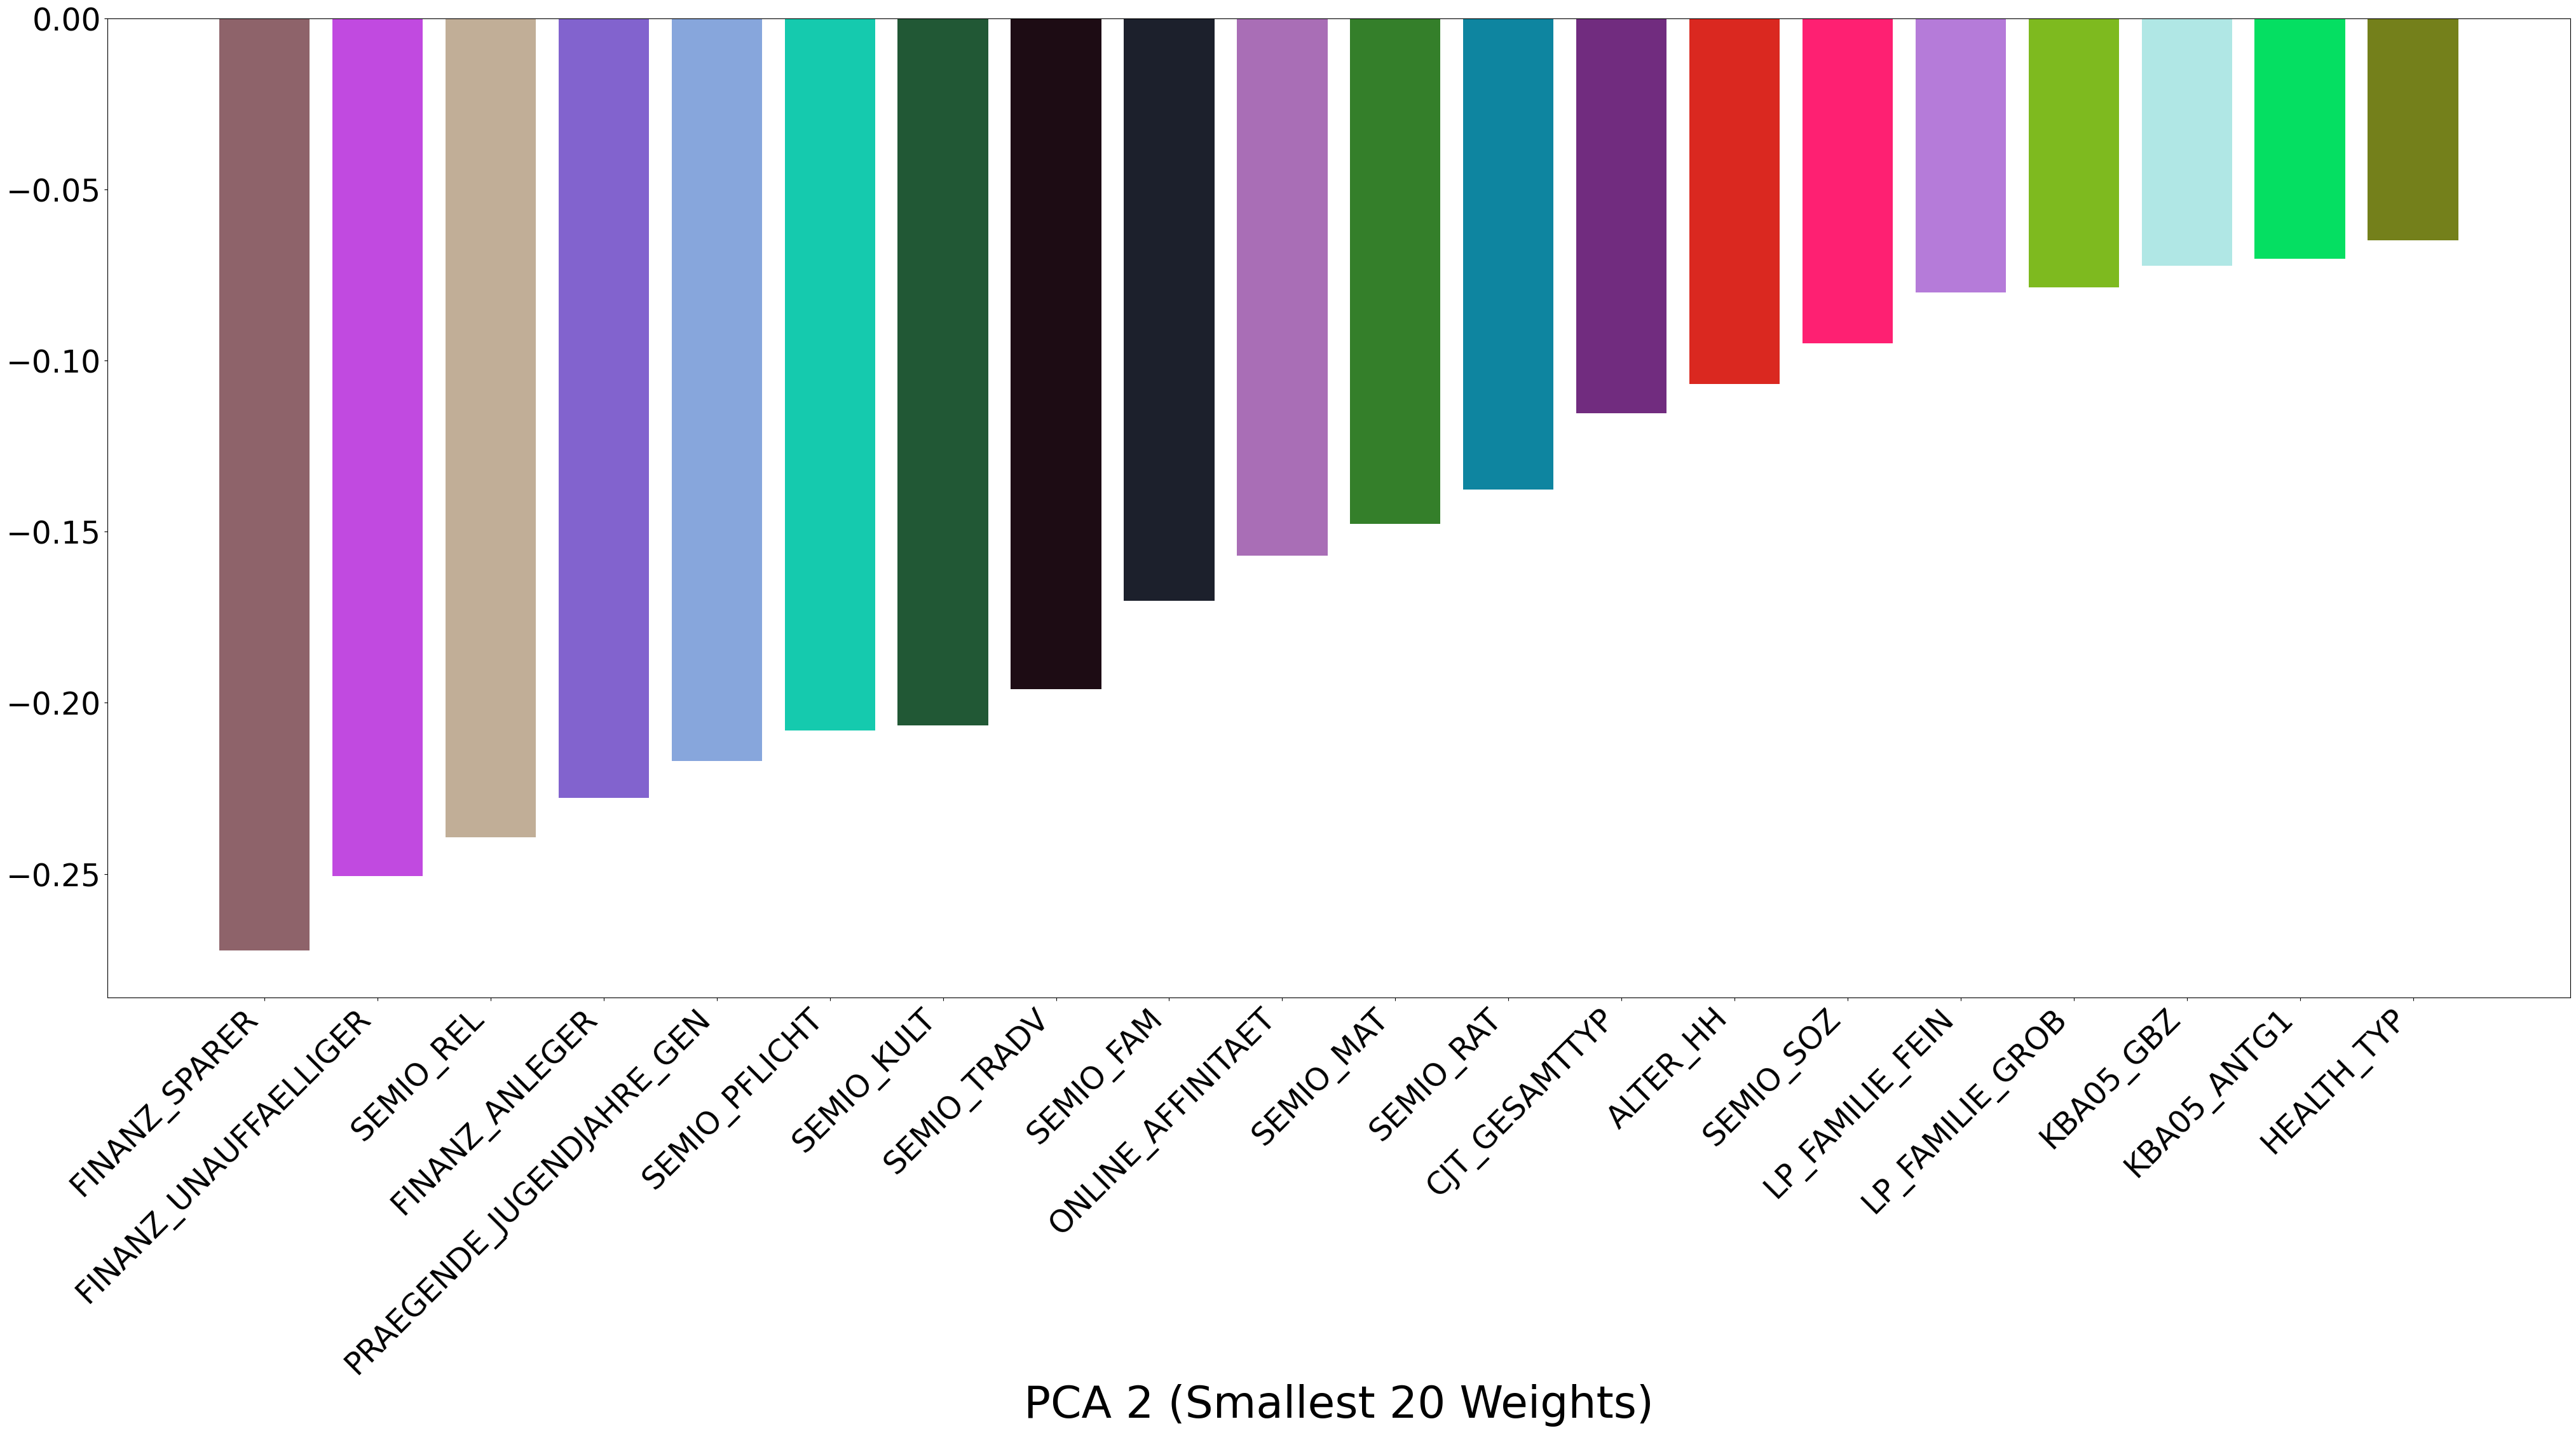

In [49]:
#=> Largest 20 Weights for PCA 2
get_sorted_weights(2,20,False)

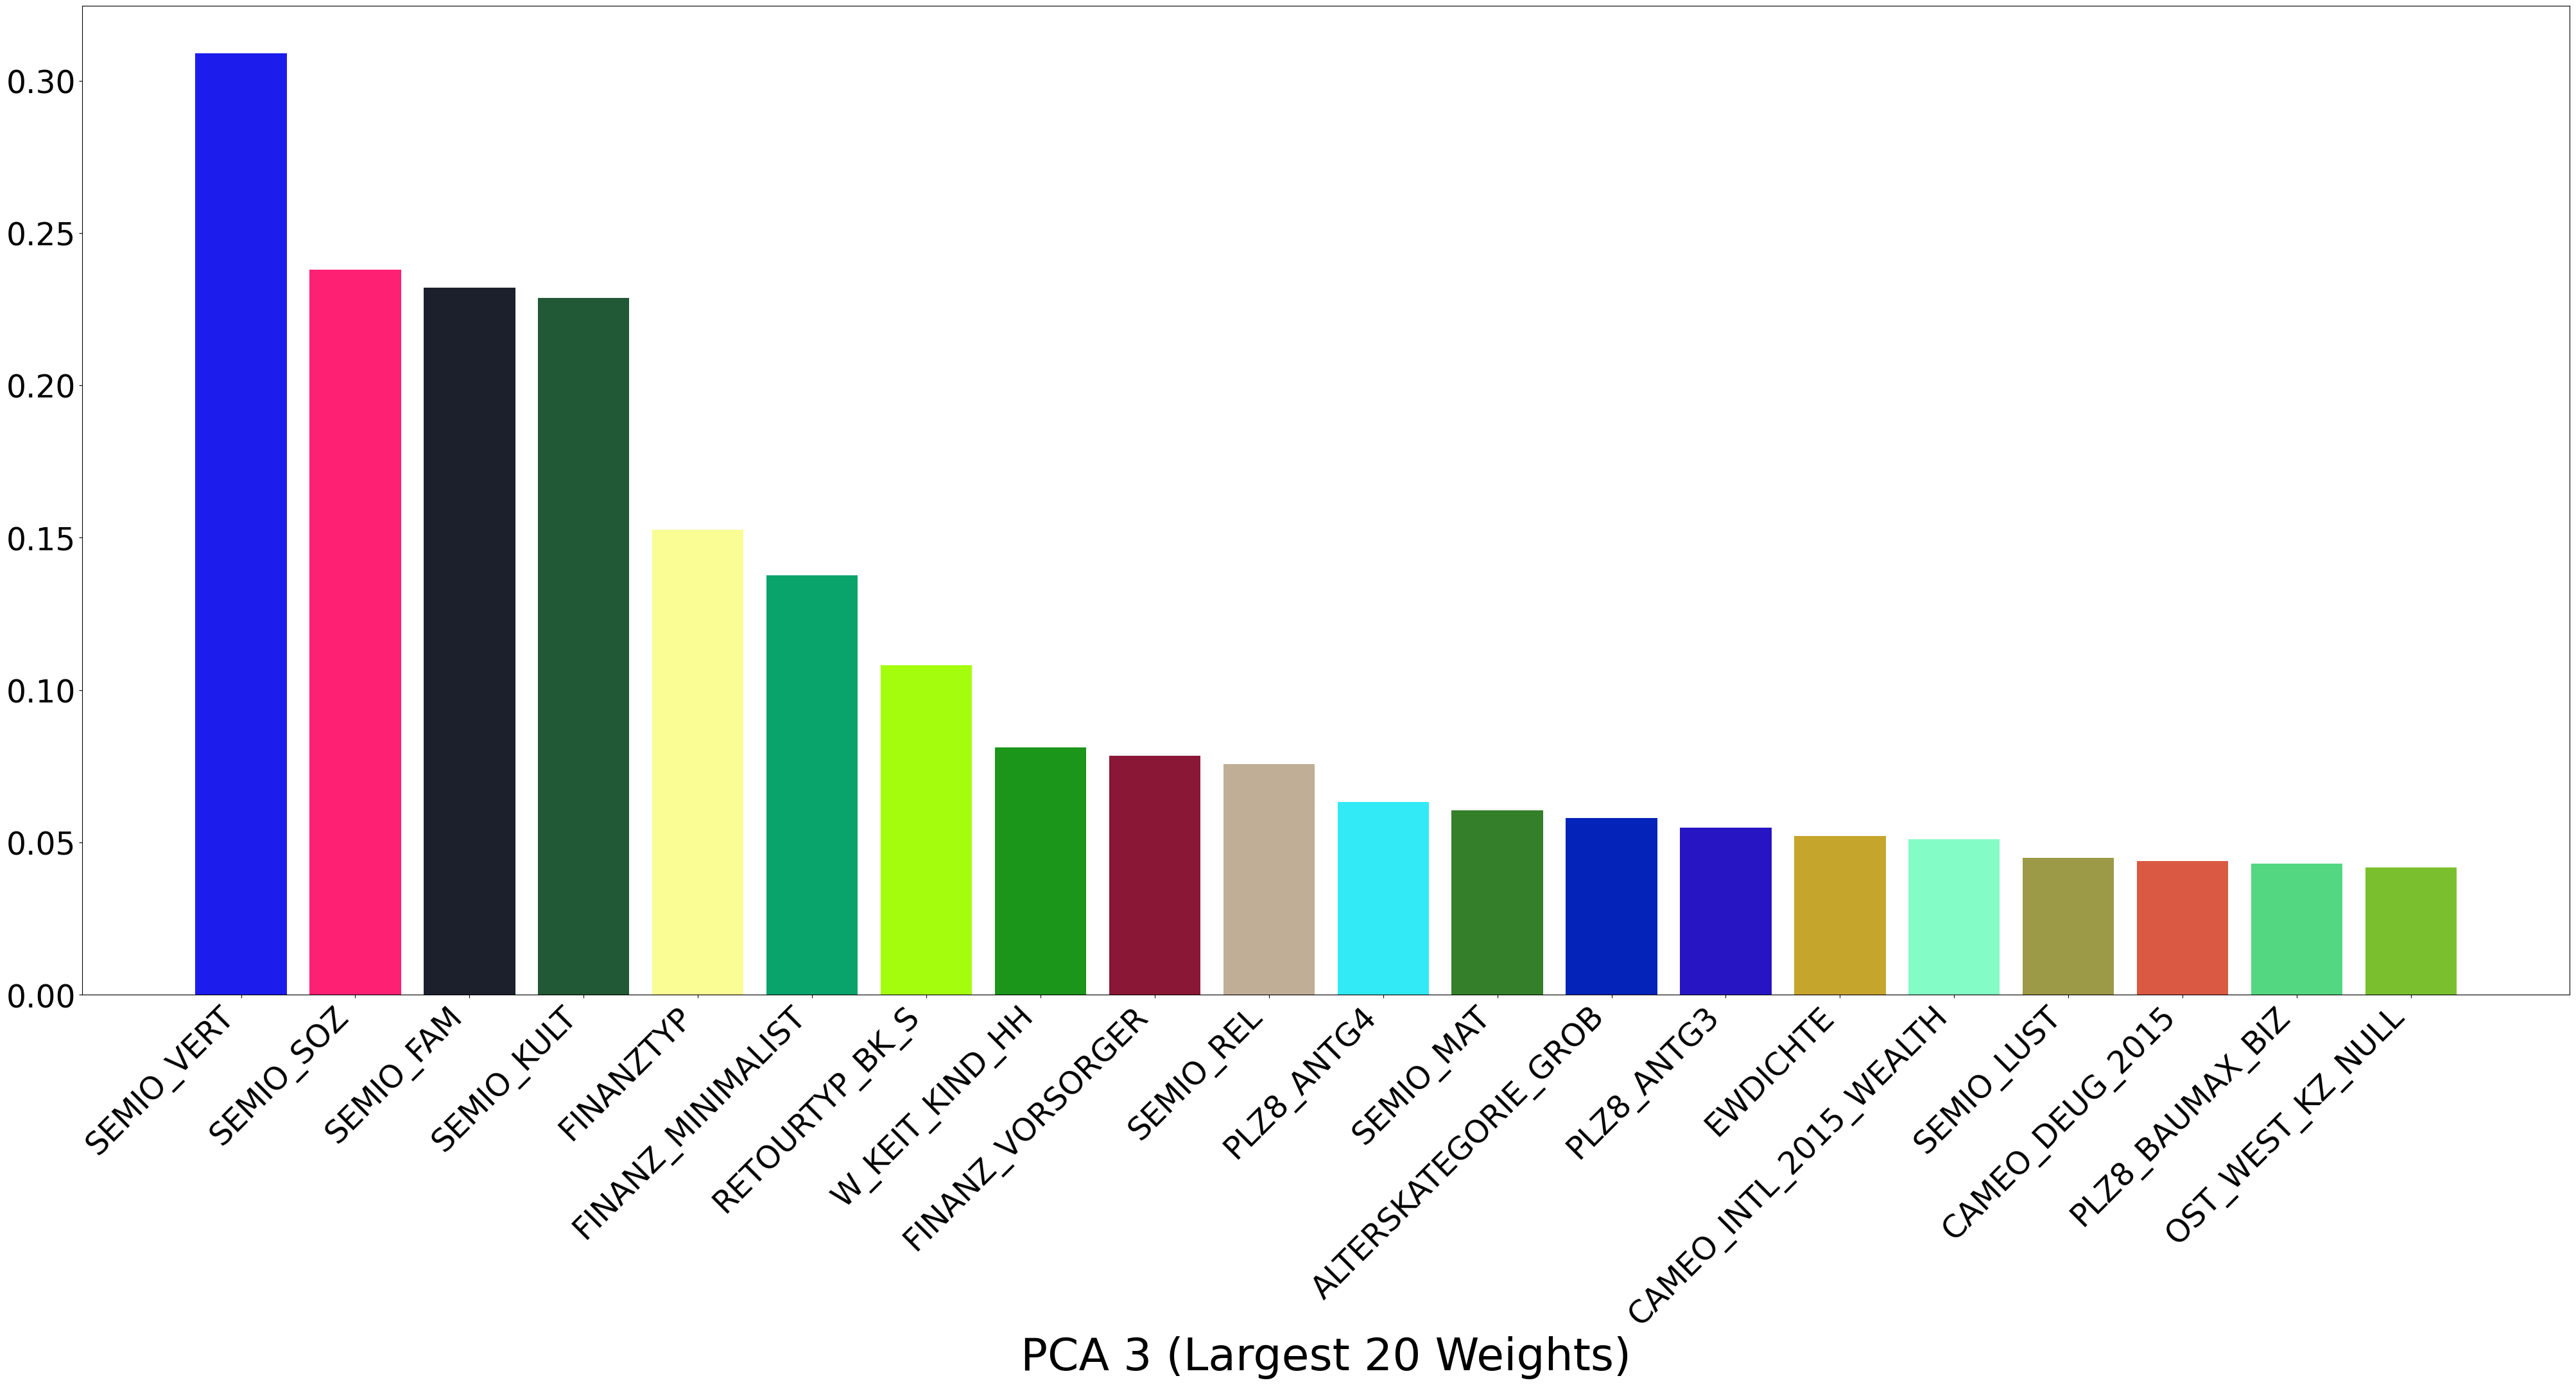

In [50]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
#=> Largest 20 Weights for PCA 3
get_sorted_weights(3,20,True)

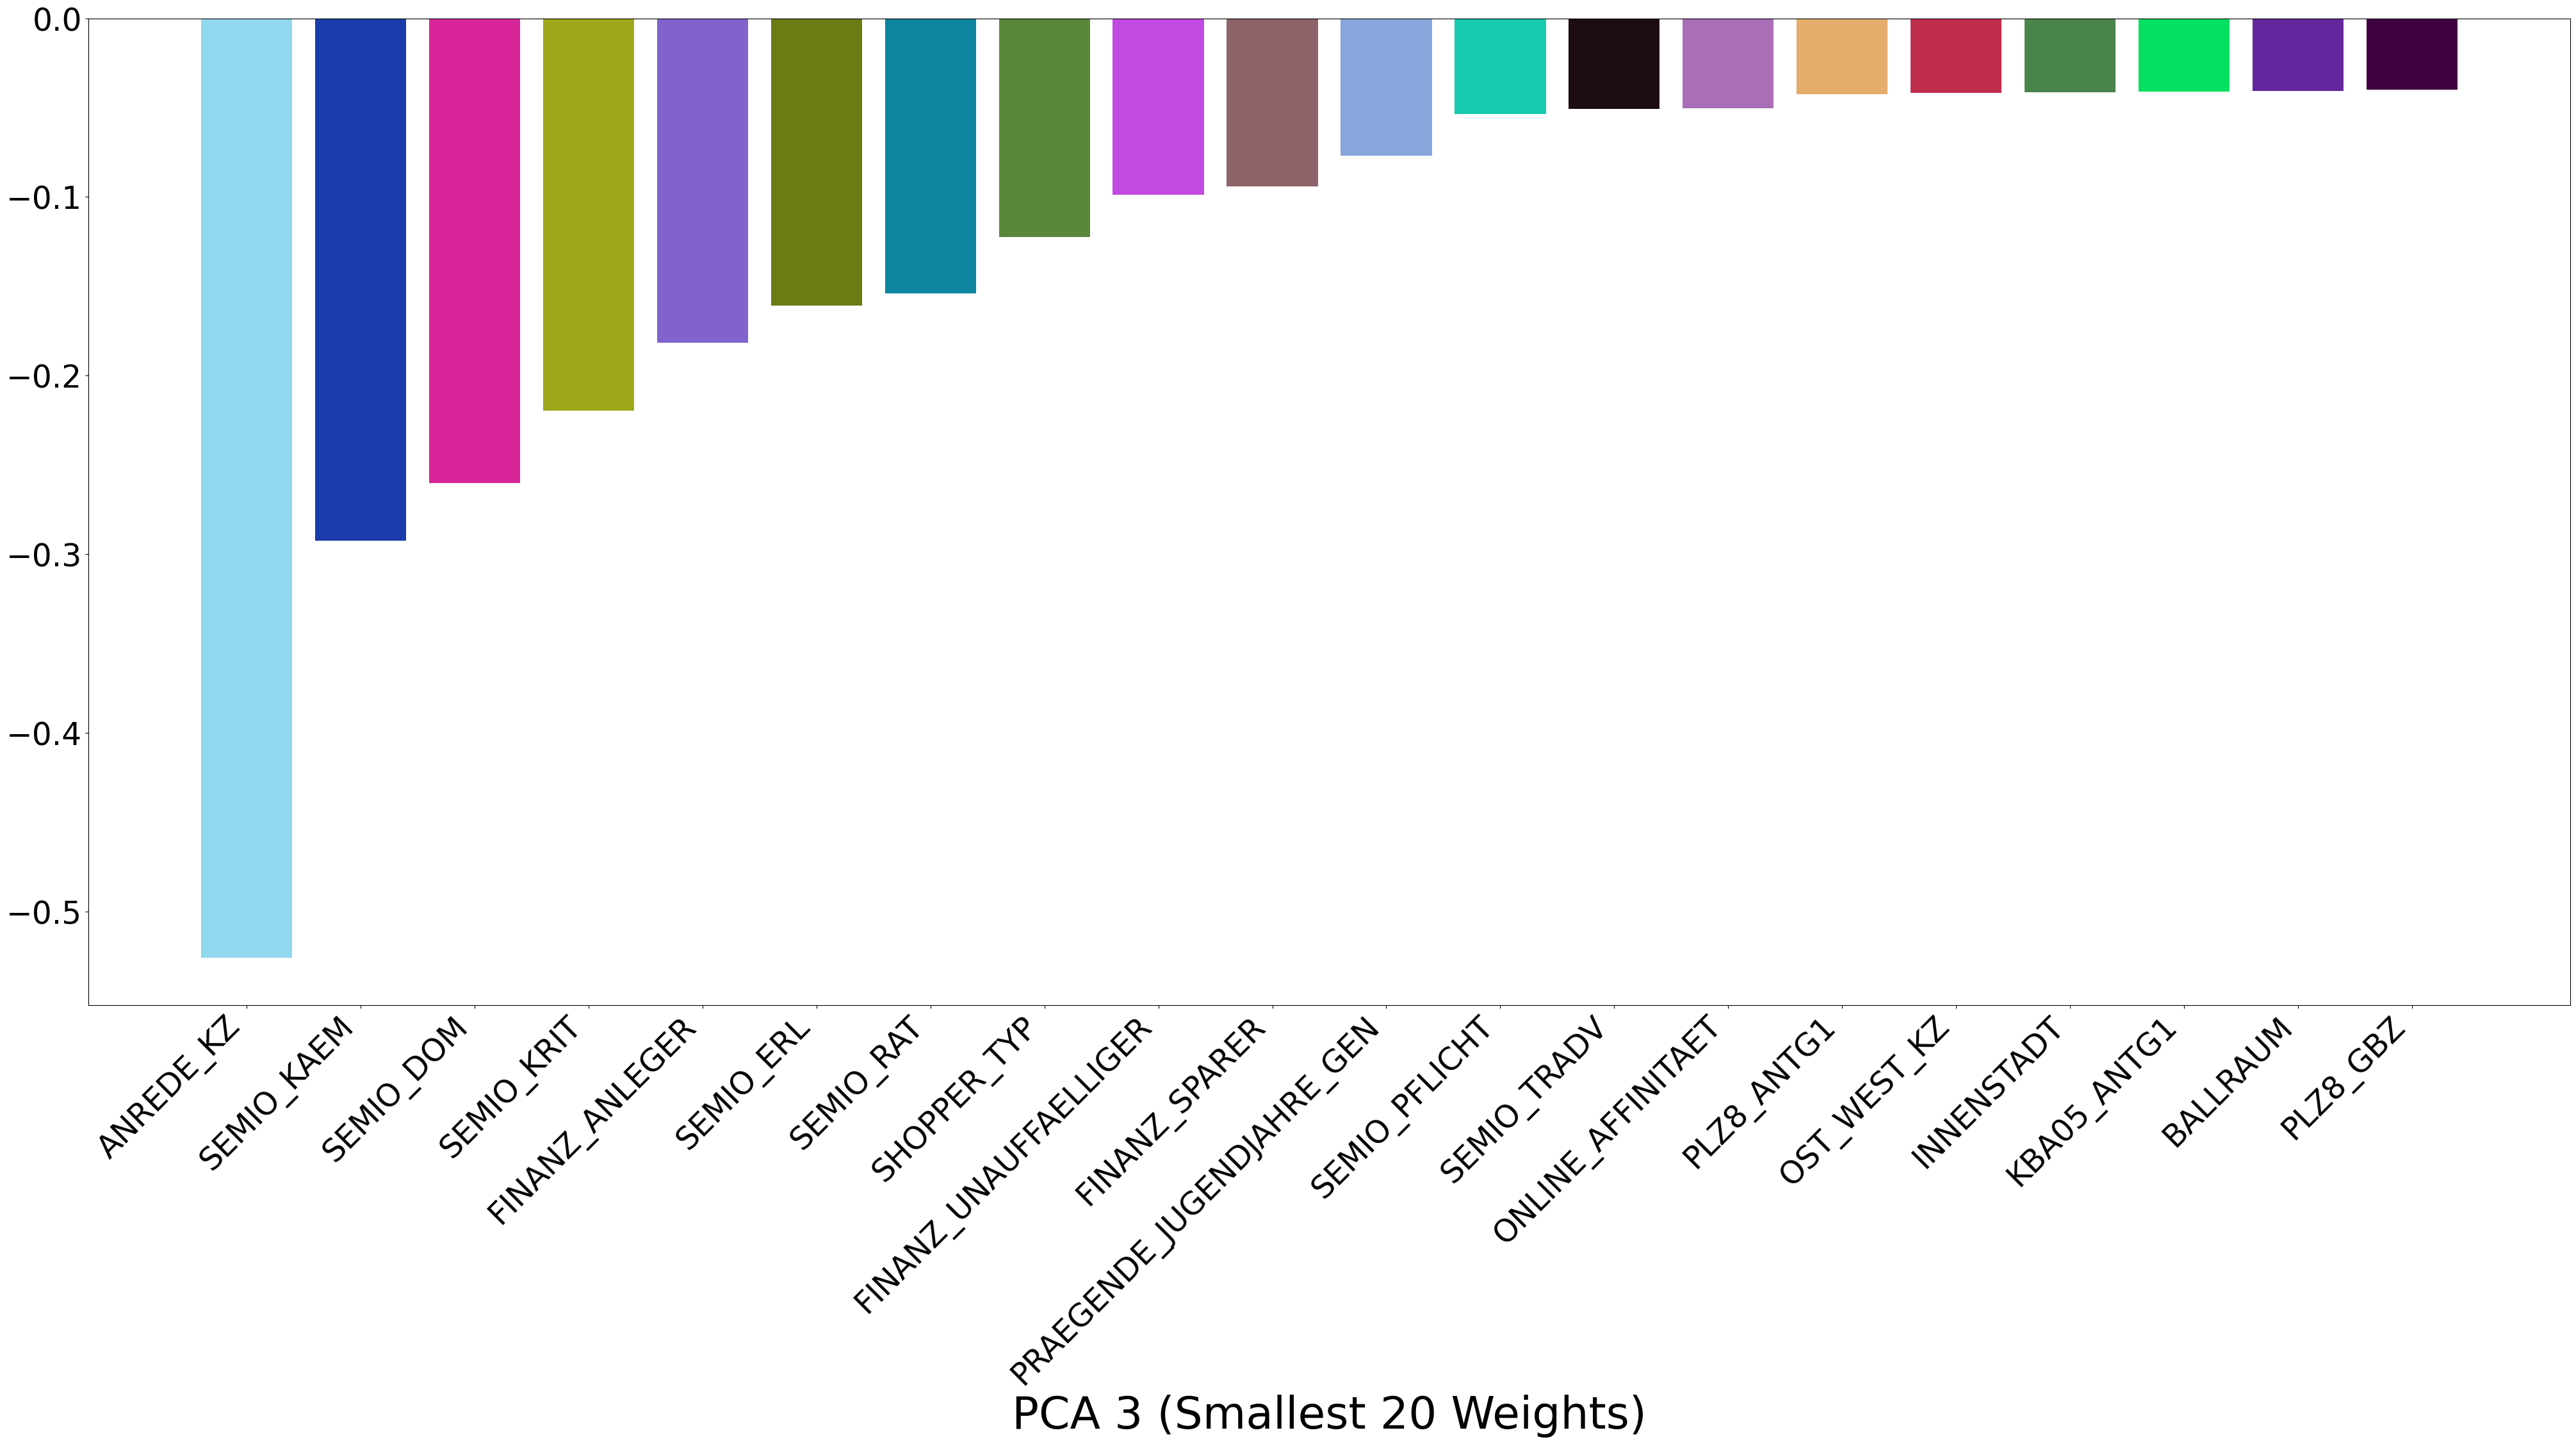

In [51]:
#=> Smallest 20 Weights for PCA 3
get_sorted_weights(3,20, False)

### Discussion 2.3: Interpret Principal Components
I can notice that weights are different for different PCAs (different eigen vectors) which is a good thing since it means each eigen vector targets a differenal set of original features so that all the eigen vectors do a good job of describing the variance in the original dataset. (I included interpretions in seprate comments)

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def gen_elbow_plot(n, data_source, use_sample, sample_p = 0.1):  
    np.random.seed(1)
    scores = []
    # Over a number of different cluster counts...
    data_size = data_source.shape[0]
    sampled_indices = np.ceil(np.random.sample(math.ceil(sample_p*data_size))*(data_size-1)).astype(np.int64)
    if use_sample == True:     
        data_source = data_source[sampled_indices]
 
    for n in range(2,n+1):
        # run k-means clustering on the data and...
        kmeans_obj = KMeans(n_clusters = n, n_init = 3)
        kmeans_obj.fit(data_source)
        # compute the average within-cluster distances.
        #silhouette_avg = silhouette_score(X = data_source, labels = kmeans_obj.labels_)
        #print(-kmeans_obj.score(azdias_few_nulls_pca_x))
        scores.append(-kmeans_obj.score(data_source))
        print(f'Finished KMeans with K = {n}')
    fig = plt.figure(figsize=(20,10))
    plt.plot(range(2,n+1), scores)
    plt.xlabel("K Clusters")
    plt.ylabel("Average Distance From Centeriods")


Finished KMeans with K = 2
Finished KMeans with K = 3
Finished KMeans with K = 4
Finished KMeans with K = 5
Finished KMeans with K = 6
Finished KMeans with K = 7
Finished KMeans with K = 8
Finished KMeans with K = 9
Finished KMeans with K = 10
Finished KMeans with K = 11
Finished KMeans with K = 12
Finished KMeans with K = 13
Finished KMeans with K = 14
Finished KMeans with K = 15


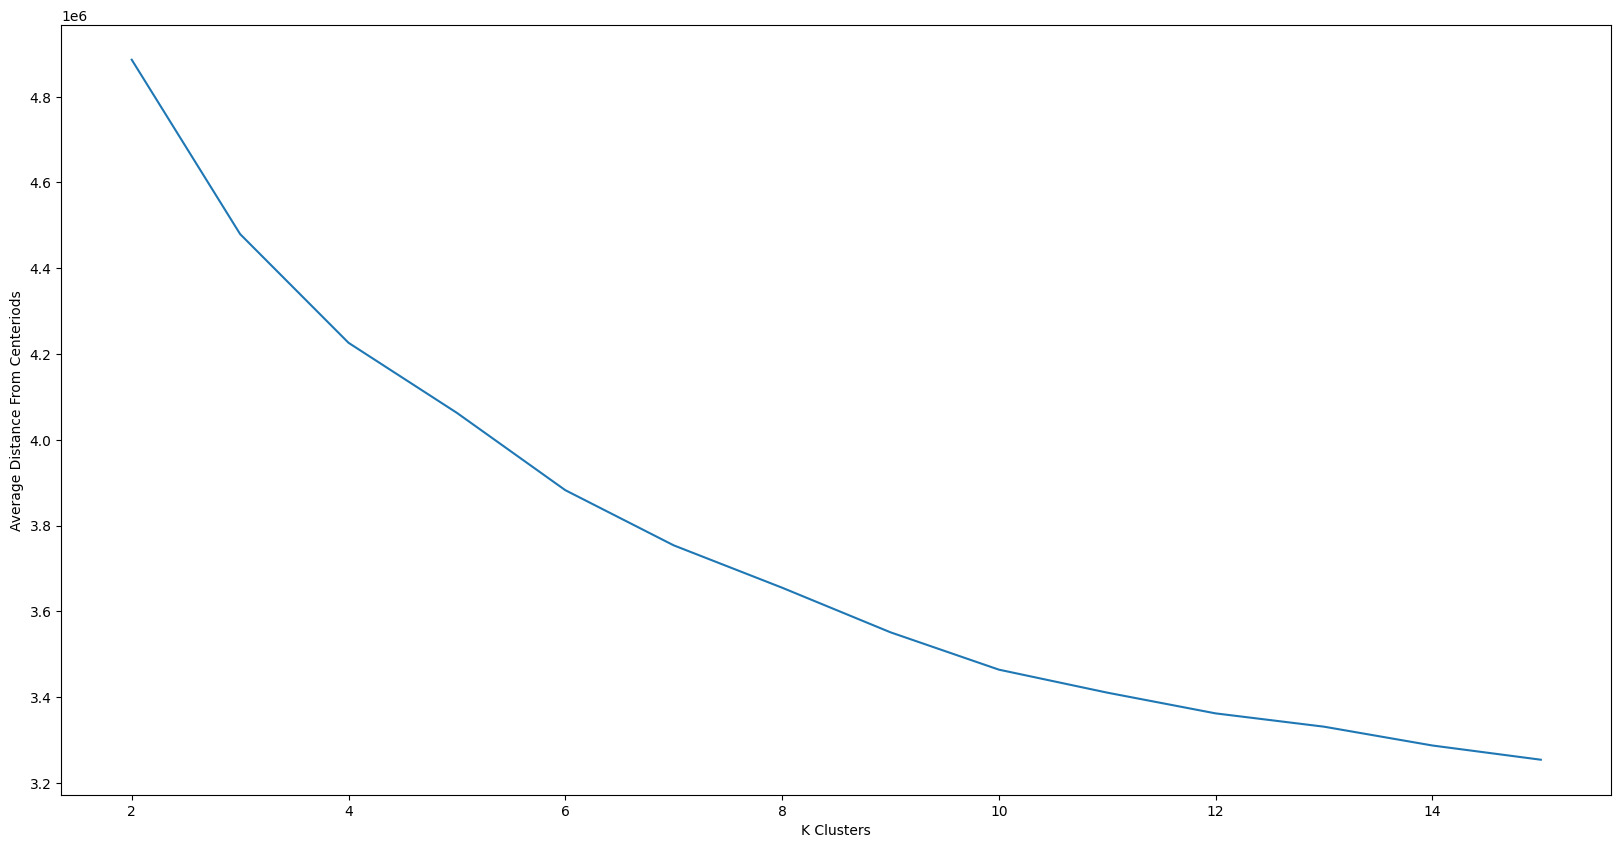

In [53]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

# For general pipulaton with few nulls
gen_elbow_plot(15,azdias_few_nulls_pca_x,use_sample = False)

In [54]:
kmeans_obj_few_nulls_k6 = KMeans(n_clusters = 6, verbose = 1, n_init = 15)
kmeans_obj_few_nulls_k6.fit(azdias_few_nulls_pca_x)

Initialization complete
Iteration 0, inertia 6834411.863869319.
Iteration 1, inertia 4209601.6671335455.
Iteration 2, inertia 4112714.2950359574.
Iteration 3, inertia 4065617.772429258.
Iteration 4, inertia 4027225.475893082.
Iteration 5, inertia 3988646.6269714176.
Iteration 6, inertia 3949757.2362415586.
Iteration 7, inertia 3933734.4645658.
Iteration 8, inertia 3928094.8321375865.
Iteration 9, inertia 3925144.1912548873.
Iteration 10, inertia 3923048.437777585.
Iteration 11, inertia 3921189.9631150137.
Iteration 12, inertia 3919411.1198086184.
Iteration 13, inertia 3917824.41236204.
Iteration 14, inertia 3916434.881848218.
Iteration 15, inertia 3915243.8238950195.
Iteration 16, inertia 3914203.2559614084.
Iteration 17, inertia 3913243.6994587746.
Iteration 18, inertia 3912407.8115620324.
Iteration 19, inertia 3911682.671857087.
Iteration 20, inertia 3911080.601592728.
Iteration 21, inertia 3910602.8772760453.
Iteration 22, inertia 3910211.6948569496.
Iteration 23, inertia 3909900.57

Iteration 19, inertia 3890689.686081337.
Iteration 20, inertia 3890664.108437403.
Iteration 21, inertia 3890646.596607107.
Iteration 22, inertia 3890634.2595364964.
Iteration 23, inertia 3890625.294283428.
Iteration 24, inertia 3890618.470683359.
Converged at iteration 24: center shift 2.125703651946309e-05 within tolerance 2.4064599076139453e-05.
Initialization complete
Iteration 0, inertia 6676295.006218022.
Iteration 1, inertia 4227063.758401031.
Iteration 2, inertia 4043523.442048725.
Iteration 3, inertia 3963163.9849317046.
Iteration 4, inertia 3940209.0810175976.
Iteration 5, inertia 3935300.865068034.
Iteration 6, inertia 3932599.8234908525.
Iteration 7, inertia 3930601.935636214.
Iteration 8, inertia 3928890.052943203.
Iteration 9, inertia 3927334.289858366.
Iteration 10, inertia 3925861.243695728.
Iteration 11, inertia 3924350.4111469733.
Iteration 12, inertia 3922792.820629846.
Iteration 13, inertia 3921196.479714285.
Iteration 14, inertia 3919573.9018808086.
Iteration 15, in

Iteration 63, inertia 3912281.9228075747.
Iteration 64, inertia 3912169.9212370864.
Iteration 65, inertia 3911995.8480570544.
Iteration 66, inertia 3911725.2880394454.
Iteration 67, inertia 3911261.68873591.
Iteration 68, inertia 3910401.3849541536.
Iteration 69, inertia 3908647.227791487.
Iteration 70, inertia 3904961.207695084.
Iteration 71, inertia 3898610.2334153317.
Iteration 72, inertia 3893770.1064322786.
Iteration 73, inertia 3892207.2376380116.
Iteration 74, inertia 3891499.4631881644.
Iteration 75, inertia 3891108.704676705.
Iteration 76, inertia 3890842.0330328844.
Iteration 77, inertia 3890622.530627806.
Iteration 78, inertia 3890404.8203028487.
Iteration 79, inertia 3890170.655671381.
Iteration 80, inertia 3889895.089693642.
Iteration 81, inertia 3889557.504193425.
Iteration 82, inertia 3889150.236104248.
Iteration 83, inertia 3888663.3650766867.
Iteration 84, inertia 3888115.0970090656.
Iteration 85, inertia 3887495.977025834.
Iteration 86, inertia 3886821.986741597.
Iter

Initialization complete
Iteration 0, inertia 6536612.521208237.
Iteration 1, inertia 4128196.1375775817.
Iteration 2, inertia 3989652.572400612.
Iteration 3, inertia 3946709.648789188.
Iteration 4, inertia 3919374.931933547.
Iteration 5, inertia 3907434.1758919596.
Iteration 6, inertia 3903004.533641693.
Iteration 7, inertia 3901220.9129497525.
Iteration 8, inertia 3900451.433525128.
Iteration 9, inertia 3900056.8167801998.
Iteration 10, inertia 3899795.567223447.
Iteration 11, inertia 3899595.1192021547.
Iteration 12, inertia 3899406.1571530458.
Iteration 13, inertia 3899219.2884102035.
Iteration 14, inertia 3899048.589520097.
Iteration 15, inertia 3898893.4034738215.
Iteration 16, inertia 3898761.5099561852.
Iteration 17, inertia 3898654.6433139266.
Iteration 18, inertia 3898566.5683558104.
Iteration 19, inertia 3898498.5213193493.
Iteration 20, inertia 3898443.6044534296.
Iteration 21, inertia 3898399.8850612952.
Iteration 22, inertia 3898366.742862028.
Iteration 23, inertia 3898342

KMeans(n_clusters=6, n_init=15, verbose=1)

In [185]:
# Will be used again later
def plot_first_two_pca(data,predictions,p=0.01,use_sample = True):
    data_size = data.shape[0]
    sampled_indices = np.ceil(np.random.sample(math.ceil(p*data_size))*(data_size-1)).astype(np.int64)
    fig = plt.figure(figsize=(5,3))
    if use_sample:
        sns.scatterplot(x=data[sampled_indices, 0],y=data[sampled_indices, 1],hue = predictions[sampled_indices] + 1,palette="bright")
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
    else:
        sns.scatterplot(x=data[:, 0],y=data[:, 1],hue = predictions + 1,palette="bright")
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
    plt.legend(loc = "upper right")

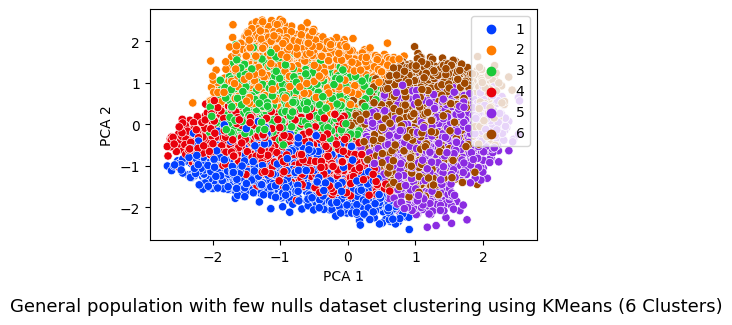

In [186]:
# Plotting first two PCA's (clustered) for general pop with few nulls.
# Looks so messed up!
plot_first_two_pca(azdias_few_nulls_pca_x,kmeans_obj_few_nulls_k6.labels_,0.01)
plt.text(x = -5, y = -4.5 , s = "General population with few nulls dataset clustering using KMeans (6 Clusters)", fontsize = 13)
plt.show()

C:\Users\AmirWG\AppData\Local\Temp\ipykernel_6232\1148210629.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


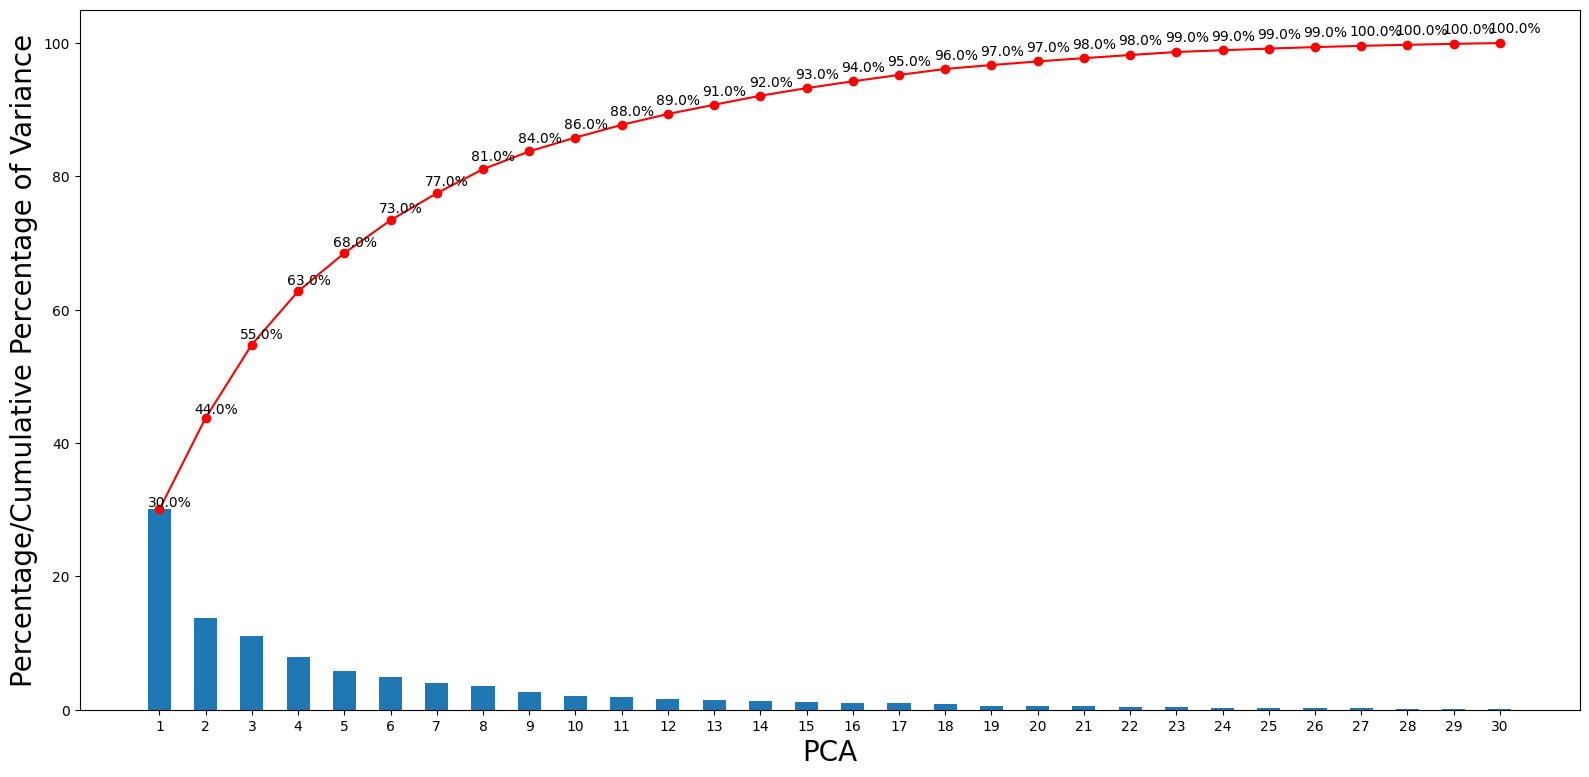

In [57]:
azdias_many_nulls_pca, azdias_many_nulls_pca_x = do_pca_and_plot(30, azdias_many_nulls)

In [58]:
kmeans_obj_many_nulls = KMeans(n_clusters = 6, verbose = 1, n_init = 15)
kmeans_obj_many_nulls.fit(azdias_many_nulls_pca_x)

Initialization complete
Iteration 0, inertia 168089.75900515617.
Iteration 1, inertia 108937.00978856259.
Iteration 2, inertia 99427.45906083619.
Iteration 3, inertia 95744.87430770698.
Iteration 4, inertia 94877.41641279054.
Iteration 5, inertia 94693.25471230074.
Iteration 6, inertia 94678.58124745532.
Iteration 7, inertia 94676.71753097443.
Iteration 8, inertia 94676.4269301157.
Iteration 9, inertia 94676.32224875243.
Iteration 10, inertia 94676.24375531859.
Converged at iteration 10: center shift 4.9148451089415174e-06 within tolerance 7.67693175335455e-06.
Initialization complete
Iteration 0, inertia 147828.6841008248.
Iteration 1, inertia 98866.47281228934.
Iteration 2, inertia 97996.9165296492.
Iteration 3, inertia 97307.55216500323.
Iteration 4, inertia 96310.66146026283.
Iteration 5, inertia 96001.64537942104.
Iteration 6, inertia 95963.58463843176.
Iteration 7, inertia 95959.4805733206.
Iteration 8, inertia 95959.17107993965.
Converged at iteration 8: center shift 2.369007053

KMeans(n_clusters=6, n_init=15, verbose=1)

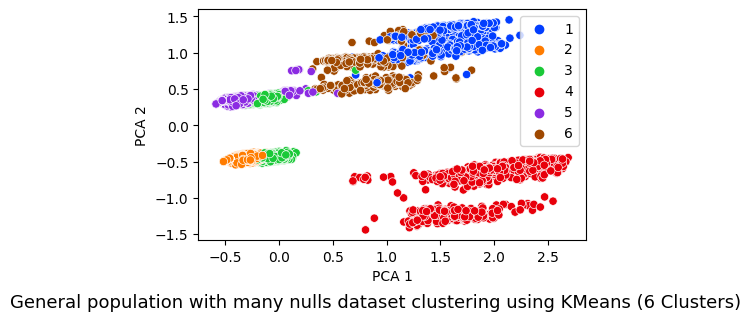

In [187]:
# Plotting first two PCA's (clustered) for general pop with many nulls.
plot_first_two_pca(azdias_many_nulls_pca_x,kmeans_obj_many_nulls.labels_,0.1)
plt.text(x = -2.5, y = -2.5 , s = "General population with many nulls dataset clustering using KMeans (6 Clusters)", fontsize = 13)
plt.show()

**Comment:** It's clear that clusters for general populaion with **many nulls** and **few nulls** are **quantitatively different**

### Let's try to improve clustering for both few and many nulls dataset of the general population

In [60]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
#data = azdias_few_nulls_pca_x[np.ceil(np.random.sample(200000)*(azdias_few_nulls_pca_x.shape[0] -1) ).astype(np.int64)]

#=> We saw how Kmeans clustering with K = 6 did not make any sense visually so let's try K = 3
kmeans_obj_few_nulls_k3 = KMeans(n_clusters = 3, verbose = 1, n_init = 10)
kmeans_obj_few_nulls_k3.fit(azdias_few_nulls_pca_x)

Initialization complete
Iteration 0, inertia 7761111.692033476.
Iteration 1, inertia 4622962.765578244.
Iteration 2, inertia 4563061.820923872.
Iteration 3, inertia 4543819.953611103.
Iteration 4, inertia 4536024.976264106.
Iteration 5, inertia 4532365.495392067.
Iteration 6, inertia 4530092.564100398.
Iteration 7, inertia 4528177.473596053.
Iteration 8, inertia 4526155.1011581225.
Iteration 9, inertia 4523803.129049963.
Iteration 10, inertia 4520825.2517956905.
Iteration 11, inertia 4516810.562364813.
Iteration 12, inertia 4511130.978208851.
Iteration 13, inertia 4503873.990291493.
Iteration 14, inertia 4496481.106619737.
Iteration 15, inertia 4490349.835736486.
Iteration 16, inertia 4485887.345410776.
Iteration 17, inertia 4483076.425689723.
Iteration 18, inertia 4481468.831997675.
Iteration 19, inertia 4480586.336448768.
Iteration 20, inertia 4480098.23451537.
Iteration 21, inertia 4479831.864215478.
Iteration 22, inertia 4479687.185920645.
Iteration 23, inertia 4479612.741315172.
I

KMeans(n_clusters=3, verbose=1)

Text(-5, -4.5, 'General population with few nulls dataset clustering using KMeans (3 Clusters)')

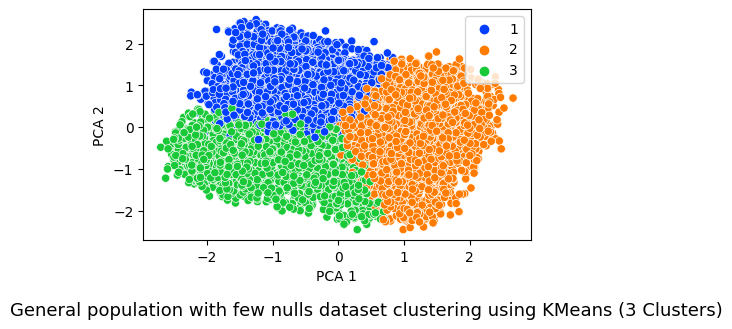

In [188]:
# Plotting first two PCA's (clustered) for general pop with few nulls.
plot_first_two_pca(azdias_few_nulls_pca_x,kmeans_obj_few_nulls_k3.labels_,0.01)
plt.text(x = -5, y = -4.5 , s = "General population with few nulls dataset clustering using KMeans (3 Clusters)", fontsize = 13)

**Comment:** That's an improvement over previous model.

Text(-3.5, -4.5, 'General population with few nulls with no clusters')

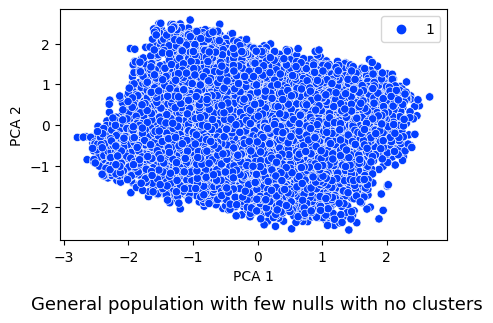

In [189]:
# Plotting first two PCA's (clustered) for general pop with few nulls.
plot_first_two_pca(azdias_few_nulls_pca_x,np.array([0]*len(azdias_few_nulls_pca_x)),0.01)
plt.text(x = -3.5, y = -4.5 , s = "General population with few nulls with no clusters", fontsize = 13)

**Comment:** We can notice that general population with few nulls dataset has no clear structure to create clusters upon so I think it's better to ignore it.

In [138]:
from sklearn.cluster import AgglomerativeClustering

def get_sample(data,p):
    data_size = data.shape[0]
    sampled_indices = np.ceil(np.random.sample(math.ceil(p*data_size))*(data_size-1)).astype(np.int64)
    return sampled_indices

azdias_many_nulls_sampled_indices = get_sample(azdias_many_nulls_pca_x,0.05)
h_clustering_many_nulls = AgglomerativeClustering(n_clusters= 6, linkage = "complete")
h_clustering_many_nulls.fit(azdias_many_nulls_pca_x[azdias_many_nulls_sampled_indices])

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [139]:
h_clustering_many_nulls_labels = pd.Series(h_clustering_many_nulls.labels_) + 1
h_clustering_many_nulls_labels.groupby(h_clustering_many_nulls_labels).count()

1     318
2     152
3     221
4     212
5    3662
6      99
dtype: int64

Text(-3, -2.5, 'General population with many nulls dataset clustering using hierarchical clustering (6 Clusters)')

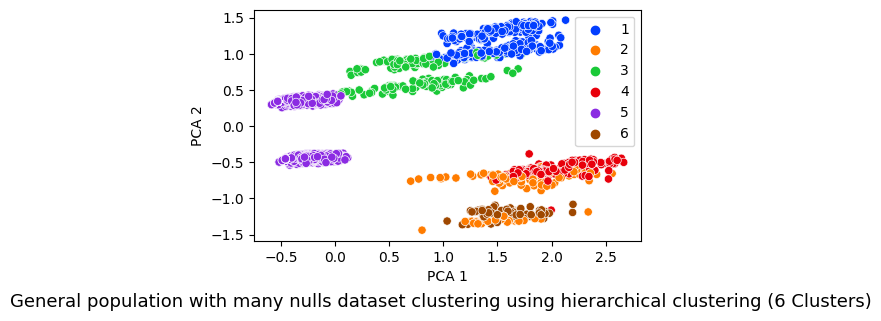

In [208]:
# Clustering for first two PCA's for the azdias many nulls dataset
# We can notice a clear improvement
plot_first_two_pca(azdias_many_nulls_pca_x[azdias_many_nulls_sampled_indices],h_clustering_many_nulls.labels_,use_sample=False)
plt.text(x = -3,y = -2.5,s = "General population with many nulls dataset clustering using hierarchical clustering (6 Clusters)", fontsize = 13)

**Comment:** We can notice that hierarchical clustering has clear advantage over KMeans for many nulls dataset

**Comment:** Clusters on the top right (Clusters 1,3) are old and wealthy indivisuals with high social status and prepared to take risk so probably they are investors/stakeholders.
Clusters on the bottom right (Clusters 2,4,6) are young people who are top income earners and have high social status, depsite their young age, they are very successful so they are probably entrepreneurs. Cluster 5 is a cluster of people who are neither wealthy or poor but kinda in the middle, or maybe atleaset they can afford a home. Some of them are old and others are young.

**Comment:** While hirarchical clustering has clear advantage over KMeans, it still was not the best because of how dense data is, **maybe** DBScan will better choice, let's check our hypothesis.

### Trying DBScan:

In [145]:
from sklearn.cluster import DBSCAN
azdias_many_nulls_sampled_indices_dbscan = get_sample(azdias_many_nulls_pca_x,0.1)
db_scan_many_nulls = DBSCAN(eps = 1, min_samples=50)
db_scan_many_nulls.fit(azdias_many_nulls_pca_x[azdias_many_nulls_sampled_indices_dbscan])

DBSCAN(eps=1, min_samples=50)

Text(-2, -2.5, 'General population with many nulls dataset clustering using DBScan')

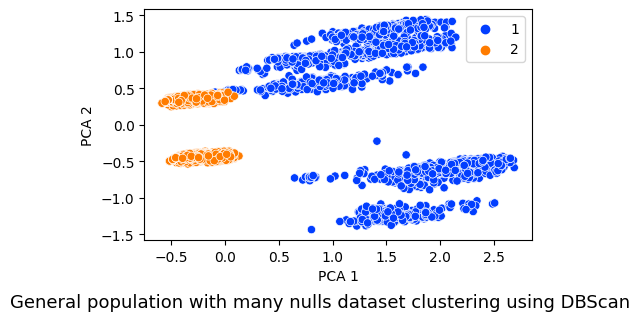

In [191]:
# Clustering for first two PCA's for the azdias many nulls dataset
plot_first_two_pca(azdias_many_nulls_pca_x[azdias_many_nulls_sampled_indices_dbscan],db_scan_many_nulls.labels_ + 1,use_sample=False)
plt.text(x = -2,y = -2.5,s = "General population with many nulls dataset clustering using DBScan", fontsize = 13)

**Comment:** **I take back my words**, DBScan does worse then h-clustering so let's omit it so we can conclude that for few nulls dataset, kmeans with k = 3 works best while for many nulls dataset, h-clustering with 6 clusters works best.

**General Note:** We have to also put into consideration that we are visualizing only the first 2 principal components which account for about 30% of variablity in the original data. this can be enough for visulization purposes but still would not give us the full picture of how clusters look like.

### Discussion 3.1: Apply Clustering to General Population

We can conclude that KMeans (with K = 3) does best for few nulls dataset while hierarchical clustering (6 clusters) does best for many nulls dataset.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [147]:
# Load in the customer demographics data.
# customers = 
#=> Already imported earlier

In [148]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

# Clean Customer Nulls
clean_nulls(customers_few_nulls)

['PRAEGENDE_JUGENDJAHRE_MOVEMENT', 'PRAEGENDE_JUGENDJAHRE_GEN', 'KBA05_BAUMAX_NO_BUILDINGS', 'KBA05_BAUMAX_BIZ', 'PLZ8_BAUMAX_NO_BUILDINGS', 'PLZ8_BAUMAX_BIZ', 'WOHNLAGE_QUALITY', 'WOHNLAGE_RURAL']
Column Unnamed: 0 Finished, Number of nulls: 0
Column ALTERSKATEGORIE_GROB Finished, Number of nulls: 0
Column ANREDE_KZ Finished, Number of nulls: 0
Column CJT_GESAMTTYP Finished, Number of nulls: 0
Column FINANZ_MINIMALIST Finished, Number of nulls: 0
Column FINANZ_SPARER Finished, Number of nulls: 0
Column FINANZ_VORSORGER Finished, Number of nulls: 0
Column FINANZ_ANLEGER Finished, Number of nulls: 0
Column FINANZ_UNAUFFAELLIGER Finished, Number of nulls: 0
Column FINANZ_HAUSBAUER Finished, Number of nulls: 0
Column FINANZTYP Finished, Number of nulls: 0
Column GFK_URLAUBERTYP Finished, Number of nulls: 0
Column GREEN_AVANTGARDE Finished, Number of nulls: 0
Column HEALTH_TYP Finished, Number of nulls: 0
Column LP_FAMILIE_FEIN Finished, Number of nulls: 0
Column LP_FAMILIE_GROB Finished, 

C:\Users\AmirWG\AppData\Local\Temp\ipykernel_6232\1148210629.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


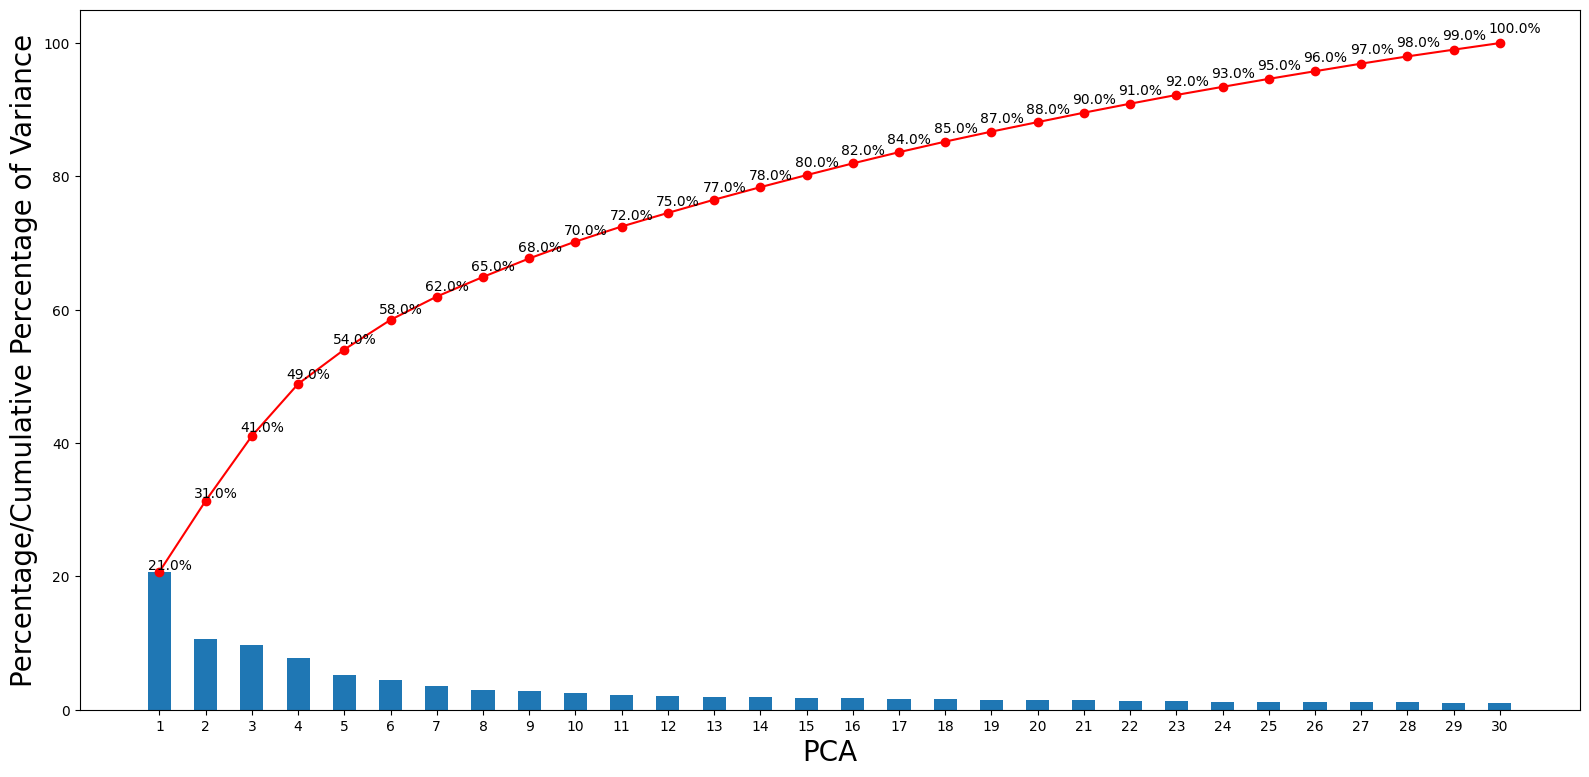

In [149]:
customers_few_nulls_pca, customers_few_nulls_pca_x = do_pca_and_plot(30, customers_few_nulls)
customers_few_nulls_predictions = kmeans_obj_few_nulls_k6.predict(customers_few_nulls_pca_x)

C:\Users\AmirWG\AppData\Local\Temp\ipykernel_6232\1148210629.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


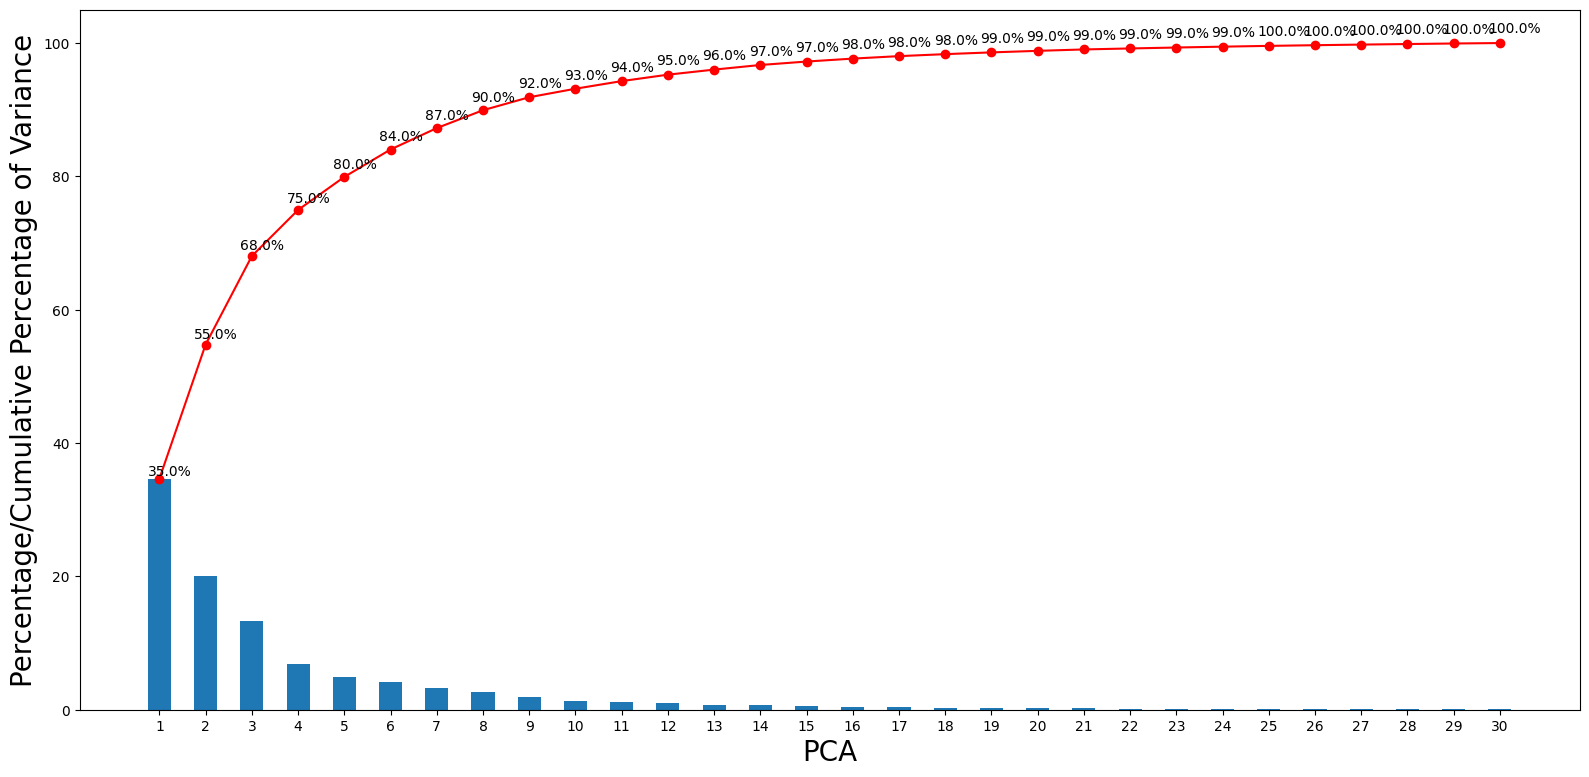

In [150]:
customers_many_nulls_pca, customers_many_nulls_pca_x = do_pca_and_plot(30, customers_many_nulls)

Text(-1.5, -1.3, 'Customers with many nulls dataset clustering using KMeans (6 Clusters)')

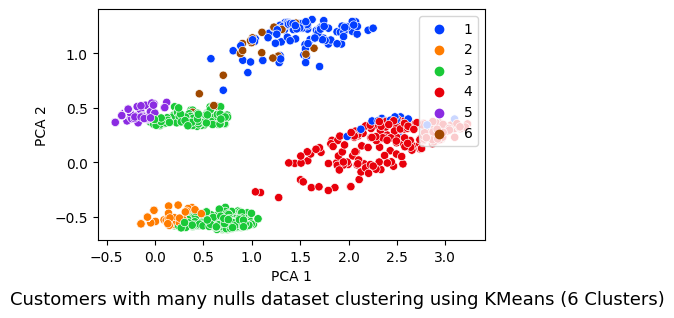

In [196]:
#=> In the same sense, clusters for customers with many and few nulls are quantitatively different
plot_first_two_pca(customers_many_nulls_pca_x,kmeans_obj_many_nulls.predict(customers_many_nulls_pca_x),0.1)
plt.text(x = -1.5,y = -1.3,s = "Customers with many nulls dataset clustering using KMeans (6 Clusters)", fontsize = 13)

Text(-4, -3.2, 'Customers with few nulls dataset clustering using KMeans (3 Clusters)')

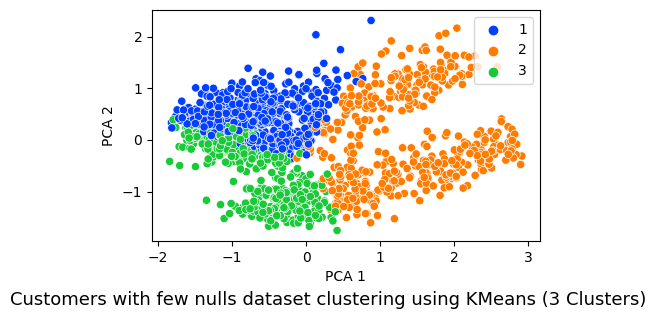

In [203]:
# Plotting first two PCA's (clustered) for customers with few nulls.
plot_first_two_pca(customers_few_nulls_pca_x,kmeans_obj_few_nulls_k3.predict(customers_few_nulls_pca_x),0.01)
plt.text(x = -4,y = -3.2, s = "Customers with few nulls dataset clustering using KMeans (3 Clusters)", fontsize = 13)

In [171]:
customers_many_nulls_sampled_indices = get_sample(customers_many_nulls_pca_x,0.05)
h_clustering_customers_many_nulls = AgglomerativeClustering(n_clusters= 6, linkage = "complete")
h_clustering_customers_many_nulls.fit(customers_many_nulls_pca_x[customers_many_nulls_sampled_indices])

AgglomerativeClustering(linkage='complete', n_clusters=6)

Text(-2.5, -1.3, 'Customers with many nulls dataset clustering using hierarchical clustering (6 Clusters)')

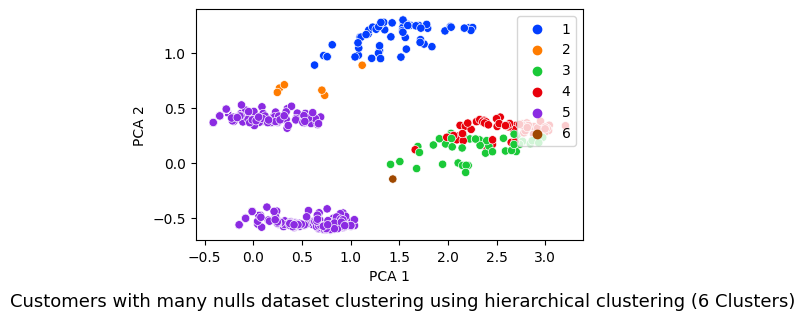

In [207]:
# Clustering for first two PCA's for the customers many nulls dataset
plot_first_two_pca(customers_many_nulls_pca_x[customers_many_nulls_sampled_indices],h_clustering_customers_many_nulls.labels_,use_sample=False)
plt.text(x = -2.5,y = -1.3,s = "Customers with many nulls dataset clustering using hierarchical clustering (6 Clusters)", fontsize = 13)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [155]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
general_pop_few_nulls_predictions = pd.Series(kmeans_obj_few_nulls_k3.labels_) + 1
customers_few_nulls_predictions = pd.Series(kmeans_obj_few_nulls_k3.predict(customers_few_nulls_pca_x)) + 1
general_pop_many_nulls_predictions = pd.Series(h_clustering_many_nulls.labels_) + 1
customers_many_nulls_predictions = pd.Series(h_clustering_customers_many_nulls.labels_) + 1

In [156]:
general_pop_few_nulls_proportions = general_pop_few_nulls_predictions.groupby(by = general_pop_few_nulls_predictions).count()/len(general_pop_few_nulls_predictions)
customers_few_nulls_proportions = customers_few_nulls_predictions.groupby(by = customers_few_nulls_predictions).count()/len(customers_few_nulls_predictions)
general_pop_many_nulls_proportions = general_pop_many_nulls_predictions.groupby(by = general_pop_many_nulls_predictions).count()/len(general_pop_many_nulls_predictions)
customers_many_nulls_proportions = customers_many_nulls_predictions.groupby(by = customers_many_nulls_predictions).count()/len(customers_many_nulls_predictions)

In [157]:
proportion_few_nulls = pd.DataFrame({"cluster_id":range(1,4),"general_pop_few_nulls_proportions":general_pop_few_nulls_proportions,"customers_few_nulls_proportions":customers_few_nulls_proportions})
proportion_many_nulls = pd.DataFrame({"cluster_id":range(1,7),"general_pop_many_nulls_proportions":general_pop_many_nulls_proportions,"customers_many_nulls_proportions":customers_many_nulls_proportions})

In [158]:
proportion_few_nulls_melted = proportion_few_nulls.melt(id_vars="cluster_id",value_vars=["general_pop_few_nulls_proportions","customers_few_nulls_proportions"],var_name="type",value_name="proportion")
proportion_few_nulls_melted

cluster_id                               type  proportion
0           1  general_pop_few_nulls_proportions    0.284179
1           2  general_pop_few_nulls_proportions    0.414631
2           3  general_pop_few_nulls_proportions    0.301189
3           1    customers_few_nulls_proportions    0.401377
4           2    customers_few_nulls_proportions    0.315214
5           3    customers_few_nulls_proportions    0.283409

In [159]:
proportion_many_nulls_melted = proportion_many_nulls.melt(id_vars="cluster_id",value_vars=["general_pop_many_nulls_proportions","customers_many_nulls_proportions"],var_name="type", value_name="proportion")
proportion_many_nulls_melted

cluster_id                                type  proportion
0            1  general_pop_many_nulls_proportions    0.068182
1            2  general_pop_many_nulls_proportions    0.032590
2            3  general_pop_many_nulls_proportions    0.047384
3            4  general_pop_many_nulls_proportions    0.045455
4            5  general_pop_many_nulls_proportions    0.785163
5            6  general_pop_many_nulls_proportions    0.021226
6            1    customers_many_nulls_proportions    0.024420
7            2    customers_many_nulls_proportions    0.022418
8            3    customers_many_nulls_proportions    0.014412
9            4    customers_many_nulls_proportions    0.002802
10           5    customers_many_nulls_proportions    0.932746
11           6    customers_many_nulls_proportions    0.003203

<AxesSubplot: xlabel='cluster_id', ylabel='proportion'>

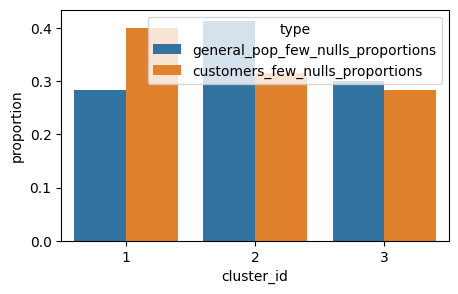

In [168]:
# Few nulls dataset (General Pop., Customers)
plt.figure(figsize=(5,3))
sns.barplot(data = proportion_few_nulls_melted, x = "cluster_id", y = "proportion", hue = "type")

<AxesSubplot: xlabel='cluster_id', ylabel='proportion'>

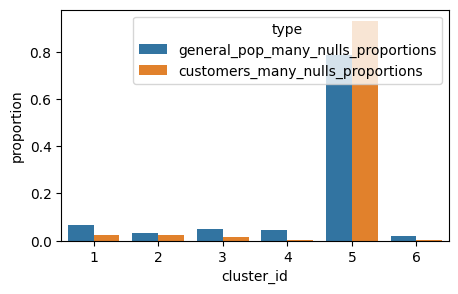

In [169]:
# Few nulls dataset (General Pop., Customers)
plt.figure(figsize=(5,3))
sns.barplot(data = proportion_many_nulls_melted, x = "cluster_id", y = "proportion", hue = "type")

In [162]:
# Ratio for many nulls dataset
ratios_few_nulls = pd.Series(proportion_few_nulls["customers_few_nulls_proportions"]/proportion_few_nulls["general_pop_few_nulls_proportions"])
ratios_few_nulls.sort_values(ascending= False)

1    1.412409
3    0.940965
2    0.760227
dtype: float64

**Comment:** For few nulls dataset, **Cluster 1** is overrepresented while **Cluster 2** is underrepresented.

In [163]:
# Ratio for many nulls dataset
ratios_many_nulls = pd.Series(proportion_many_nulls["customers_many_nulls_proportions"]/proportion_many_nulls["general_pop_many_nulls_proportions"])
ratios_many_nulls.sort_values(ascending= False)

5    1.187965
2    0.687877
1    0.358153
3    0.304142
6    0.150876
4    0.061649
dtype: float64

**Comment:** For many nulls dataset, **Cluster 5** is overrepresented while **Clusters  2,1,3,6,4** are underrepresented.

In [164]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

#=> Answered in discussion/comments

In [165]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

#=> Answered in discussion/comments

### Discussion 3.3: Compare Customer Data to Demographics Data

For this discussion, I tried to explain everything in seperate cells, comments. I found it easier this way, Sorry for any inconvenience.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.